In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif, chi2
import numpy as np
import hvplot.pandas


pd.set_option('display.max_columns', None)

### Import Data


In [2]:
filename = 'loan_data.csv'
df = pd.read_csv(filename)

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_22576\2570835424.py:2: DtypeWarning: Columns (18,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


In [3]:
print(df.shape)

df.head()

(759338, 72)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0  112435993        NaN       2300         2300           2300.0  36 months   
1  112290210        NaN      16000        16000          16000.0  60 months   
2  112436985        NaN       6025         6025           6025.0  36 months   
3  112439006        NaN      20400        20400          20400.0  36 months   
4  112438929        NaN      13000        13000          13000.0  36 months   

   int_rate  installment grade sub_grade     emp_title emp_length  \
0     12.62        77.08     C        C1           NaN        NaN   
1     12.62       360.95     C        C1       teacher  10+ years   
2     15.05       209.01     C        C4  Front Office    7 years   
3      9.44       652.91     B        B1       Manager  10+ years   
4     11.99       431.73     B        B5     Paramedic  10+ years   

  home_ownership  annual_inc verification_status   issue_d loan_status  \
0            OWN     10000.0        Not Verified  Jun-2017     Current   
1       MORTGAGE     94000.0        Not Verified  Jun-2017     Current   
2       MORTGAGE     46350.0        Not Verified  Jun-2017     Current   
3           RENT     44000.0     Source Verified  Jun-2017     Current   
4       MORTGAGE     85000.0     Source Verified  Jun-2017     Current   

  pymnt_plan desc             purpose                    title zip_code  \
0          n  NaN         credit_card  Credit card refinancing    148xx   
1          n  NaN  debt_consolidation       Debt consolidation    021xx   
2          n  NaN    home_improvement         Home improvement    018xx   
3          n  NaN                 car            Car financing    913xx   
4          n  NaN  debt_consolidation       Debt consolidation    560xx   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0         NY  21.61            0         Sep-1985             1.0   
1         MA  25.61            0         Jun-1992             0.0   
2         MA   8.88            0         Jun-2002             0.0   
3         CA  27.06            0         Jan-2007             1.0   
4         MN   6.79            1         Feb-2002             0.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN         4        0   
1                     NaN                     NaN         9        0   
2                     NaN                     NaN        11        0   
3                     NaN                     NaN        15        0   
4                    16.0                     NaN         5        0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0     3911.0        55.1          6                   w    2029.91   
1    33752.0       105.8         26                   w   14813.07   
2    12425.0        44.9         27                   w    5340.82   
3     8769.0        18.7         19                   w   17898.81   
4     6866.0        88.0         24                   w   11460.66   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        2029.91       382.99           382.99           270.09   
1       14813.07      2060.09          2060.09          1186.93   
2        5340.82      1032.46          1032.46           684.18   
3       17898.81      3237.80          3237.80          2501.19   
4       11460.66      2137.00          2137.00          1539.34   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         112.90                 0.0         0.0                      0.0   
1         873.16                 0.0         0.0                      0.0   
2         348.28                 0.0         0.0                      0.0   
3         736.61                 0.0         0.0                      0.0   
4         597.66                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0     Dec-2017        

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

In [5]:
# selected_columns = [
#     'annual_inc', 'dti', 'revol_util', 'emp_length', 'home_ownership',
#     'purpose', 'loan_amnt', 'int_rate', 'installment', 'grade',
#     'sub_grade', 'verification_status', 'delinq_2yrs', 'inq_last_6mths',
#     'open_acc', 'pub_rec', 'total_acc', 'addr_state',
#     'term', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
#     'total_rec_late_fee', 'collections_12_mths_ex_med', 'loan_status' 
# ]

# selected_df = df[selected_columns]
# print(selected_df.shape)
# selected_df.head()

### Target Output - Loan Status

In [6]:
selected_df = df;

selected_df['loan_status'].value_counts()

loan_status
Current               565523
Fully Paid            130718
Charged Off            37197
Late (31-120 days)     15354
In Grace Period         6634
Late (16-30 days)       3876
Default                   36
Name: count, dtype: int64

In [7]:
selected_df= selected_df[selected_df['loan_status'] != 'In Grace Period']    # Remove loans in Grace Period

selected_df['loan_status'] = selected_df['loan_status'].str.replace(pat='Default', regex=True, repl='Charged Off') 

selected_df['loan_status'].value_counts() 

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_22576\3659155914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['loan_status'] = selected_df['loan_status'].str.replace(pat='Default', regex=True, repl='Charged Off')


loan_status
Current               565523
Fully Paid            130718
Charged Off            37233
Late (31-120 days)     15354
Late (16-30 days)       3876
Name: count, dtype: int64

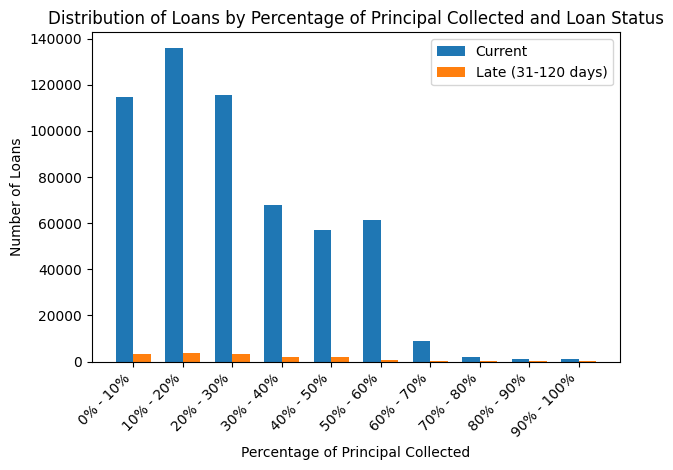

In [8]:
current_loans = selected_df[selected_df['loan_status'] == 'Current']
late_loans = selected_df[selected_df['loan_status'] == 'Late (31-120 days)']

# Combine both datasets into one DataFrame
combined_loans = pd.concat([current_loans, late_loans])

# Calculate the percentage of principal collected for each loan
combined_loans['principal_collected_percentage'] = (combined_loans['total_rec_prncp'] / combined_loans['loan_amnt']) * 100

# Define the percentage ranges
percentage_ranges = [(i, i+10) for i in range(0, 100, 10)]

# Initialize dictionaries to count the number of loans in each percentage range
current_loan_counts = {range_: 0 for range_ in percentage_ranges}
late_loan_counts = {range_: 0 for range_ in percentage_ranges}

# Count the number of loans in each percentage range for both loan statuses
for percentage, loan_status in zip(combined_loans['principal_collected_percentage'], combined_loans['loan_status']):
    for range_ in percentage_ranges:
        if range_[0] <= percentage < range_[1]:
            if loan_status == 'Current':
                current_loan_counts[range_] += 1
            elif loan_status == 'Late (31-120 days)':
                late_loan_counts[range_] += 1
            break  # Once the loan is counted in a range, move to the next loan

# Extract the range labels for plotting
labels = [f"{range_[0]}% - {range_[1]}%" for range_ in percentage_ranges]

# Extract the counts for plotting
current_counts = [current_loan_counts[range_] for range_ in percentage_ranges]
late_counts = [late_loan_counts[range_] for range_ in percentage_ranges]

# Plot the bar chart
bar_width = 0.35
x = np.arange(len(labels))
plt.bar(x - bar_width/2, current_counts, width=bar_width, label='Current')
plt.bar(x + bar_width/2, late_counts, width=bar_width, label='Late (31-120 days)')
plt.xlabel('Percentage of Principal Collected')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loans by Percentage of Principal Collected and Loan Status')
plt.xticks(ticks=x, labels=labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
# Calculate the percentage of principal collected for each loan
selected_df['principal_collected_percentage'] = (selected_df['total_rec_prncp'] / selected_df['loan_amnt']) * 100

# Update the loan status based on the percentage of principal collected
selected_df.loc[(selected_df['loan_status'] == 'Current') & (selected_df['principal_collected_percentage'] > 60), 'loan_status'] = 'Fully Paid'
selected_df.loc[(selected_df['loan_status'] == 'Late (31-120 days)') & (selected_df['principal_collected_percentage'] < 30), 'loan_status'] = 'Charged Off'

selected_df['loan_status'].value_counts() 

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_22576\1289155352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['principal_collected_percentage'] = (selected_df['total_rec_prncp'] / selected_df['loan_amnt']) * 100


loan_status
Current               552507
Fully Paid            143734
Charged Off            47781
Late (31-120 days)      4806
Late (16-30 days)       3876
Name: count, dtype: int64

In [10]:
df_modified = selected_df[~selected_df['loan_status'].isin(['Late (16-30 days)', 'Late (31-120 days)', 'Current'])]
print(df_modified.shape)
df_modified['loan_status'].value_counts() 

(191515, 73)


loan_status
Fully Paid     143734
Charged Off     47781
Name: count, dtype: int64

In [11]:
df_modified = df_modified.drop(columns=['principal_collected_percentage'])
df_modified.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
8   112038251        NaN      11575        11575          11575.0  36 months   
10  112149045        NaN       7200         7200           7200.0  36 months   
24  112052261        NaN       7500         7500           7500.0  36 months   
42  111999259        NaN      10000        10000          10000.0  60 months   
91  111808508        NaN      14000        14000          14000.0  36 months   

    int_rate  installment grade sub_grade            emp_title emp_length  \
8       7.35       359.26     A        A4  Solutions Architect    6 years   
10     24.85       285.70     E        E3                  Pse    2 years   
24      7.35       232.79     A        A4   Associate Director    7 years   
42     16.02       243.29     C        C5               Biller    7 years   
91     16.02       492.34     C        C5           cdl driver    7 years   

   home_ownership  annual_inc verification_status   issue_d loan_status  \
8             OWN    153000.0        Not Verified  Jun-2017  Fully Paid   
10           RENT     50000.0     Source Verified  Jun-2017  Fully Paid   
24       MORTGAGE    110000.0        Not Verified  Jun-2017  Fully Paid   
42           RENT     51979.0     Source Verified  Jun-2017  Fully Paid   
91       MORTGAGE     75000.0            Verified  Jun-2017  Fully Paid   

   pymnt_plan desc             purpose                    title zip_code  \
8           n  NaN         credit_card  Credit card refinancing    923xx   
10          n  NaN  debt_consolidation       Debt consolidation    985xx   
24          n  NaN  debt_consolidation       Debt consolidation    750xx   
42          n  NaN  debt_consolidation       Debt consolidation    958xx   
91          n  NaN  debt_consolidation       Debt consolidation    026xx   

   addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
8          CA  16.99            0         Jul-1994             0.0   
10         WA   6.07            0         Jan-2000             0.0   
24         TX  13.12            0         Mar-2013             2.0   
42         CA  10.11            0         Aug-2006             0.0   
91         MA  10.86            1         May-2008             0.0   

    mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
8                     24.0                    84.0        20        1   
10                    72.0                     NaN         4        0   
24                     NaN                     NaN        19        0   
42                     NaN                    55.0        15        2   
91                    17.0                     NaN         4        0   

    revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
8      8550.0        22.7         46                   w        0.0   
10     3560.0        98.9          5                   w        0.0   
24    23348.0        27.2         27                   w        0.0   
42     5733.0        20.0         21                   w        0.0   
91     2700.0        90.0         10                   w        0.0   

    out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
8             0.0  11707.816236         11707.82          11575.0   
10            0.0   7206.461000          7206.46           7200.0   
24            0.0   7642.289180          7642.29           7500.0   
42            0.0  10026.700000         10026.70          10000.0   
91            0.0  14375.136851         14375.14          14000.0   

    total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
8          132.82                 0.0         0.0                      0.0   
10           6.46                 0.0         0.0                      0.0   
24         142.29                 0.0         0.0                      0.0   
42          26.70                 0.0         0.0                      0.0   
91         375.14                 0.0         0.0                  

### Select the features

In [12]:
df_numerical_features = df_modified.select_dtypes(include=['int', 'float'])
df_numerical_features.describe()

id  member_id      loan_amnt    funded_amnt  funded_amnt_inv  \
count  1.915150e+05        0.0  191515.000000  191515.000000    191515.000000   
mean   8.486023e+07        NaN   14604.011174   14604.011174     14598.267188   
std    1.286874e+07        NaN    9114.805202    9114.805202      9111.965324   
min    6.510400e+04        NaN    1000.000000    1000.000000       775.000000   
25%    7.449201e+07        NaN    7500.000000    7500.000000      7500.000000   
50%    8.391064e+07        NaN   12000.000000   12000.000000     12000.000000   
75%    9.361337e+07        NaN   20000.000000   20000.000000     20000.000000   
max    1.201180e+08        NaN   40000.000000   40000.000000     40000.000000   

            int_rate    installment    annual_inc            dti  \
count  191515.000000  191515.000000  1.915150e+05  191475.000000   
mean       13.787241     450.622469  7.984813e+04      18.566909   
std         5.470286     282.461283  7.632500e+04      11.188874   
min         5.320000      30.120000  0.000000e+00      -1.000000   
25%         9.750000     242.570000  4.900000e+04      11.900000   
50%        12.880000     377.770000  6.800000e+04      17.890000   
75%        16.990000     607.820000  9.500000e+04      24.600000   
max        30.990000    1714.540000  9.550000e+06     999.000000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  191515.00000   191514.000000           100142.000000   
mean        0.34201        0.635572               34.314144   
std         0.92968        0.918926               22.091573   
min         0.00000        0.000000                0.000000   
25%         0.00000        0.000000               16.000000   
50%         0.00000        0.000000               31.000000   
75%         0.00000        1.000000               50.000000   
max        21.00000        5.000000              192.000000   

       mths_since_last_record       open_acc        pub_rec     revol_bal  \
count            38842.000000  191515.000000  191515.000000  1.915150e+05   
mean                68.855826      11.931541       0.261656  1.612410e+04   
std                 24.363911       5.749732       0.653623  2.362275e+04   
min                  0.000000       1.000000       0.000000  0.000000e+00   
25%                 54.000000       8.000000       0.000000  5.519500e+03   
50%                 71.000000      11.000000       0.000000  1.058800e+04   
75%                 86.000000      15.000000       0.000000  1.915350e+04   
max                120.000000      86.000000      46.000000  1.039013e+06   

          revol_util      total_acc      out_prncp  out_prncp_inv  \
count  191381.000000  191515.000000  191515.000000  191515.000000   
mean       47.740032      25.423622    1064.939210    1064.585865   
std        24.735198      12.319893    3948.994186    3947.535300   
min         0.000000       2.000000       0.000000       0.000000   
25%        28.800000      17.000000       0.000000       0.000000   
50%        47.000000      24.000000       0.000000       0.000000   
75%        66.300000      32.000000       0.000000       0.000000   
max       172.000000     176.000000   40000.000000   40000.000000   

         total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
count  191515.000000    191515.000000    191515.000000  191515.000000   
mean    12434.565498     12429.780432     10931.569203    1351.423787   
std      9837.982116      9834.976957      9298.013275    1460.226132   
min         0.000000         0.000000         0.000000       0.000000   
25%      4961.010000      4957.680000      3350.000000     376.310000   
50%      9935.580000      9927.240000      8400.000000     878.360000   
75%     17380.961238     17376.975000     16000.000000    1808.815000   
max     52779.784886     52779.780000     40000.000000   15112.400000   

       total_rec_late_fee     recoveries  collection_recovery_fee  \
count       191515.000000  191515.000000            191515.0000

In [13]:
df_modified = df_modified.drop(columns = ['member_id', 'policy_code', 'id', 'funded_amnt', 'funded_amnt_inv', 'total_pymnt_inv', 'out_prncp_inv'])

#### Features with missing values

In [14]:
total = df_modified.isnull().sum()
percent = (df_modified.isnull().sum() / len(df_modified)) * 100

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_with_nulls = missing_data[missing_data['Total'] > 0].sort_values(by='Total', ascending=False)

print(missing_data_with_nulls)

                              Total    Percent
desc                         191508  99.996345
dti_joint                    187288  97.792862
verification_status_joint    187288  97.792862
annual_inc_joint             187288  97.792862
next_pymnt_d                 167915  87.677205
mths_since_last_record       152673  79.718560
mths_since_last_major_derog  135884  70.952145
mths_since_last_delinq        91373  47.710623
il_util                       24661  12.876798
emp_title                     12347   6.447015
emp_length                    12238   6.390100
title                          8918   4.656554
mths_since_rcnt_il             4533   2.366916
last_pymnt_d                    948   0.495000
revol_util                      134   0.069968
all_util                         56   0.029241
open_acc_6m                      43   0.022453
total_cu_tl                      43   0.022453
inq_last_12m                     43   0.022453
open_il_12m                      42   0.021930
open_il_24m  

Drop features with more than 47% of missing values

In [15]:
columns_to_drop = missing_data[missing_data['Percent'] > 47].index

df_modified = df_modified.drop(columns=columns_to_drop)

print(f"Columns dropped: {list(columns_to_drop)}")
df_modified.head()

Columns dropped: ['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint']


loan_amnt       term  int_rate  installment grade sub_grade  \
8       11575  36 months      7.35       359.26     A        A4   
10       7200  36 months     24.85       285.70     E        E3   
24       7500  36 months      7.35       232.79     A        A4   
42      10000  60 months     16.02       243.29     C        C5   
91      14000  36 months     16.02       492.34     C        C5   

              emp_title emp_length home_ownership  annual_inc  \
8   Solutions Architect    6 years            OWN    153000.0   
10                  Pse    2 years           RENT     50000.0   
24   Associate Director    7 years       MORTGAGE    110000.0   
42               Biller    7 years           RENT     51979.0   
91           cdl driver    7 years       MORTGAGE     75000.0   

   verification_status   issue_d loan_status pymnt_plan             purpose  \
8         Not Verified  Jun-2017  Fully Paid          n         credit_card   
10     Source Verified  Jun-2017  Fully Paid          n  debt_consolidation   
24        Not Verified  Jun-2017  Fully Paid          n  debt_consolidation   
42     Source Verified  Jun-2017  Fully Paid          n  debt_consolidation   
91            Verified  Jun-2017  Fully Paid          n  debt_consolidation   

                      title zip_code addr_state    dti  delinq_2yrs  \
8   Credit card refinancing    923xx         CA  16.99            0   
10       Debt consolidation    985xx         WA   6.07            0   
24       Debt consolidation    750xx         TX  13.12            0   
42       Debt consolidation    958xx         CA  10.11            0   
91       Debt consolidation    026xx         MA  10.86            1   

   earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
8          Jul-1994             0.0        20        1     8550.0        22.7   
10         Jan-2000             0.0         4        0     3560.0        98.9   
24         Mar-2013             2.0        19        0    23348.0        27.2   
42         Aug-2006             0.0        15        2     5733.0        20.0   
91         May-2008             0.0         4        0     2700.0        90.0   

    total_acc initial_list_status  out_prncp   total_pymnt  total_rec_prncp  \
8          46                   w        0.0  11707.816236          11575.0   
10          5                   w        0.0   7206.461000           7200.0   
24         27                   w        0.0   7642.289180           7500.0   
42         21                   w        0.0  10026.700000          10000.0   
91         10                   w        0.0  14375.136851          14000.0   

    total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
8          132.82                 0.0         0.0                      0.0   
10           6.46                 0.0         0.0                      0.0   
24         142.29                 0.0         0.0                      0.0   
42          26.70                 0.0         0.0                      0.0   
91         375.14                 0.0         0.0                      0.0   

   last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
8      Sep-2017         11360.38           Sep-2017   
10     Jul-2017          7231.31           Sep-2017   
24     Oct-2017          7184.37           Oct-2017   
42     Jul-2017         10048.95           Oct-2017   
91     Sep-2017         13913.95           Sep-2017   

    collections_12_mths_ex_med application_type  acc_now_delinq  tot_coll_amt  \
8                            0       Individual               0           0.0   
10                           0       Individual               0           0.0   
24                           0       Individual               0           0.0   
42                           0       Individual               0         251.0   
91                           0       Individual               0           0.0   

    tot_cur_bal  open_acc_6m  open_il_12m  open_il_24m  mth

In [16]:
null_open_il_12m_rows = df_modified[df_modified['open_il_12m'].isnull()]
null_open_il_12m_rows

loan_amnt       term  int_rate  installment grade sub_grade  \
759142       1000  36 months     17.57        35.94     D        D4   
759226      17325  60 months     18.20       441.83     E        E1   
759241      20000  60 months     20.99       540.96     E        E5   
759278      24000  36 months     12.59       803.93     C        C2   
759279      19300  60 months     16.99       479.56     D        D3   
759287       8000  36 months     10.64       260.55     B        B4   
759288      30000  60 months     18.99       778.06     E        E3   
759289      20000  36 months      9.17       637.58     B        B2   
759291      20000  60 months     18.99       518.71     E        E3   
759292      35000  36 months     12.59      1172.39     C        C2   
759294      15000  36 months     10.64       488.53     B        B4   
759295       8000  36 months     10.64       260.55     B        B4   
759296      30000  36 months      6.89       924.81     A        A3   
759297      30000  60 months     18.49       769.83     E        E2   
759298      24000  36 months     11.22       788.24     B        B5   
759299       8000  36 months     11.99       265.68     C        C1   
759300       7625  36 months      9.76       245.18     B        B3   
759301      24000  36 months     11.22       788.24     B        B5   
759303       3975  36 months     17.86       143.43     D        D5   
759305      15000  36 months      7.89       469.29     A        A5   
759307       5200  36 months     16.55       184.24     D        D2   
759308      15000  36 months      7.89       469.29     A        A5   
759309      15000  36 months      6.89       462.41     A        A3   
759310      19000  36 months     11.99       630.99     C        C1   
759312      11000  36 months      9.17       350.67     B        B2   
759314       4500  36 months      9.76       144.70     B        B3   
759315       7500  36 months      9.76       241.16     B        B3   
759316      16800  36 months      7.26       520.74     A        A4   
759317      34000  36 months      9.76      1093.26     B        B3   
759319      25000  36 months     18.99       916.28     E        E3   
759320      35000  60 months     18.99       907.73     E        E3   
759322      12000  36 months      9.76       385.86     B        B3   
759323       5000  36 months     13.18       168.91     C        C3   
759324       5000  36 months     15.41       174.34     D        D1   
759326      24000  36 months      5.32       722.76     A        A1   
759328       6000  36 months     26.77       244.22     G        G1   
759329       6000  36 months     13.67       204.11     C        C4   
759330      24100  60 months     18.49       618.43     E        E2   
759331       4000  36 months      9.17       127.52     B        B2   
759332       5000  36 months      9.17       159.40     B        B2   
759333       6000  36 months      7.89       187.72     A        A5   
759334       6000  36 months      9.17       191.28     B        B2   

                          emp_title emp_length home_ownership  annual_inc  \
759142                          NaN        NaN           RENT     22888.0   
759226             Plumbing foreman  10+ years       MORTGAGE     64000.0   
759241                          NaN        NaN            OWN     40000.0   
759278     Senior Software Engineer     1 year           RENT    110000.0   
759279  Registered Dental Hygienist    3 years       MORTGAGE     64000.0   
759287                          NaN        NaN           RENT     19000.0   
759288               Staff Engineer    7 years       MORTGAGE    122000.0   
759289                          NaN        NaN       MORTGAGE     85000.0   
759291                          NaN        NaN           RENT     82000.0   
759292                          NaN  10+ years            OWN    125000.0   
759294                    team Lead  10+ years           RENT     42000.0   
759295                        

In [17]:
df_modified = df_modified.dropna(subset=['open_il_12m'])

In [18]:
total = df_modified.isnull().sum()
percent = (df_modified.isnull().sum() / len(df_modified)) * 100

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_with_nulls = missing_data[missing_data['Total'] > 0].sort_values(by='Total', ascending=False)

print(missing_data_with_nulls)

                    Total    Percent
il_util             24619  12.857688
emp_title           12334   6.441639
emp_length          12226   6.385234
title                8918   4.657576
mths_since_rcnt_il   4491   2.345500
last_pymnt_d          948   0.495109
revol_util            134   0.069984
dti                    40   0.020891
all_util               14   0.007312
last_credit_pull_d      2   0.001045
inq_last_6mths          1   0.000522
open_acc_6m             1   0.000522
total_cu_tl             1   0.000522
inq_last_12m            1   0.000522


In [19]:
null_inq_last_12m_rows = df_modified[df_modified['inq_last_12m'].isnull()]
null_inq_last_12m_rows

loan_amnt       term  int_rate  installment grade sub_grade  \
741750      35000  60 months       9.8       740.21     B        B3   

                   emp_title emp_length home_ownership  annual_inc  \
741750  Subcontracts Manager  10+ years       MORTGAGE    110000.0   

       verification_status   issue_d loan_status pymnt_plan  \
741750     Source Verified  Jan-2016  Fully Paid          n   

                   purpose               title zip_code addr_state    dti  \
741750  debt_consolidation  Debt consolidation    844xx         UT  20.09   

        delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
741750            0         Jun-1994             NaN        10        0   

        revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
741750     1508.0         3.5         36                   w        0.0   

         total_pymnt  total_rec_prncp  total_rec_int  total_rec_late_fee  \
741750  38962.991964          35000.0        3962.99                 0.0   

        recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
741750         0.0                      0.0     Apr-2017         28619.11   

       last_credit_pull_d  collections_12_mths_ex_med application_type  \
741750           Nov-2017                           0       Individual   

        acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_12m  \
741750               0           0.0     235465.0          NaN          1.0   

        open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  \
741750          4.0                 4.0       43579.0     62.0          0.0   

        open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
741750          0.0      1508.0      40.0           43000.0     2.0   

        total_cu_tl  inq_last_12m  
741750          NaN           NaN

In [20]:
df_modified = df_modified.dropna(subset=['inq_last_12m'])
df_modified = df_modified.dropna(subset=['last_credit_pull_d'])

In [21]:
total = df_modified.isnull().sum()
percent = (df_modified.isnull().sum() / len(df_modified)) * 100

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_with_nulls = missing_data[missing_data['Total'] > 0].sort_values(by='Total', ascending=False)

print(missing_data_with_nulls)

                    Total    Percent
il_util             24619  12.857889
emp_title           12334   6.441740
emp_length          12226   6.385335
title                8918   4.657649
mths_since_rcnt_il   4491   2.345537
last_pymnt_d          948   0.495117
revol_util            134   0.069985
dti                    40   0.020891
all_util               14   0.007312


##### il_util (installment utilization. It represents the ratio of the borrower's current installment account balances to the original loan amounts)

In [22]:
df_modified['il_util'].describe()

count    166851.000000
mean         72.599271
std          22.363106
min           0.000000
25%          60.000000
50%          76.000000
75%          88.000000
max         558.000000
Name: il_util, dtype: float64

<Axes: xlabel='il_util', ylabel='Count'>

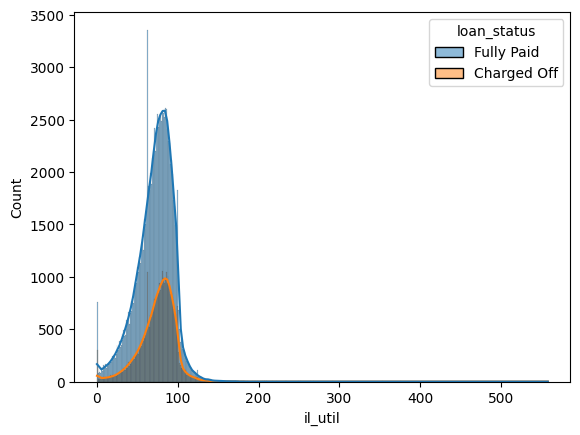

In [23]:
sns.histplot(data=df_modified, x='il_util', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='il_util'>

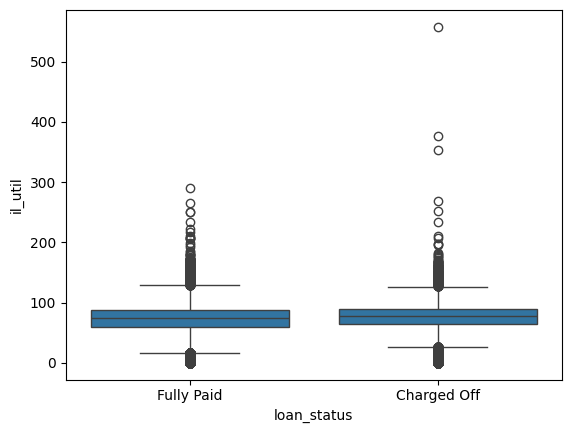

In [24]:
sns.boxplot(x='loan_status', y='il_util', data=df_modified)

<Axes: xlabel='il_util', ylabel='Count'>

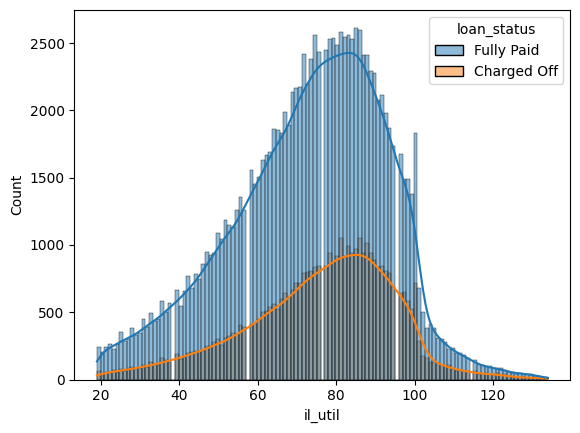

In [25]:
lower_threshold = 18
upper_threshold = 135

filtered_df = df_modified[(df_modified['il_util'] > lower_threshold) & (df_modified['il_util'] < upper_threshold)]

sns.histplot(data=filtered_df, x='il_util', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='il_util'>

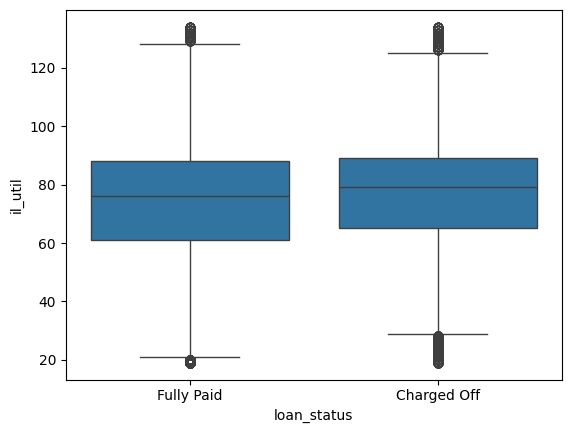

In [26]:
sns.boxplot(x='loan_status', y='il_util', data=filtered_df)

##### mths_since_rcnt_il (How many months it's been since the borrower opened their most recent installment accounts)

In [27]:
df_modified['mths_since_rcnt_il'].describe()

count    186979.000000
mean         18.786083
std          24.244915
min           0.000000
25%           6.000000
50%          11.000000
75%          21.000000
max         415.000000
Name: mths_since_rcnt_il, dtype: float64

<Axes: xlabel='mths_since_rcnt_il', ylabel='Count'>

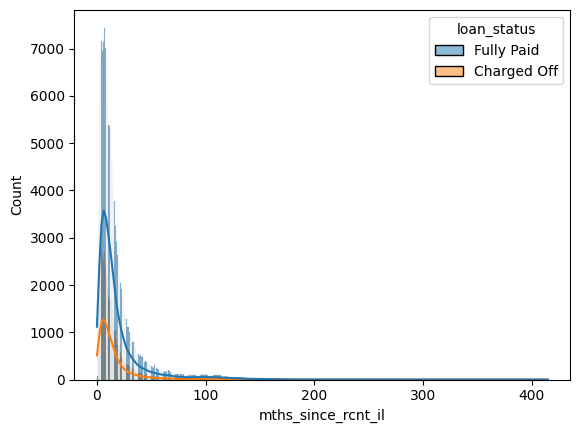

In [28]:
sns.histplot(data=df_modified, x='mths_since_rcnt_il', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='mths_since_rcnt_il'>

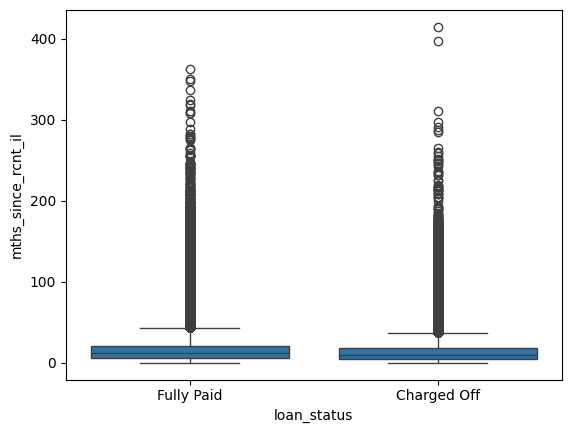

In [29]:
sns.boxplot(x='loan_status', y='mths_since_rcnt_il', data=df_modified)

Shape of the DataFrame where mths_since_rcnt_il is less than 100: (182184, 57)


<Axes: xlabel='mths_since_rcnt_il', ylabel='Count'>

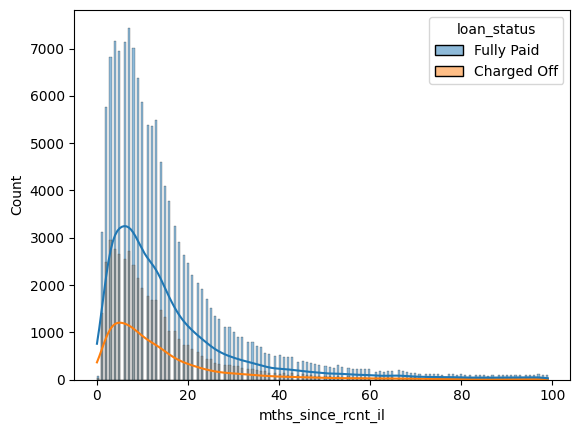

In [30]:
threshold = 100
filtered_df = df_modified[df_modified['mths_since_rcnt_il'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where mths_since_rcnt_il is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='mths_since_rcnt_il', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='mths_since_rcnt_il'>

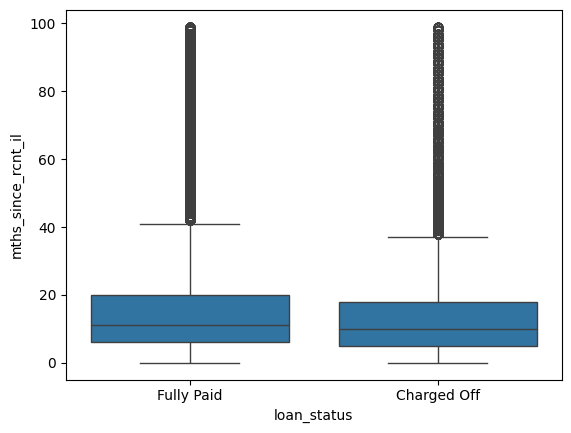

In [31]:
sns.boxplot(x='loan_status', y='mths_since_rcnt_il', data=filtered_df)

In [32]:
filtered_df['mths_since_rcnt_il_log'] = np.log1p(filtered_df['mths_since_rcnt_il'])

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_22576\3878091184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['mths_since_rcnt_il_log'] = np.log1p(filtered_df['mths_since_rcnt_il'])


<Axes: xlabel='mths_since_rcnt_il_log', ylabel='Count'>

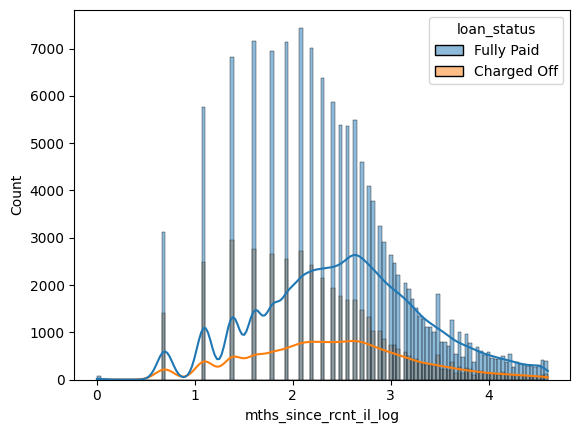

In [33]:
sns.histplot(data=filtered_df, x='mths_since_rcnt_il_log', kde=True, hue='loan_status')

##### revol_util (How much of the borrower's available credit they are currently using)

<Axes: xlabel='revol_util', ylabel='Count'>

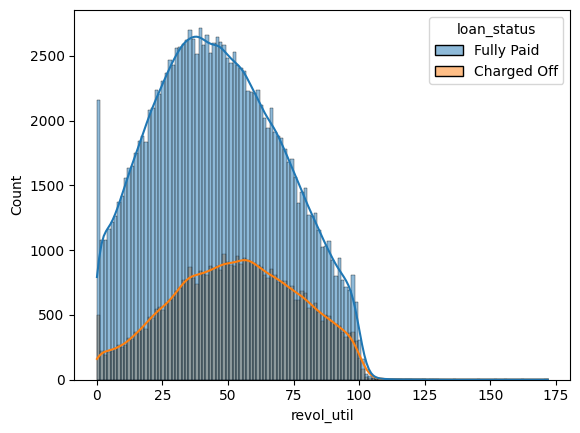

In [34]:
sns.histplot(data=df_modified, x='revol_util', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='revol_util'>

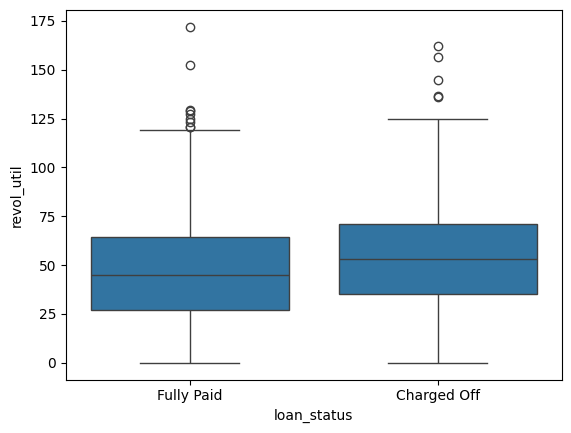

In [35]:
sns.boxplot(data=df_modified, x='loan_status', y='revol_util')

Shape of the DataFrame where revol_util is less than 120: (191319, 57)


<Axes: xlabel='revol_util', ylabel='Count'>

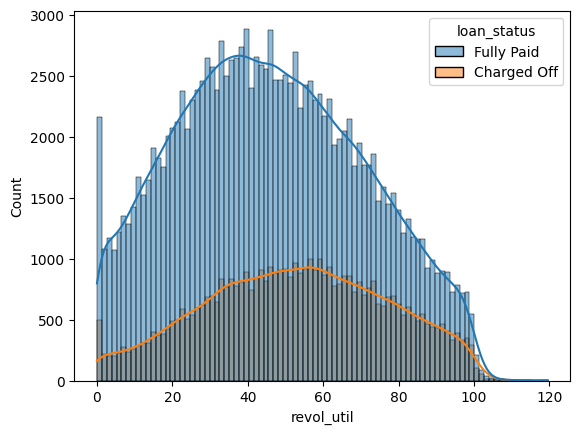

In [36]:
threshold = 120
filtered_df = df_modified[df_modified['revol_util'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where revol_util is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='revol_util', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='revol_util'>

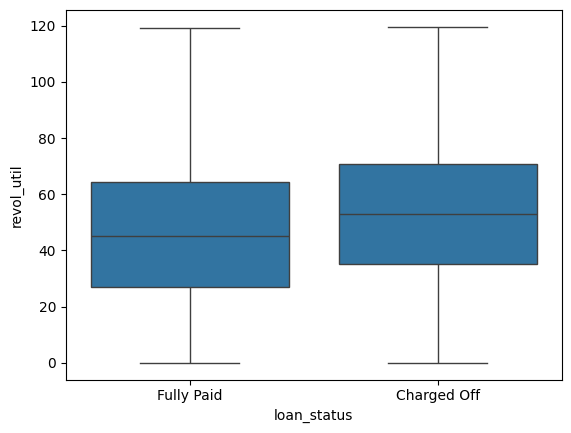

In [37]:
sns.boxplot(x='loan_status', y='revol_util', data=filtered_df)

##### all_util (How much of the borrower's total available credit is being used)

<Axes: xlabel='all_util', ylabel='Count'>

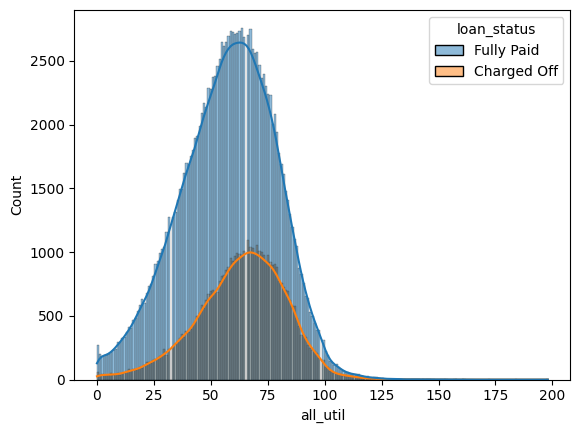

In [38]:
sns.histplot(data=df_modified, x='all_util', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='all_util'>

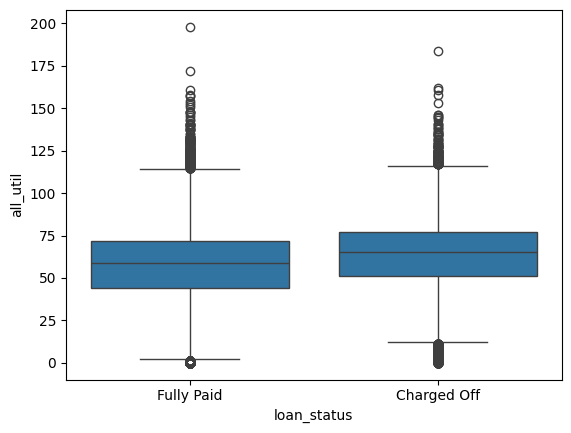

In [39]:
sns.boxplot(data=df_modified, x='loan_status', y='all_util')

Shape of the DataFrame where all_util is less than 115: (191015, 57)


<Axes: xlabel='all_util', ylabel='Count'>

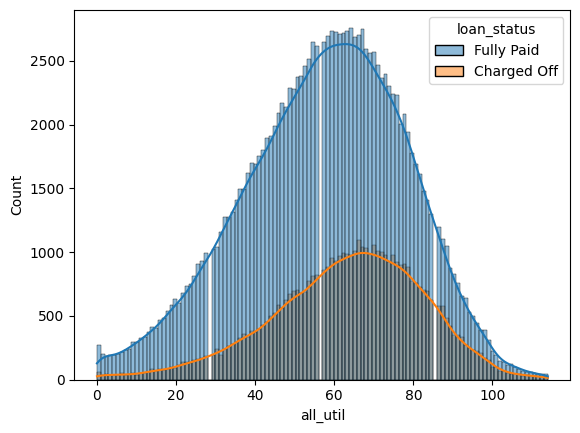

In [40]:
threshold = 115
filtered_df = df_modified[df_modified['all_util'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where all_util is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='all_util', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='all_util'>

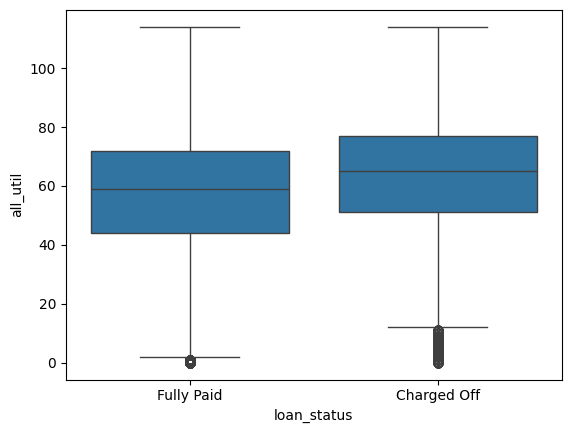

In [41]:
sns.boxplot(x='loan_status', y='all_util', data=filtered_df)

#### Imputation of missing values

In [42]:
df_modified['il_util'].fillna(df_modified['il_util'].mean(), inplace=True)

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_22576\2651419194.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_modified['il_util'].fillna(df_modified['il_util'].mean(), inplace=True)


In [43]:
df_modified['mths_since_rcnt_il'].fillna(df_modified['mths_since_rcnt_il'].median(), inplace=True)

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_22576\3196497083.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_modified['mths_since_rcnt_il'].fillna(df_modified['mths_since_rcnt_il'].median(), inplace=True)


In [44]:
df_modified['revol_util'].fillna(df_modified['revol_util'].mean(), inplace=True)

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_22576\4125485613.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_modified['revol_util'].fillna(df_modified['revol_util'].mean(), inplace=True)


In [45]:
df_modified['dti'].fillna(df_modified['dti'].mean(), inplace=True)

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_22576\2894254215.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_modified['dti'].fillna(df_modified['dti'].mean(), inplace=True)


In [46]:
df_modified['all_util'].fillna(df_modified['all_util'].mean(), inplace=True)

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_22576\30028396.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_modified['all_util'].fillna(df_modified['all_util'].mean(), inplace=True)


In [47]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191470 entries, 8 to 759290
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   191470 non-null  int64  
 1   term                        191470 non-null  object 
 2   int_rate                    191470 non-null  float64
 3   installment                 191470 non-null  float64
 4   grade                       191470 non-null  object 
 5   sub_grade                   191470 non-null  object 
 6   emp_title                   179136 non-null  object 
 7   emp_length                  179244 non-null  object 
 8   home_ownership              191470 non-null  object 
 9   annual_inc                  191470 non-null  float64
 10  verification_status         191470 non-null  object 
 11  issue_d                     191470 non-null  object 
 12  loan_status                 191470 non-null  object 
 13  pymnt_plan         

#### Other numerical features

##### annual_inc

Shape of the DataFrame where Annual Income is less than 400000: (190792, 57)


<Axes: xlabel='annual_inc', ylabel='Count'>

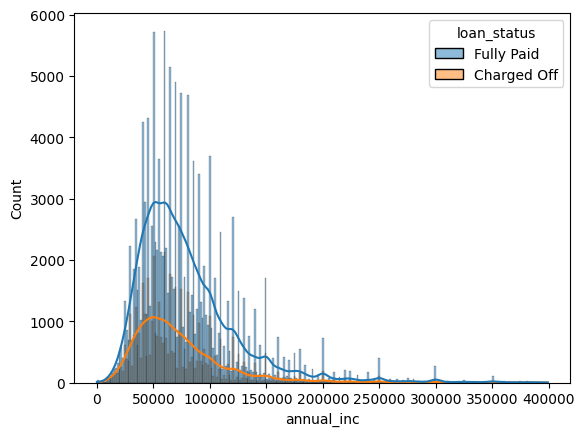

In [48]:
threshold = 400000
filtered_df = df_modified[df_modified['annual_inc'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where Annual Income is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='annual_inc', kde=True, hue='loan_status')

Shape of the DataFrame where Annual Income is less than 170000: (182811, 57)


<Axes: xlabel='annual_inc', ylabel='Count'>

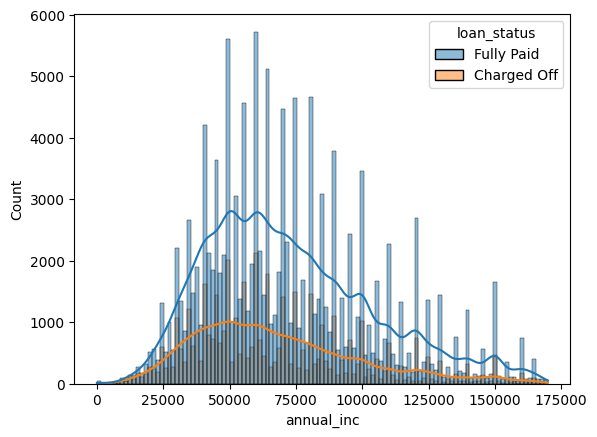

In [49]:
threshold = 170000
filtered_df = df_modified[df_modified['annual_inc'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where Annual Income is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='annual_inc', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='annual_inc'>

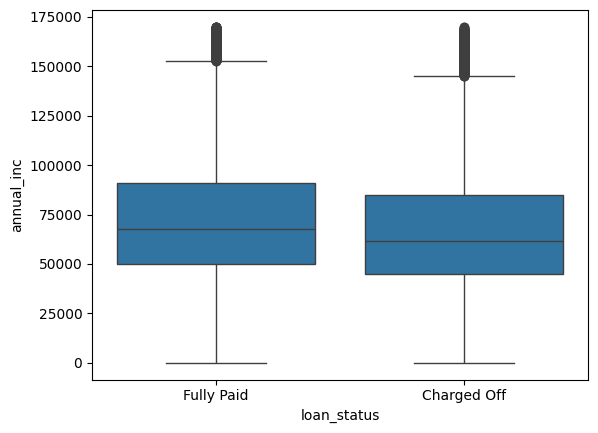

In [50]:
sns.boxplot(x='loan_status', y='annual_inc', data=filtered_df)

##### dti

Shape of the DataFrame where DTI is less than 999: (191465, 57)


<Axes: xlabel='dti', ylabel='Count'>

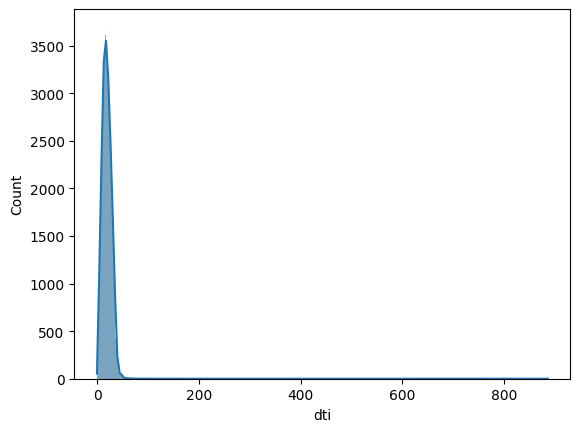

In [51]:
threshold = 999
filtered_df = df_modified[df_modified['dti'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where DTI is less than {threshold}:", filtered_df.shape)

sns.histplot(filtered_df['dti'], kde = True)

Shape of the DataFrame where DTI is less than 47: (190858, 57)


<Axes: xlabel='dti', ylabel='Count'>

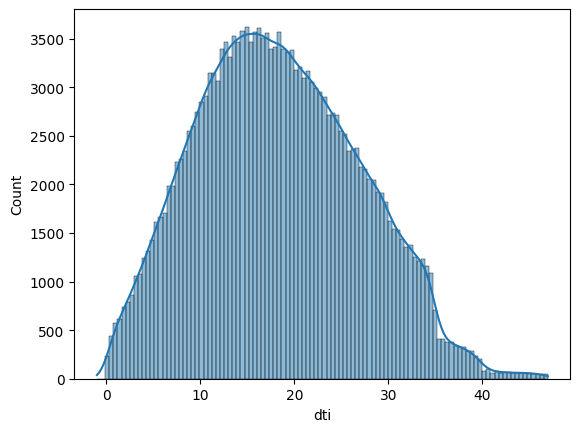

In [52]:
threshold = 47
filtered_df = df_modified[df_modified['dti'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where DTI is less than {threshold}:", filtered_df.shape)

sns.histplot(filtered_df['dti'], kde = True)

<Axes: xlabel='loan_status', ylabel='dti'>

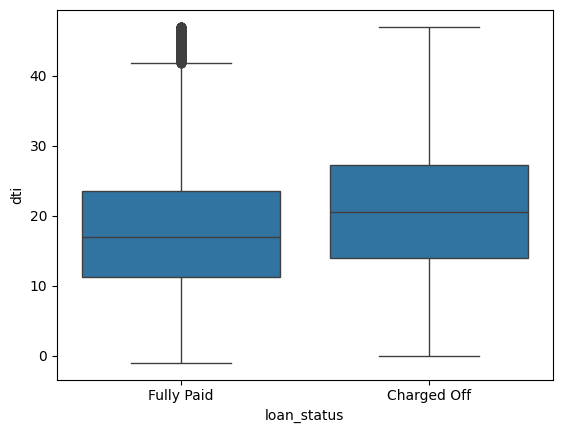

In [53]:
sns.boxplot(x='loan_status', y='dti', data=filtered_df)

In [54]:
df_modified['dti'] = df_modified['dti'].fillna(df_modified['dti'].mean())

##### inq_last_6mths

In [55]:
null_inq_last_6mths_df = df_modified[df_modified['inq_last_6mths'].isnull()]
null_inq_last_6mths_df['loan_status'].value_counts()

Series([], Name: count, dtype: int64)

In [56]:
df_modified.loc[:, 'inq_last_6mths'] = df_modified['inq_last_6mths'].fillna(0)

Shape of the DataFrame where inq_last_6mths is less than 5: (190712, 57)


<Axes: xlabel='inq_last_6mths', ylabel='Count'>

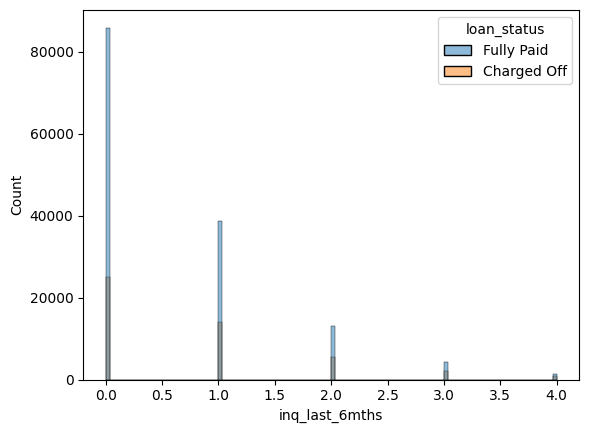

In [57]:
threshold = 5 
filtered_df = df_modified[df_modified['inq_last_6mths'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where inq_last_6mths is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='inq_last_6mths', hue='loan_status')

##### revol_util

<Axes: xlabel='revol_util', ylabel='Count'>

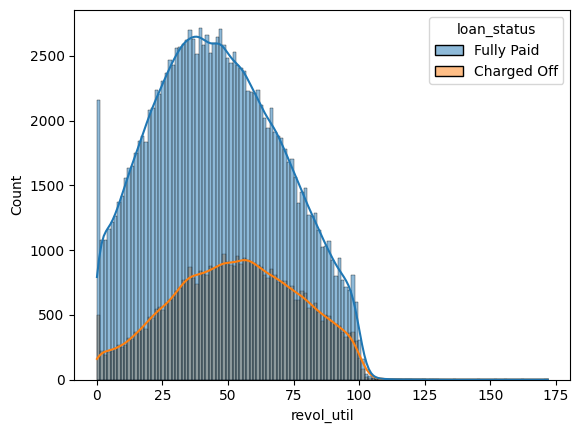

In [58]:
sns.histplot(data=df_modified, x='revol_util', kde=True, hue='loan_status')

Shape of the DataFrame where revol_util is less than 110: (191425, 57)


<Axes: xlabel='revol_util', ylabel='Count'>

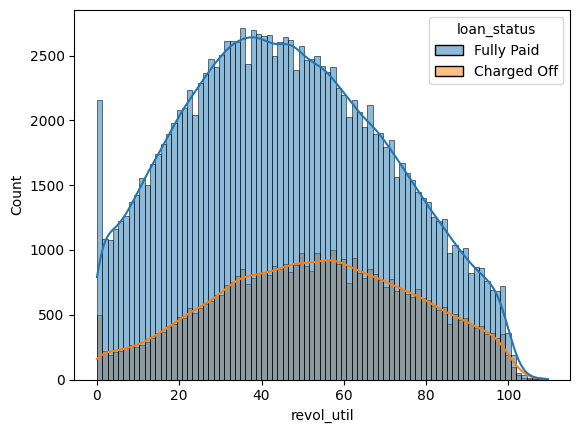

In [59]:
threshold = 110
filtered_df = df_modified[df_modified['revol_util'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where revol_util is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='revol_util', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='revol_util'>

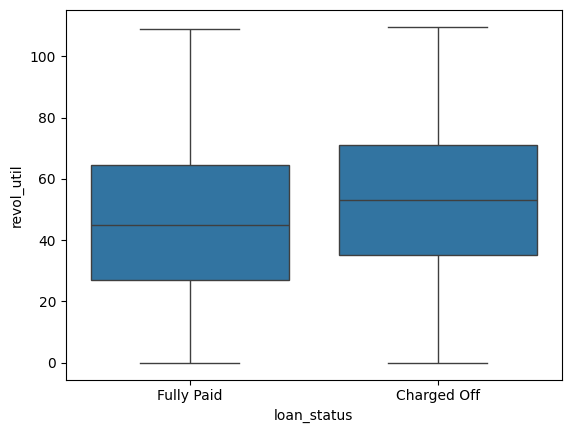

In [60]:
sns.boxplot(x='loan_status', y='revol_util', data=filtered_df)

##### loan_amnt

Shape of the DataFrame where loan_amnt is less than 40000: (190020, 57)


<Axes: xlabel='loan_amnt', ylabel='Count'>

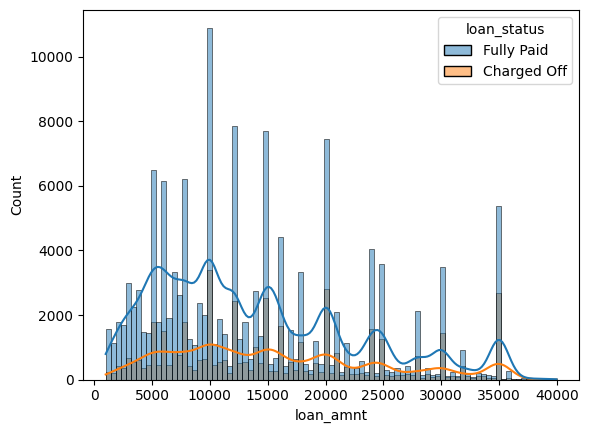

In [61]:
threshold = 40000
filtered_df = df_modified[df_modified['loan_amnt'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where loan_amnt is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='loan_amnt', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

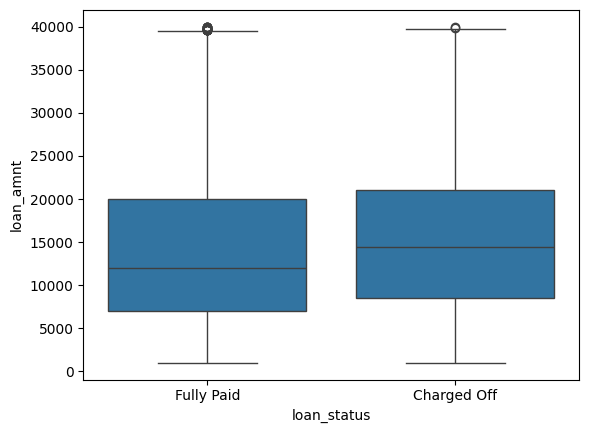

In [62]:
sns.boxplot(x='loan_status', y='loan_amnt', data=filtered_df)

##### int_rate

Shape of the DataFrame where int_rate is less than 31: (191470, 57)


<Axes: xlabel='int_rate', ylabel='Count'>

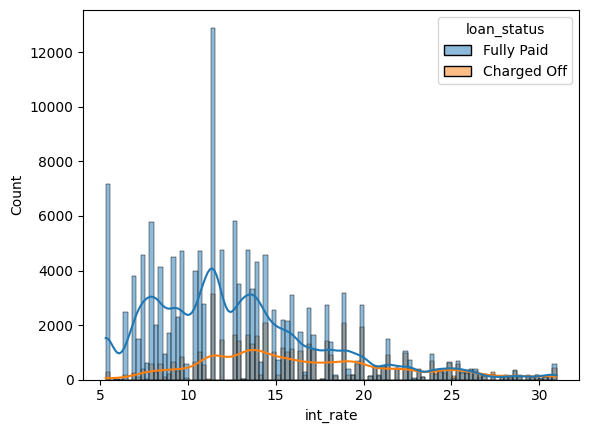

In [63]:
threshold = 31
filtered_df = df_modified[df_modified['int_rate'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where int_rate is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='int_rate', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='int_rate'>

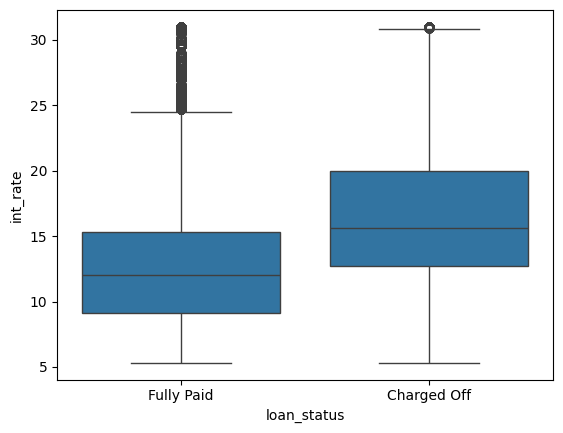

In [64]:
sns.boxplot(x='loan_status', y='int_rate', data=filtered_df)

##### delinq_2yrs

In [65]:
df_modified['delinq_2yrs'].value_counts()

delinq_2yrs
0     152608
1      25547
2       7553
3       2820
4       1293
5        634
6        390
7        216
8        130
9         86
10        56
11        45
12        29
14        19
13        14
15        10
17         5
16         4
20         4
21         3
19         2
18         2
Name: count, dtype: int64

##### open_acc

Shape of the DataFrame where open_acc is less than 30: (189153, 57)


<Axes: xlabel='open_acc', ylabel='Count'>

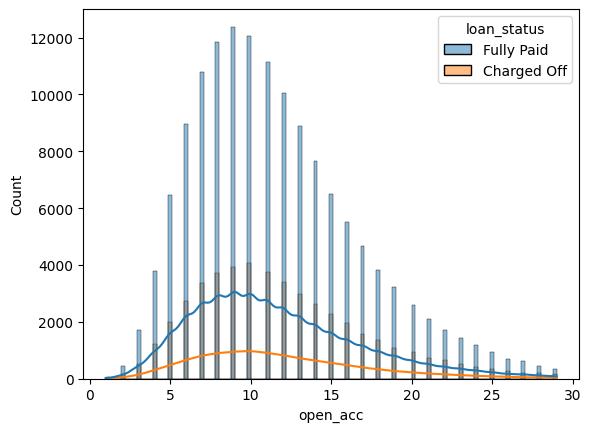

In [66]:
threshold = 30
filtered_df = df_modified[df_modified['open_acc'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where open_acc is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='open_acc', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='open_acc'>

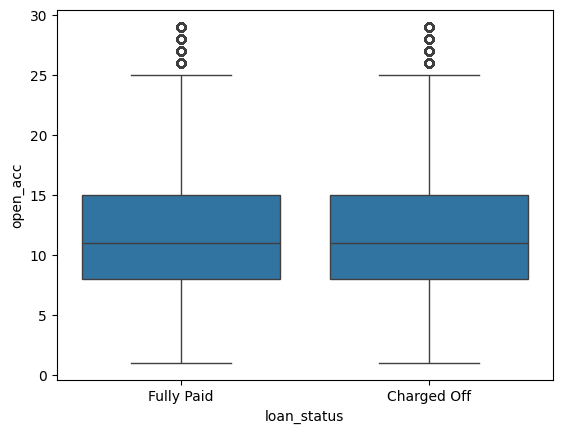

In [67]:
sns.boxplot(x='loan_status', y='open_acc', data=filtered_df)

In [68]:
grouped = filtered_df.groupby(['open_acc', 'loan_status']).size().unstack(fill_value=0)

# Calculate ratio for each loan status within each open_acc type
ratio_df = grouped.div(grouped.sum(axis=1), axis=0)

# Print the ratio dataframe
print("Ratio of loan status grouped by each open_acc type:")
print(ratio_df)

Ratio of loan status grouped by each open_acc type:
loan_status  Charged Off  Fully Paid
open_acc                            
1               0.269841    0.730159
2               0.270227    0.729773
3               0.233244    0.766756
4               0.243659    0.756341
5               0.234111    0.765889
6               0.234115    0.765885
7               0.238011    0.761989
8               0.239520    0.760480
9               0.240120    0.759880
10              0.251645    0.748355
11              0.251611    0.748389
12              0.253286    0.746714
13              0.250274    0.749726
14              0.255474    0.744526
15              0.260098    0.739902
16              0.261621    0.738379
17              0.253884    0.746116
18              0.262459    0.737541
19              0.249244    0.750756
20              0.267330    0.732670
21              0.260501    0.739499
22              0.275964    0.724036
23              0.266462    0.733538
24              0.25837

In [69]:
df_modified = df_modified.drop(columns = ['open_acc'])

##### pub_rec

<Axes: xlabel='pub_rec', ylabel='count'>

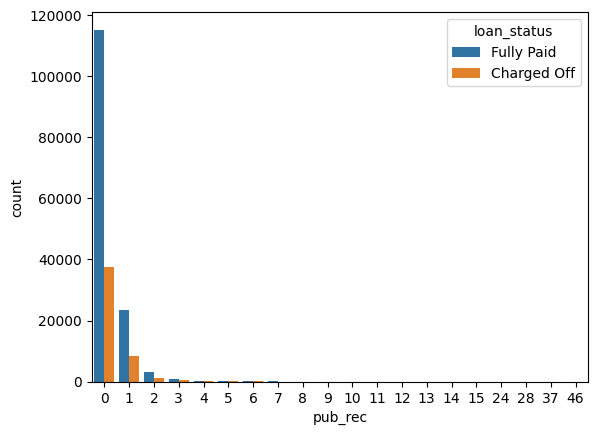

In [70]:
sns.countplot(data=df_modified, x='pub_rec', hue='loan_status')

Shape of the DataFrame where pub_rec is less than 8: (191393, 56)


<Axes: xlabel='pub_rec', ylabel='Count'>

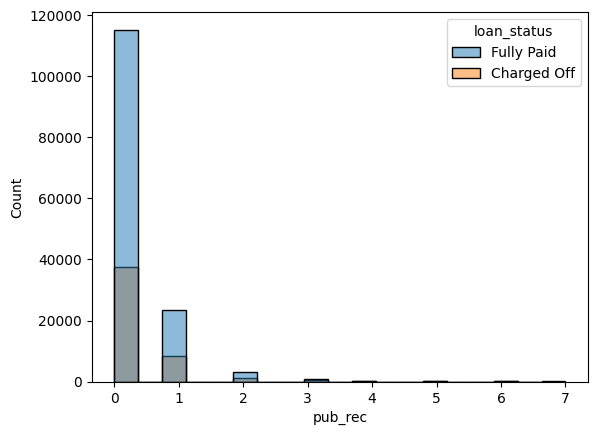

In [71]:
threshold = 8
filtered_df = df_modified[df_modified['pub_rec'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where pub_rec is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='pub_rec', hue='loan_status')

In [72]:
grouped = filtered_df.groupby(['pub_rec', 'loan_status']).size().unstack(fill_value=0)

# Calculate ratio for each loan status within each pub_rec type
ratio_df = grouped.div(grouped.sum(axis=1), axis=0)

# Print the ratio dataframe
print("Ratio of loan status grouped by each pub_rec type:")
print(ratio_df)

Ratio of loan status grouped by each pub_rec type:
loan_status  Charged Off  Fully Paid
pub_rec                             
0               0.244806    0.755194
1               0.264844    0.735156
2               0.283648    0.716352
3               0.263429    0.736571
4               0.297959    0.702041
5               0.307692    0.692308
6               0.298246    0.701754
7               0.260870    0.739130


In [73]:
df_modified = df_modified.drop(columns = ['pub_rec'])

##### total_acc	

<Axes: xlabel='total_acc', ylabel='Count'>

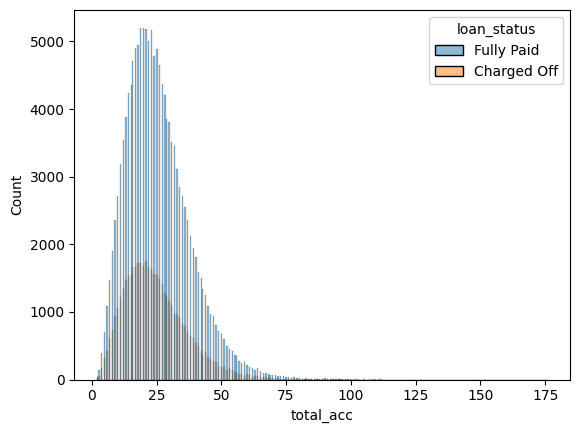

In [74]:
sns.histplot(data=df_modified, x='total_acc', hue='loan_status')

Shape of the DataFrame where totoal_acc is less than 70: (190562, 55)


<Axes: xlabel='total_acc', ylabel='Count'>

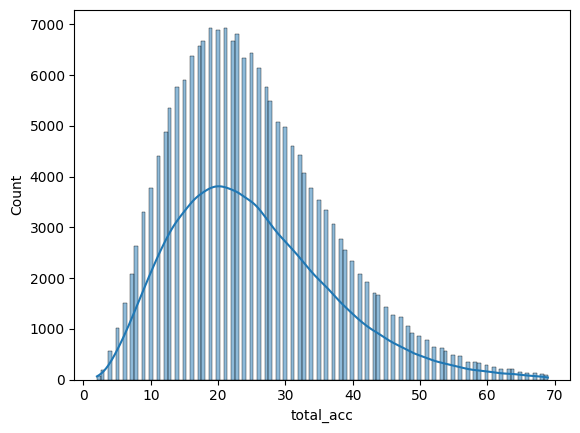

In [75]:
threshold = 70
filtered_df = df_modified[df_modified['total_acc'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where totoal_acc is less than {threshold}:", filtered_df.shape)

sns.histplot(filtered_df['total_acc'], kde = True)

<Axes: xlabel='loan_status', ylabel='total_acc'>

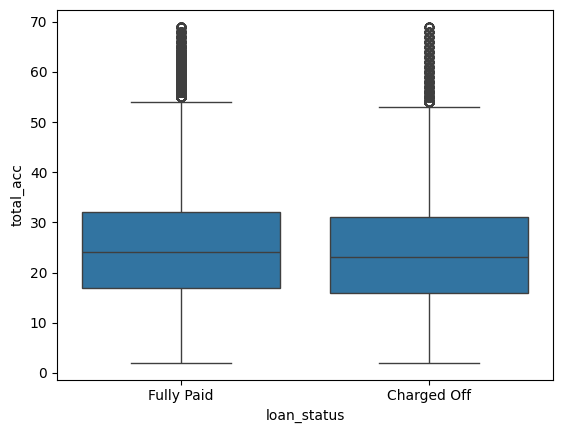

In [76]:
sns.boxplot(x='loan_status', y='total_acc', data=filtered_df)

##### total_pymnt

<Axes: xlabel='total_pymnt', ylabel='Count'>

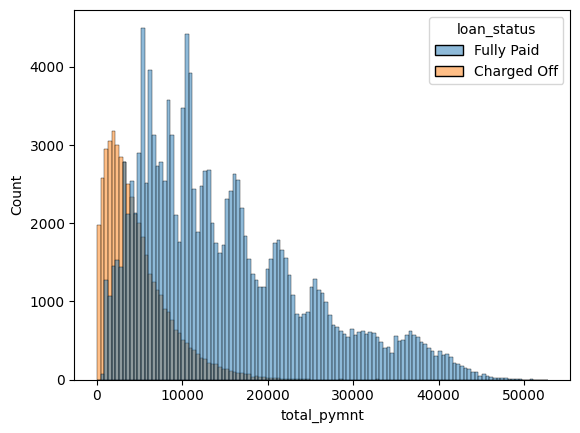

In [77]:
sns.histplot(data=df_modified, x='total_pymnt', hue='loan_status')

<Axes: xlabel='loan_status', ylabel='total_pymnt'>

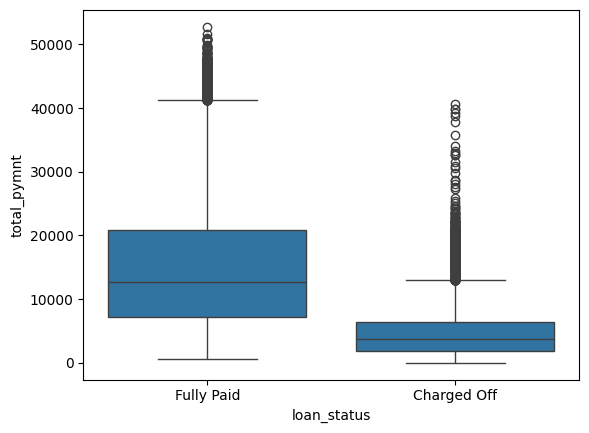

In [78]:
sns.boxplot(x='loan_status', y='total_pymnt', data=filtered_df)

In [79]:
df_modified['total_pymnt_log'] = np.log1p(df_modified['total_pymnt'])

Shape of the DataFrame where total_pymnt_log is less than 70: (189626, 56)


<Axes: xlabel='total_pymnt_log', ylabel='Count'>

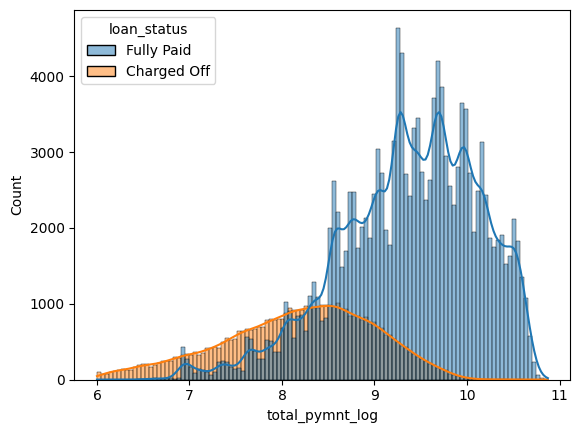

In [80]:
lower_threshold = 6
filtered_df = df_modified[lower_threshold < df_modified['total_pymnt_log']]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where total_pymnt_log is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='total_pymnt_log', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='total_pymnt_log'>

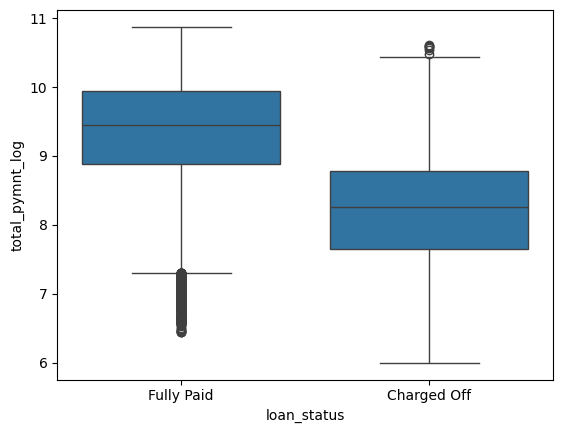

In [81]:
sns.boxplot(x='loan_status', y='total_pymnt_log', data=filtered_df)

In [82]:
df_modified = df_modified.drop(columns = ['total_pymnt'])

##### total_rec_int

Shape of the DataFrame where total_rec_int is less than 6000: (188008, 55)


<Axes: xlabel='total_rec_int', ylabel='Count'>

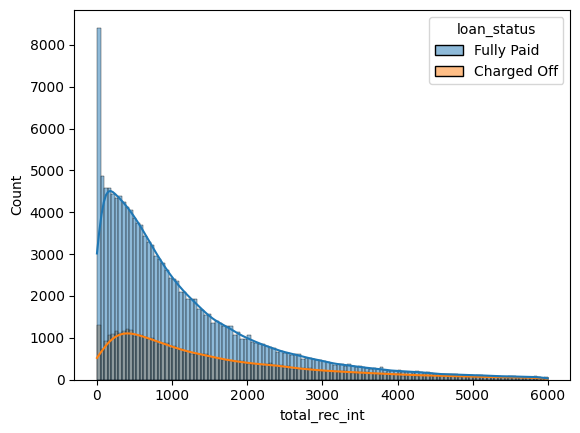

In [83]:
threshold = 6000
filtered_df = df_modified[df_modified['total_rec_int'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where total_rec_int is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='total_rec_int', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='total_rec_int'>

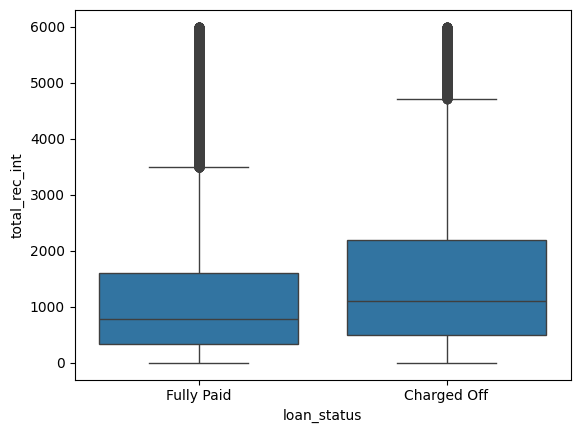

In [84]:
sns.boxplot(x='loan_status', y='total_rec_int', data=filtered_df)

In [85]:
df_modified['total_rec_int_log'] = np.log1p(df_modified['total_rec_int'])

<Axes: xlabel='total_rec_int_log', ylabel='Count'>

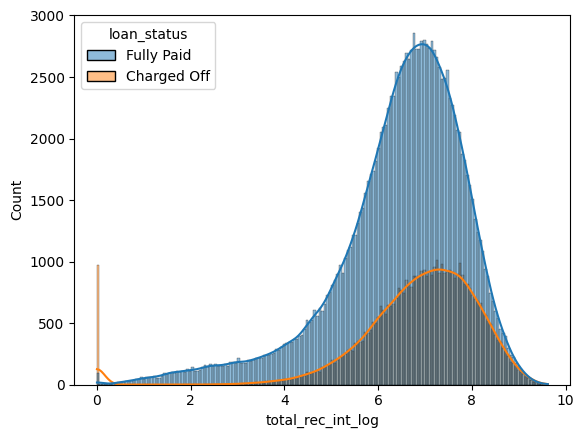

In [86]:
sns.histplot(data=df_modified, x='total_rec_int_log', kde=True, hue='loan_status')

Shape of the DataFrame where total_rec_int_log is more than 3: (185616, 56)


<Axes: xlabel='total_rec_int_log', ylabel='Count'>

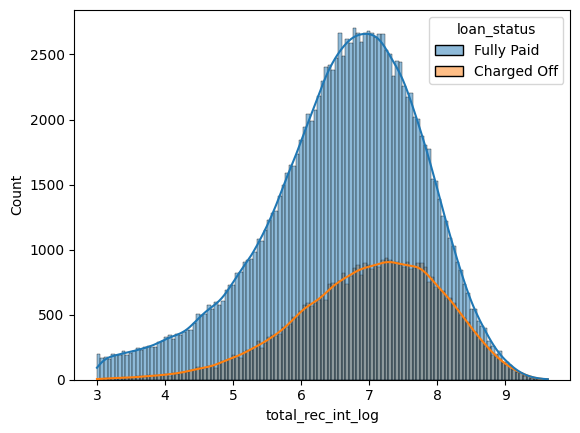

In [87]:
lower_threshold = 3
filtered_df = df_modified[lower_threshold < df_modified['total_rec_int_log']]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where total_rec_int_log is more than {lower_threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='total_rec_int_log', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='total_rec_int_log'>

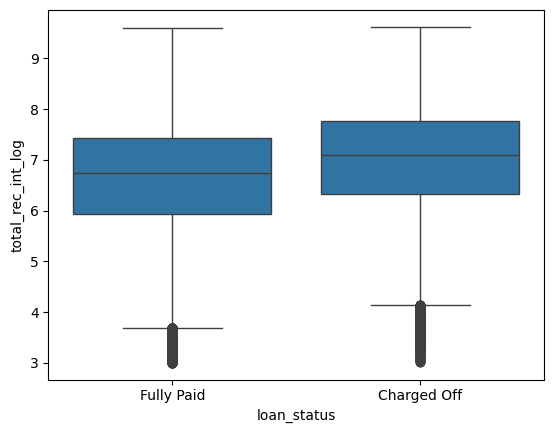

In [88]:
sns.boxplot(x='loan_status', y='total_rec_int_log', data=filtered_df)

In [89]:
df_modified = df_modified.drop(columns = ['total_rec_int'])

##### total_rec_late_fee

In [90]:
df_modified['total_rec_late_fee'].value_counts()

total_rec_late_fee
0.000000      184093
15.000000       1729
30.000000        305
45.000000         95
10.000000         28
               ...  
29.980000          1
30.340000          1
107.800000         1
50.260001          1
60.480000          1
Name: count, Length: 2973, dtype: int64

<Axes: xlabel='total_rec_late_fee', ylabel='count'>

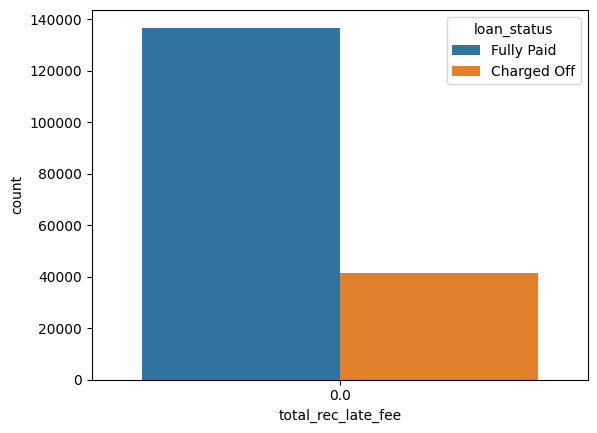

In [91]:
filtered_df_non_zero = filtered_df[filtered_df['total_rec_late_fee'] == 0]

sns.countplot(data=filtered_df_non_zero, x='total_rec_late_fee', hue='loan_status')

<Axes: xlabel='total_rec_late_fee', ylabel='count'>

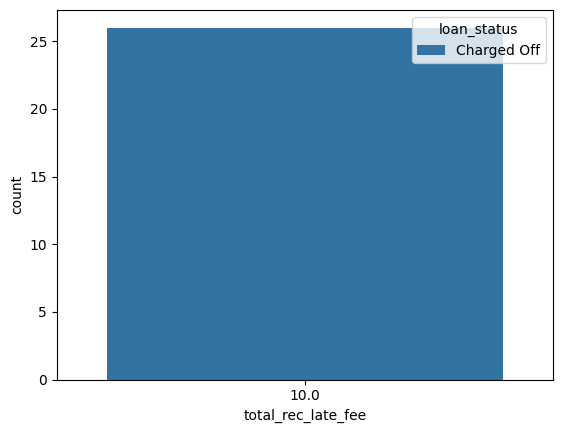

In [92]:
filtered_df_non_zero = filtered_df[filtered_df['total_rec_late_fee'] == 10]

sns.countplot(data=filtered_df_non_zero, x='total_rec_late_fee', hue='loan_status')

<Axes: xlabel='total_rec_late_fee', ylabel='count'>

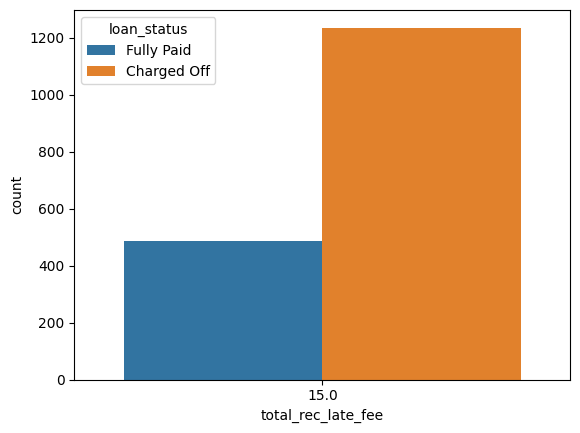

In [93]:
filtered_df_non_zero = filtered_df[filtered_df['total_rec_late_fee'] == 15]

sns.countplot(data=filtered_df_non_zero, x='total_rec_late_fee', hue='loan_status')

<Axes: xlabel='total_rec_late_fee', ylabel='count'>

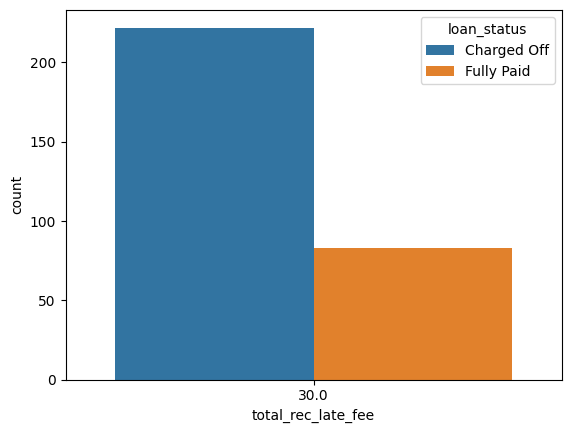

In [94]:
filtered_df_non_zero = filtered_df[filtered_df['total_rec_late_fee'] == 30]

sns.countplot(data=filtered_df_non_zero, x='total_rec_late_fee', hue='loan_status')

In [95]:
df_modified = df_modified.drop(columns=['total_rec_late_fee'])

##### collections_12_mths_ex_med

In [96]:
df_modified['collections_12_mths_ex_med'].value_counts()

collections_12_mths_ex_med
0     187751
1       3466
2        214
3         18
4          9
6          5
5          4
12         2
7          1
Name: count, dtype: int64

In [97]:
df_modified.groupby('loan_status')['collections_12_mths_ex_med'].value_counts()

loan_status  collections_12_mths_ex_med
Charged Off  0                              46588
             1                               1093
             2                                 76
             3                                  6
             4                                  3
             6                                  2
             5                                  1
Fully Paid   0                             141163
             1                               2373
             2                                138
             3                                 12
             4                                  6
             5                                  3
             6                                  3
             12                                 2
             7                                  1
Name: count, dtype: int64

In [98]:
df_modified = df_modified.drop(columns = ['collections_12_mths_ex_med'])

##### revol_bal_log

<Axes: xlabel='revol_bal', ylabel='Count'>

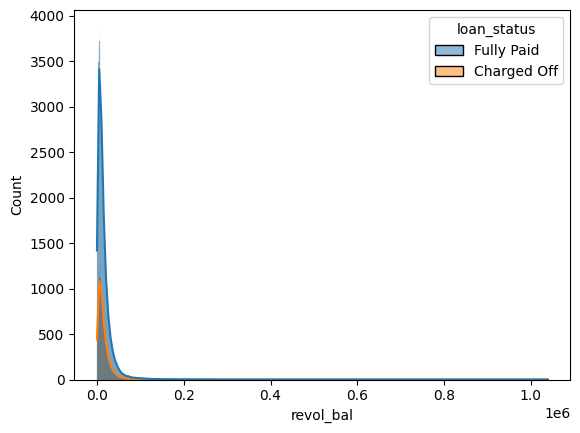

In [99]:
sns.histplot(data=df_modified, x='revol_bal', kde=True, hue='loan_status')

Shape of the DataFrame where revol_bal is less than 75000: (188094, 53)


<Axes: xlabel='revol_bal', ylabel='Count'>

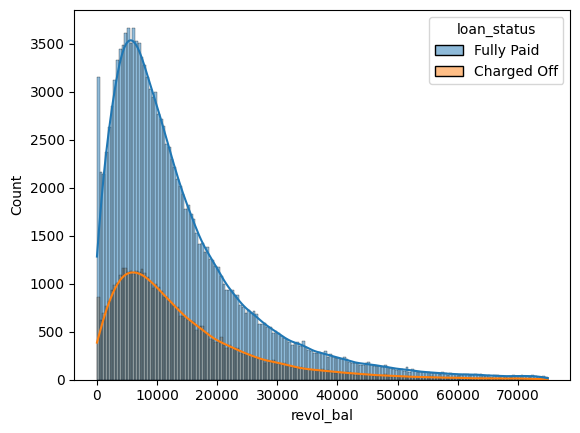

In [100]:
threshold = 75000
filtered_df = df_modified[df_modified['revol_bal'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where revol_bal is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='revol_bal', kde=True, hue='loan_status')

In [101]:
skewness = filtered_df['revol_bal'].skew()
print(skewness)

1.7486042498752303


Skewness after log transformation of revol_bal: -2.51


<Axes: xlabel='revol_bal_log', ylabel='Count'>

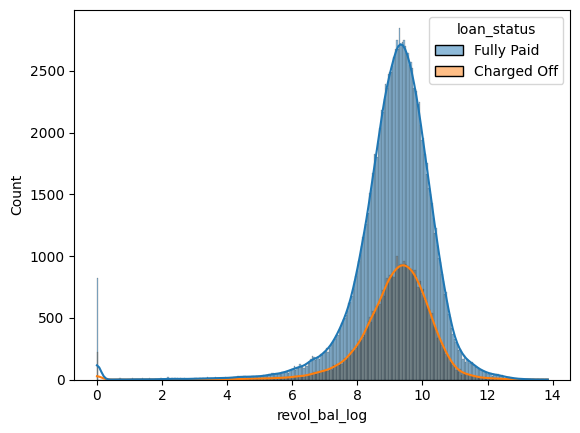

In [102]:
df_modified['revol_bal_log'] = np.log1p(df_modified['revol_bal'])
log_skewness = df_modified['revol_bal_log'].skew()
print(f"Skewness after log transformation of revol_bal: {log_skewness:.2f}")

sns.histplot(data=df_modified, x='revol_bal_log', kde=True, hue='loan_status')

Shape of the DataFrame where revol_bal_log is between 5 and 13: (189145, 54)


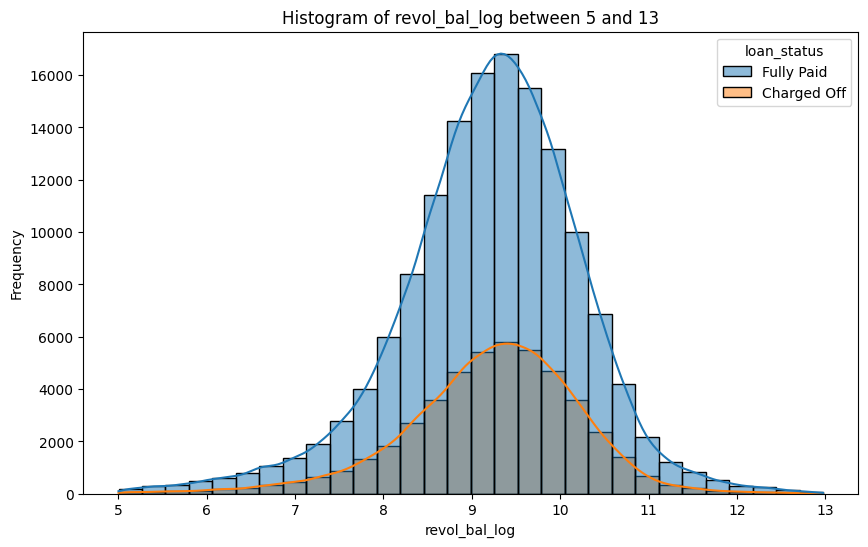

In [103]:
lower_threshold = 5
upper_threshold = 13

# Filter the DataFrame between the thresholds
filtered_df = df_modified[(df_modified['revol_bal_log'] >= lower_threshold) & (df_modified['revol_bal_log'] < upper_threshold)]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where revol_bal_log is between {lower_threshold} and {upper_threshold}:", filtered_df.shape)

# Plot the histogram with KDE and hue
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='revol_bal_log', kde=True, hue='loan_status', bins=30)
plt.title(f'Histogram of revol_bal_log between {lower_threshold} and {upper_threshold}')
plt.xlabel('revol_bal_log')
plt.ylabel('Frequency')
plt.show()

In [104]:
df_modified = df_modified.drop(columns = ['revol_bal'])

##### out_prncp

In [105]:
df_modified['out_prncp'].describe()

count    191470.000000
mean       1064.680094
std        3949.068352
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       40000.000000
Name: out_prncp, dtype: float64

In [106]:
df_modified['out_prncp'].value_counts()

out_prncp
0.00        167954
3796.02         55
5693.91         51
3906.93         51
3952.73         51
             ...  
4720.15          1
2056.16          1
30926.97         1
17267.88         1
7784.34          1
Name: count, Length: 18811, dtype: int64

In [107]:
df_modified = df_modified.drop(columns = ['out_prncp'])

##### total_rec_prncp

<Axes: xlabel='total_rec_prncp', ylabel='Count'>

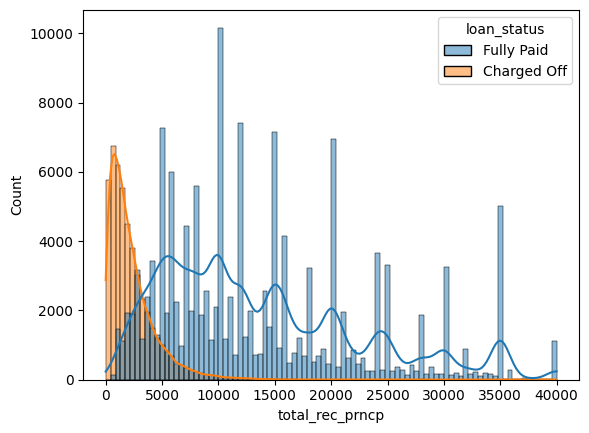

In [108]:
sns.histplot(data=df_modified, x='total_rec_prncp', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='total_rec_prncp'>

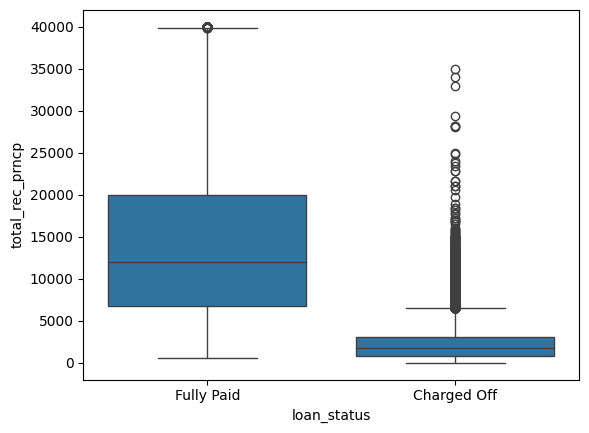

In [109]:
sns.boxplot(x='loan_status', y='total_rec_prncp', data=df_modified)

In [110]:
df_modified['total_rec_prncp_log'] = np.log1p(df_modified['total_rec_prncp'])

<Axes: xlabel='total_rec_prncp_log', ylabel='Count'>

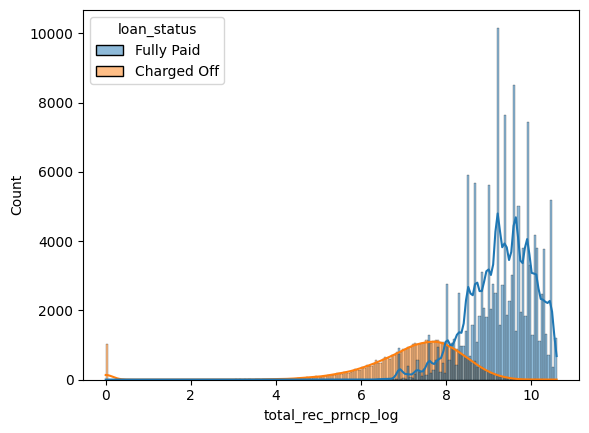

In [111]:
sns.histplot(data=df_modified, x='total_rec_prncp_log', kde=True, hue='loan_status')

Shape of the DataFrame where total_rec_prncp_log is more than 4: (190349, 53)


<Axes: xlabel='total_rec_prncp_log', ylabel='Count'>

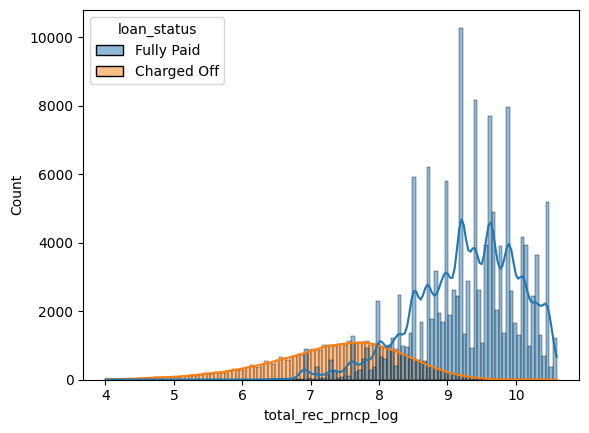

In [112]:
lower_threshold = 4
filtered_df = df_modified[lower_threshold < df_modified['total_rec_prncp_log']]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where total_rec_prncp_log is more than {lower_threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='total_rec_prncp_log', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='total_rec_prncp_log'>

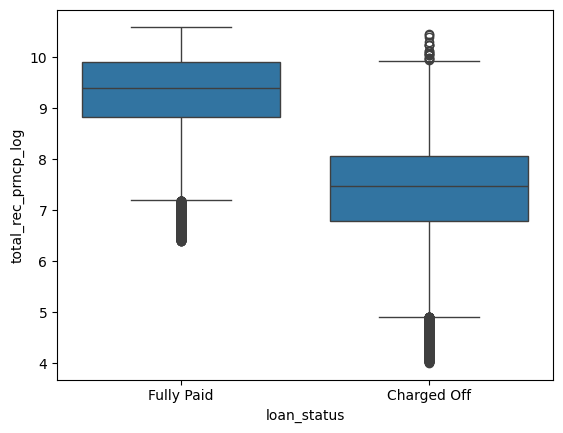

In [113]:
sns.boxplot(x='loan_status', y='total_rec_prncp_log', data=filtered_df)

In [114]:
df_modified = df_modified.drop(columns = ['total_rec_prncp'])

##### recoveries

In [115]:
df_modified['recoveries'].value_counts()

recoveries
0.00       175465
50.00         154
100.00        132
200.00         78
150.00         56
            ...  
459.67          1
1277.83         1
1758.60         1
1227.94         1
852.31          1
Name: count, Length: 14658, dtype: int64

In [116]:
df_modified = df_modified.drop(columns = ['recoveries'])

##### collection_recovery_fee

In [117]:
df_modified['collection_recovery_fee'].value_counts()

collection_recovery_fee
0.0000      175477
9.0000         130
18.0000         96
36.0000         58
27.0000         46
             ...  
192.0528         1
568.4040         1
591.6888         1
329.1336         1
153.4158         1
Name: count, Length: 14945, dtype: int64

In [118]:
df_modified = df_modified.drop(columns = ['collection_recovery_fee'])

##### last_pymnt_amnt

<Axes: xlabel='last_pymnt_amnt', ylabel='Count'>

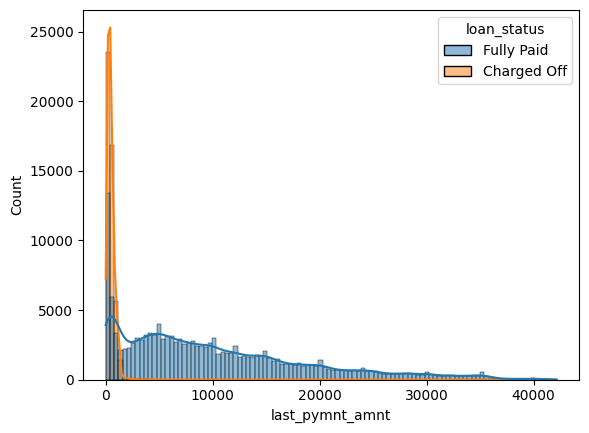

In [119]:
sns.histplot(data=df_modified, x='last_pymnt_amnt', kde=True, hue='loan_status')

In [120]:
df_modified['last_pymnt_amnt_log'] = np.log1p(df_modified['last_pymnt_amnt'])

<Axes: xlabel='last_pymnt_amnt_log', ylabel='Count'>

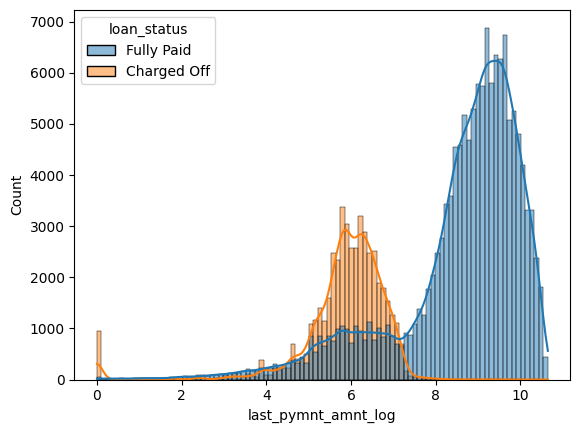

In [121]:
sns.histplot(data=df_modified, x='last_pymnt_amnt_log', kde=True, hue='loan_status')

Shape of the DataFrame where last_pymnt_amnt_log is more than 3: (189087, 51)


<Axes: xlabel='last_pymnt_amnt_log', ylabel='Count'>

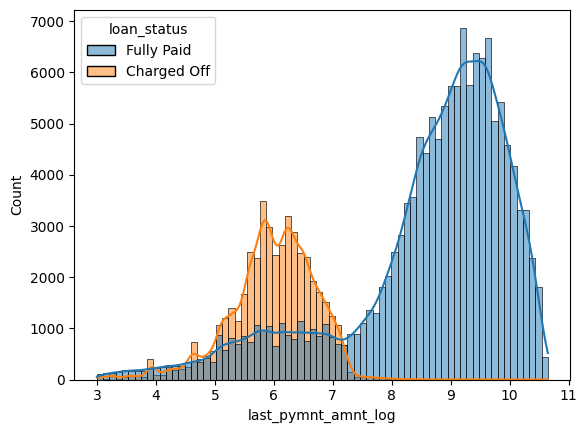

In [122]:
lower_threshold = 3
filtered_df = df_modified[lower_threshold < df_modified['last_pymnt_amnt_log']]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where last_pymnt_amnt_log is more than {lower_threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='last_pymnt_amnt_log', kde=True, hue='loan_status')

In [123]:
df_modified = df_modified.drop(columns = ['last_pymnt_amnt'])

##### acc_now_delinq	

In [124]:
df_modified['acc_now_delinq'].value_counts()

acc_now_delinq
0    190319
1      1096
2        49
3         5
4         1
Name: count, dtype: int64

In [125]:
df_modified.groupby('loan_status')['acc_now_delinq'].value_counts()

loan_status  acc_now_delinq
Charged Off  0                  47436
             1                    310
             2                     22
             3                      1
Fully Paid   0                 142883
             1                    786
             2                     27
             3                      4
             4                      1
Name: count, dtype: int64

In [126]:
df_modified = df_modified.drop(columns = ['acc_now_delinq'])

##### tot_coll_amt

In [127]:
df_modified['tot_coll_amt'].value_counts()

tot_coll_amt
0.0       159067
50.0         347
100.0        338
75.0         221
150.0        212
           ...  
4478.0         1
3280.0         1
7887.0         1
7408.0         1
2085.0         1
Name: count, Length: 5690, dtype: int64

In [128]:
df_modified.groupby('loan_status')['tot_coll_amt'].value_counts()

loan_status  tot_coll_amt
Charged Off  0.0             39066
             50.0              113
             100.0              85
             75.0               64
             200.0              56
                             ...  
Fully Paid   119428.0            1
             132776.0            1
             161045.0            1
             173380.0            1
             199433.0            1
Name: count, Length: 7734, dtype: int64

In [129]:
df_modified = df_modified.drop(columns = ['tot_coll_amt'])

##### tot_cur_bal

<Axes: xlabel='tot_cur_bal', ylabel='Count'>

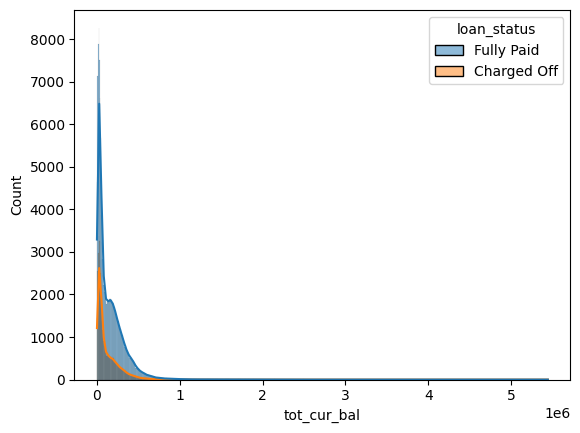

In [130]:
sns.histplot(data=df_modified, x='tot_cur_bal', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='tot_cur_bal'>

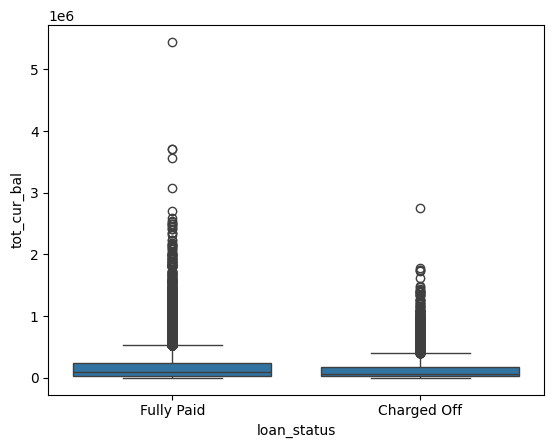

In [131]:
sns.boxplot(x='loan_status', y='tot_cur_bal', data=df_modified)

In [132]:
df_modified['tot_cur_bal_log'] = np.log1p(df_modified['tot_cur_bal'])

Shape of the DataFrame where tot_cur_bal_log is more than 7.8: (189924, 49)


<Axes: xlabel='tot_cur_bal_log', ylabel='Count'>

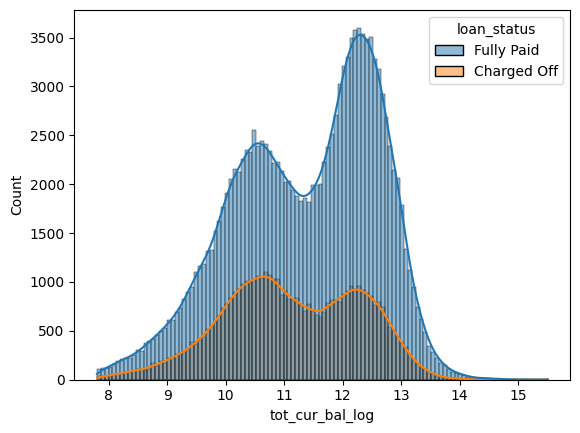

In [133]:
lower_threshold = 7.8
filtered_df = df_modified[lower_threshold < df_modified['tot_cur_bal_log']]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where tot_cur_bal_log is more than {lower_threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='tot_cur_bal_log', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='tot_cur_bal_log'>

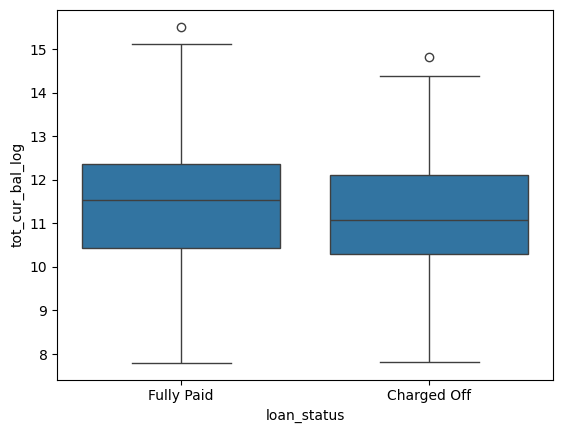

In [134]:
sns.boxplot(x='loan_status', y='tot_cur_bal_log', data=filtered_df)

In [135]:
df_modified = df_modified.drop(columns = ['tot_cur_bal'])

##### open_acc_6m

In [136]:
df_modified['open_acc_6m'].value_counts()

open_acc_6m
0.0     73903
1.0     60904
2.0     32932
3.0     14284
4.0      5727
5.0      2156
6.0       906
7.0       366
8.0       151
9.0        74
10.0       29
11.0       18
12.0       11
14.0        3
16.0        2
13.0        1
18.0        1
17.0        1
15.0        1
Name: count, dtype: int64

In [137]:
grouped = df_modified.groupby(['open_acc_6m', 'loan_status']).size().unstack(fill_value=0)

# Calculate percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Display the counts and percentages
print("Counts:\n", grouped)
print("\nPercentages:\n", percentages.round(2))

Counts:
 loan_status  Charged Off  Fully Paid
open_acc_6m                         
0.0                16600       57303
1.0                14943       45961
2.0                 8976       23956
3.0                 4161       10123
4.0                 1849        3878
5.0                  722        1434
6.0                  300         606
7.0                  114         252
8.0                   58          93
9.0                   23          51
10.0                   8          21
11.0                   8          10
12.0                   3           8
13.0                   0           1
14.0                   1           2
15.0                   0           1
16.0                   1           1
17.0                   1           0
18.0                   1           0

Percentages:
 loan_status  Charged Off  Fully Paid
open_acc_6m                         
0.0                22.46       77.54
1.0                24.54       75.46
2.0                27.26       72.74
3.0           

##### open_il_12m

In [138]:
df_modified['open_il_12m'].value_counts()

open_il_12m
0.0     89753
1.0     61977
2.0     26719
3.0      8632
4.0      2864
5.0       934
6.0       364
7.0       115
8.0        49
9.0        26
10.0       16
11.0       10
13.0        4
12.0        3
21.0        1
25.0        1
14.0        1
20.0        1
Name: count, dtype: int64

In [139]:
grouped = df_modified.groupby(['open_il_12m', 'loan_status']).size().unstack(fill_value=0)

# Calculate percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Display the counts and percentages
print("Counts:\n", grouped)
print("\nPercentages:\n", percentages.round(2))

Counts:
 loan_status  Charged Off  Fully Paid
open_il_12m                         
0.0                20316       69437
1.0                15800       46177
2.0                 7524       19195
3.0                 2744        5888
4.0                  881        1983
5.0                  299         635
6.0                  128         236
7.0                   38          77
8.0                   16          33
9.0                    9          17
10.0                   5          11
11.0                   4           6
12.0                   1           2
13.0                   2           2
14.0                   0           1
20.0                   0           1
21.0                   1           0
25.0                   1           0

Percentages:
 loan_status  Charged Off  Fully Paid
open_il_12m                         
0.0                22.64       77.36
1.0                25.49       74.51
2.0                28.16       71.84
3.0                31.79       68.21
4.0           

In [140]:
df_modified = df_modified.drop(columns = ['open_il_12m'])

##### open_il_24m

In [141]:
grouped = df_modified.groupby(['open_il_24m', 'loan_status']).size().unstack(fill_value=0)

# Calculate percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Display the counts and percentages
print("Counts:\n", grouped)
print("\nPercentages:\n", percentages.round(2))

Counts:
 loan_status  Charged Off  Fully Paid
open_il_24m                         
0.0                 9285       32364
1.0                13348       42827
2.0                10585       31422
3.0                 6401       17788
4.0                 3684        9364
5.0                 2059        4829
6.0                 1076        2367
7.0                  606        1206
8.0                  330         691
9.0                  147         348
10.0                 110         185
11.0                  52         115
12.0                  32          69
13.0                  24          49
14.0                  10          26
15.0                   6          15
16.0                   5          11
17.0                   1           7
18.0                   0           7
19.0                   1           2
20.0                   4           1
21.0                   0           2
22.0                   0           2
23.0                   1           0
24.0                   0     

In [142]:
df_modified.groupby('loan_status')['open_il_24m'].value_counts()

loan_status  open_il_24m
Charged Off  1.0            13348
             2.0            10585
             0.0             9285
             3.0             6401
             4.0             3684
             5.0             2059
             6.0             1076
             7.0              606
             8.0              330
             9.0              147
             10.0             110
             11.0              52
             12.0              32
             13.0              24
             14.0              10
             15.0               6
             16.0               5
             20.0               4
             17.0               1
             19.0               1
             23.0               1
             31.0               1
             51.0               1
Fully Paid   1.0            42827
             0.0            32364
             2.0            31422
             3.0            17788
             4.0             9364
             5.0       

In [143]:
df_modified = df_modified.drop(columns = ['open_il_24m'])

##### mths_since_rcnt_il

<Axes: xlabel='mths_since_rcnt_il', ylabel='Count'>

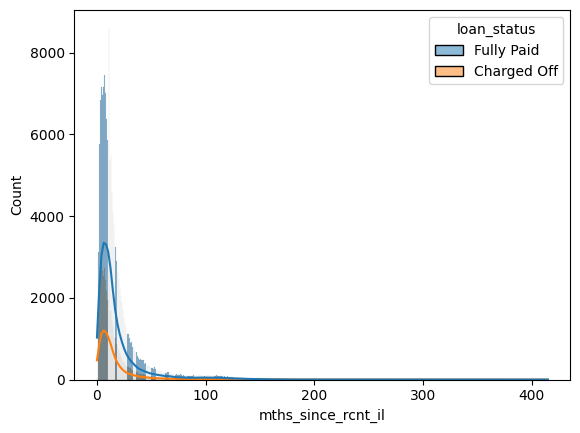

In [144]:
sns.histplot(data=df_modified, x='mths_since_rcnt_il', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='mths_since_rcnt_il'>

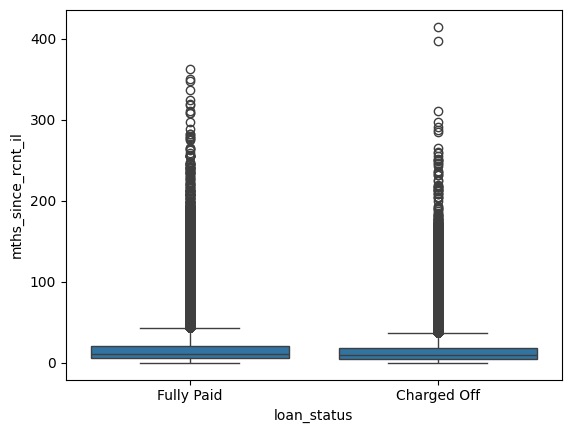

In [145]:
sns.boxplot(x='loan_status', y='mths_since_rcnt_il', data=df_modified)

In [146]:
df_modified['mths_since_rcnt_il_log'] = np.log1p(df_modified['mths_since_rcnt_il'])

Shape of the DataFrame where mths_since_rcnt_il_log is less than 4.5: (185420, 47)


<Axes: xlabel='mths_since_rcnt_il_log', ylabel='Count'>

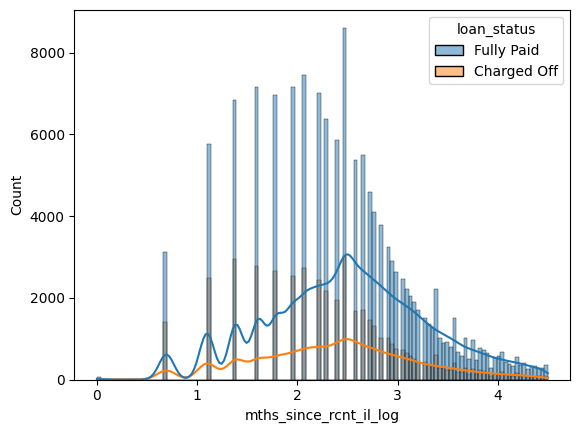

In [147]:
upper_threshold = 4.5
filtered_df = df_modified[df_modified['mths_since_rcnt_il_log'] < upper_threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where mths_since_rcnt_il_log is less than {upper_threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='mths_since_rcnt_il_log', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='mths_since_rcnt_il_log'>

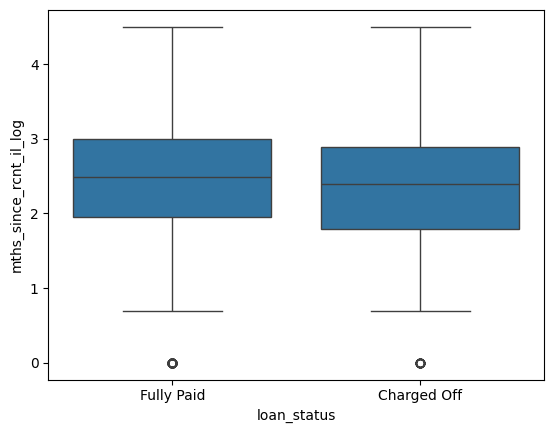

In [148]:
sns.boxplot(x='loan_status', y='mths_since_rcnt_il_log', data=filtered_df)

In [149]:
df_modified = df_modified.drop(columns = ['mths_since_rcnt_il'])

##### total_bal_il

<Axes: xlabel='total_bal_il', ylabel='Count'>

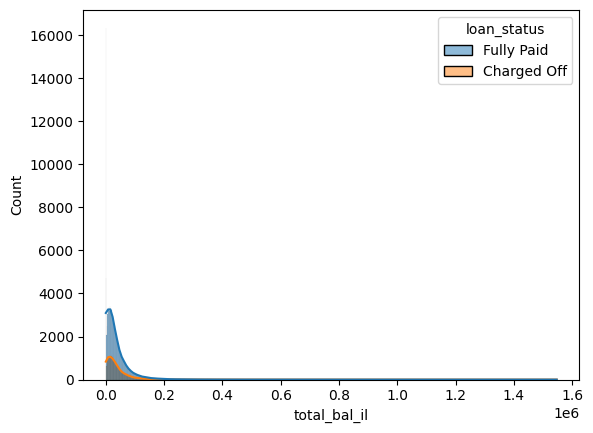

In [150]:
sns.histplot(data=df_modified, x='total_bal_il', kde=True, hue='loan_status')

Shape of the DataFrame where total_bal_il is less than 200000: (189525, 46)


<Axes: xlabel='total_bal_il', ylabel='Count'>

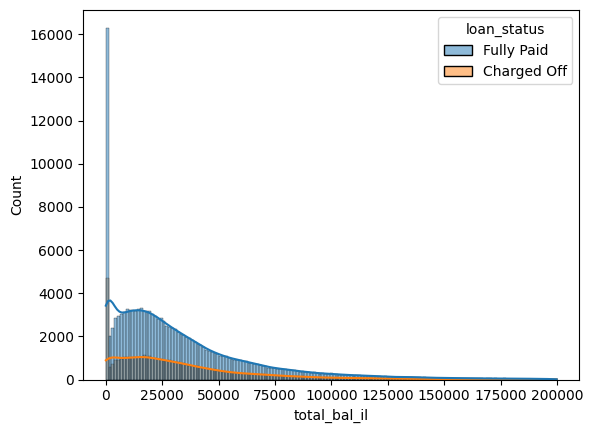

In [151]:
upper_threshold = 200000
filtered_df = df_modified[df_modified['total_bal_il'] < upper_threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where total_bal_il is less than {upper_threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='total_bal_il', kde=True, hue='loan_status')

In [152]:
df_modified = df_modified.drop(columns = ['total_bal_il'])

##### open_rv_12m

In [153]:
df_modified['open_rv_12m'].value_counts()

open_rv_12m
0.0     59385
1.0     56852
2.0     36536
3.0     19580
4.0      9507
5.0      4621
6.0      2373
7.0      1204
8.0       597
9.0       309
10.0      200
11.0      117
12.0       62
13.0       34
14.0       31
15.0       25
16.0        9
17.0        8
18.0        7
20.0        4
19.0        3
21.0        3
24.0        1
28.0        1
26.0        1
Name: count, dtype: int64

In [154]:
grouped = df_modified.groupby(['open_rv_12m', 'loan_status']).size().unstack(fill_value=0)

# Calculate percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Display the counts and percentages
print("Counts:\n", grouped)
print("\nPercentages:\n", percentages.round(2))

Counts:
 loan_status  Charged Off  Fully Paid
open_rv_12m                         
0.0                13366       46019
1.0                13635       43217
2.0                 9650       26886
3.0                 5457       14123
4.0                 2765        6742
5.0                 1396        3225
6.0                  731        1642
7.0                  366         838
8.0                  176         421
9.0                   79         230
10.0                  59         141
11.0                  36          81
12.0                  16          46
13.0                   8          26
14.0                  11          20
15.0                   5          20
16.0                   2           7
17.0                   4           4
18.0                   4           3
19.0                   0           3
20.0                   1           3
21.0                   1           2
24.0                   1           0
26.0                   0           1
28.0                   0     

In [155]:
df_modified = df_modified.drop(columns = ['open_rv_12m'])

##### open_rv_24m

In [156]:
grouped = df_modified.groupby(['open_rv_24m', 'loan_status']).size().unstack(fill_value=0)

# Calculate percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Display the counts and percentages
print("Counts:\n", grouped)
print("\nPercentages:\n", percentages.round(2))

Counts:
 loan_status  Charged Off  Fully Paid
open_rv_24m                         
0.0                 4780       18399
1.0                 7660       27868
2.0                 8464       27614
3.0                 7624       22021
4.0                 5859       15856
5.0                 4204       10929
6.0                 3010        7119
7.0                 1978        4830
8.0                 1388        3015
9.0                  928        1979
10.0                 590        1313
11.0                 394         893
12.0                 265         538
13.0                 187         407
14.0                 135         248
15.0                  69         173
16.0                  67         139
17.0                  43          89
18.0                  39          80
19.0                  18          44
20.0                  14          31
21.0                  10          26
22.0                  11          18
23.0                   5           7
24.0                   6     

##### max_bal_bc

<Axes: xlabel='max_bal_bc', ylabel='Count'>

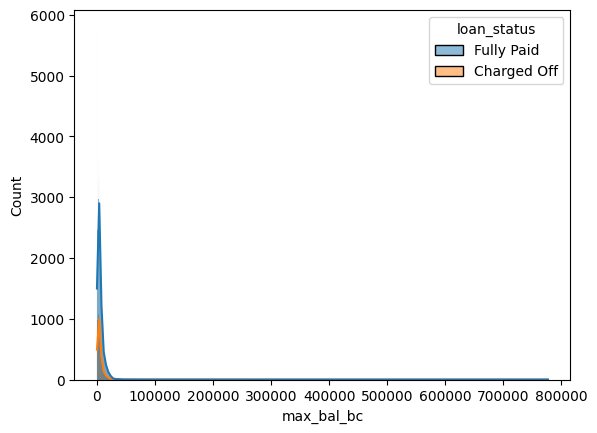

In [157]:
sns.histplot(data=df_modified, x='max_bal_bc', kde=True, hue='loan_status')

Shape of the DataFrame where max_bal_bc is less than 20000: (187167, 44)


<Axes: xlabel='max_bal_bc', ylabel='Count'>

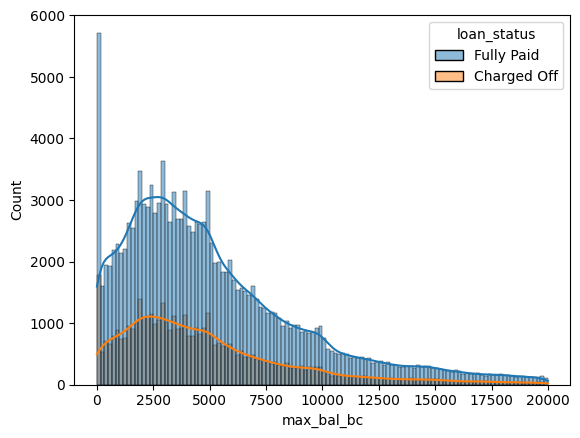

In [158]:
upper_threshold = 20000
filtered_df = df_modified[df_modified['max_bal_bc'] < upper_threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where max_bal_bc is less than {upper_threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='max_bal_bc', kde=True, hue='loan_status')

##### total_rev_hi_lim

<Axes: xlabel='total_rev_hi_lim', ylabel='Count'>

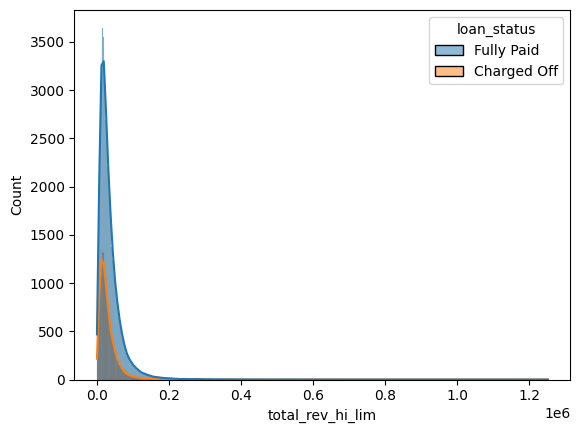

In [159]:
sns.histplot(data=df_modified, x='total_rev_hi_lim', kde=True, hue='loan_status')

Shape of the DataFrame where total_rev_hi_lim is less than 125000: (187330, 44)


<Axes: xlabel='total_rev_hi_lim', ylabel='Count'>

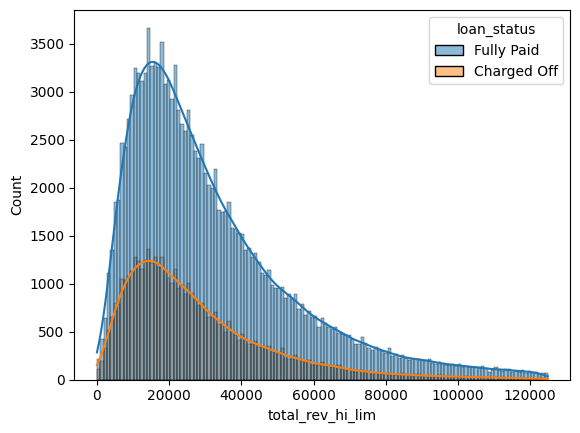

In [160]:
upper_threshold = 125000
filtered_df = df_modified[df_modified['total_rev_hi_lim'] < upper_threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where total_rev_hi_lim is less than {upper_threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='total_rev_hi_lim', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='total_rev_hi_lim'>

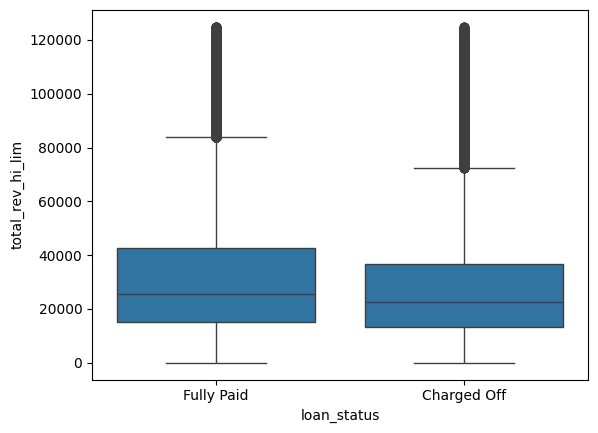

In [161]:
sns.boxplot(x='loan_status', y='total_rev_hi_lim', data=filtered_df)

In [162]:
df_modified['total_rev_hi_lim_log'] = np.log1p(df_modified['total_rev_hi_lim'])

Shape of the DataFrame where total_rev_hi_lim_log is between 8 and 12.5: (188783, 45)


<Axes: xlabel='total_rev_hi_lim_log', ylabel='Count'>

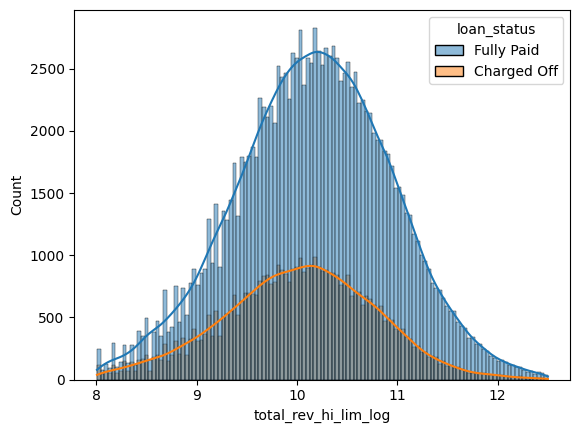

In [163]:
lower_threshold = 8
upper_threshold = 12.5

filtered_df = df_modified[(df_modified['total_rev_hi_lim_log'] > lower_threshold) & (df_modified['total_rev_hi_lim_log'] < upper_threshold)]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where total_rev_hi_lim_log is between {lower_threshold} and {upper_threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='total_rev_hi_lim_log', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='total_rev_hi_lim_log'>

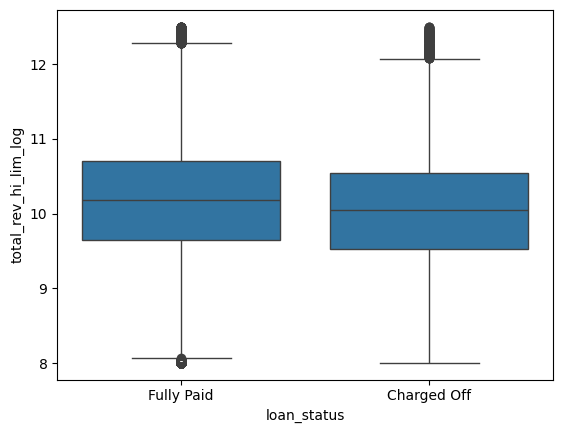

In [164]:
sns.boxplot(x='loan_status', y='total_rev_hi_lim_log', data=filtered_df)

In [165]:
df_modified = df_modified.drop(columns = ['total_rev_hi_lim'])

##### inq_fi

In [166]:
df_modified['inq_fi'].value_counts()

inq_fi
0.0     92586
1.0     46576
2.0     24563
3.0     12791
4.0      6530
5.0      3687
6.0      1921
7.0      1120
8.0       674
9.0       399
10.0      215
11.0      128
12.0       94
13.0       61
14.0       43
15.0       26
16.0       19
17.0       11
19.0        6
18.0        5
20.0        4
21.0        3
23.0        3
24.0        2
27.0        1
22.0        1
28.0        1
Name: count, dtype: int64

In [167]:
grouped = df_modified.groupby(['inq_fi', 'loan_status']).size().unstack(fill_value=0)

# Calculate percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Display the counts and percentages
print("Counts:\n", grouped)
print("\nPercentages:\n", percentages.round(2))

Counts:
 loan_status  Charged Off  Fully Paid
inq_fi                              
0.0                21712       70874
1.0                11595       34981
2.0                 6347       18216
3.0                 3545        9246
4.0                 1927        4603
5.0                 1103        2584
6.0                  629        1292
7.0                  336         784
8.0                  211         463
9.0                  141         258
10.0                  71         144
11.0                  50          78
12.0                  41          53
13.0                  24          37
14.0                  14          29
15.0                  10          16
16.0                   4          15
17.0                   2           9
18.0                   2           3
19.0                   0           6
20.0                   1           3
21.0                   0           3
22.0                   0           1
23.0                   1           2
24.0                   1     

In [168]:
df_modified = df_modified.drop(columns = ['inq_fi'])

##### total_cu_tl

In [169]:
grouped = df_modified.groupby(['total_cu_tl', 'loan_status']).size().unstack(fill_value=0)

# Calculate percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Display the counts and percentages
print("Counts:\n", grouped)
print("\nPercentages:\n", percentages.round(2))

Counts:
 loan_status  Charged Off  Fully Paid
total_cu_tl                         
0.0                24987       72233
1.0                 7893       23902
2.0                 4506       14087
3.0                 2905        9267
4.0                 2060        6453
5.0                 1387        4557
6.0                  998        3359
7.0                  770        2444
8.0                  546        1871
9.0                  429        1415
10.0                 297         975
11.0                 232         714
12.0                 190         547
13.0                 120         454
14.0                  98         312
15.0                  75         234
16.0                  69         202
17.0                  51         146
18.0                  20         109
19.0                  24          89
20.0                  23          69
21.0                  16          52
22.0                  13          51
23.0                  10          29
24.0                  12     

In [170]:
df_modified = df_modified.drop(columns = ['total_cu_tl'])

##### inq_last_12m

In [171]:
grouped = df_modified.groupby(['inq_last_12m', 'loan_status']).size().unstack(fill_value=0)

# Calculate percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Display the counts and percentages
print("Counts:\n", grouped)
print("\nPercentages:\n", percentages.round(2))

Counts:
 loan_status   Charged Off  Fully Paid
inq_last_12m                         
0.0                  9153       33669
1.0                 10267       33135
2.0                  8477       25570
3.0                  6336       17542
4.0                  4400       11783
5.0                  3005        7539
6.0                  1909        4865
7.0                  1299        3153
8.0                   881        2106
9.0                   582        1389
10.0                  406         863
11.0                  309         610
12.0                  188         415
13.0                  147         305
14.0                  100         208
15.0                   81         148
16.0                   60         112
17.0                   41          72
18.0                   24          50
19.0                   29          43
20.0                   16          30
21.0                   18          24
22.0                   13          17
23.0                    6          13
24.

#### Remove Outliers

In [172]:
df_modified.describe()

loan_amnt       int_rate   installment    annual_inc  \
count  191470.000000  191470.000000  191470.00000  1.914700e+05   
mean    14603.820311      13.787453     450.61914  7.985013e+04   
std      9114.531736       5.470431     282.45884  7.633034e+04   
min      1000.000000       5.320000      30.12000  0.000000e+00   
25%      7500.000000       9.750000     242.57000  4.900000e+04   
50%     12000.000000      12.880000     377.76000  6.800000e+04   
75%     20000.000000      16.990000     607.73250  9.500000e+04   
max     40000.000000      30.990000    1714.54000  9.550000e+06   

                 dti    delinq_2yrs  inq_last_6mths     revol_util  \
count  191470.000000  191470.000000   191470.000000  191470.000000   
mean       18.566772       0.342027        0.635567      47.739709   
std        11.188389       0.929747        0.918964      24.726554   
min        -1.000000       0.000000        0.000000       0.000000   
25%        11.900000       0.000000        0.000000      28.800000   
50%        17.900000       0.000000        0.000000      47.000000   
75%        24.600000       0.000000        1.000000      66.300000   
max       999.000000      21.000000        5.000000     172.000000   

           total_acc    open_acc_6m        il_util    open_rv_24m  \
count  191470.000000  191470.000000  191470.000000  191470.000000   
mean       25.424348       1.117340      72.599271       3.146973   
std        12.319099       1.257262      20.875938       2.767618   
min         2.000000       0.000000       0.000000       0.000000   
25%        17.000000       0.000000      63.000000       1.000000   
50%        24.000000       1.000000      72.599271       3.000000   
75%        32.000000       2.000000      86.000000       4.000000   
max       176.000000      18.000000     558.000000      45.000000   

          max_bal_bc       all_util   inq_last_12m  total_pymnt_log  \
count  191470.000000  191470.000000  191470.000000    191470.000000   
mean     5578.103745      59.074033       2.452906         9.032806   
std      5588.658851      20.724057       2.632323         1.085315   
min         0.000000       0.000000       0.000000         0.000000   
25%      2212.000000      46.000000       1.000000         8.509623   
50%      4231.000000      61.000000       2.000000         9.203982   
75%      7239.750000      74.000000       3.000000         9.763191   
max    776843.000000     198.000000      40.000000        10.873902   

       total_rec_int_log  revol_bal_log  total_rec_prncp_log  \
count      191470.000000  191470.000000        191470.000000   
mean            6.552047       9.127529             8.770985   
std             1.431272       1.298048             1.321997   
min             0.000000       0.000000             0.000000   
25%             5.932835       8.616314             8.117014   
50%             6.778990       9.267571             9.036106   
75%             7.500951       9.860319             9.680406   
max             9.623337      13.853783            10.596660   

       last_pymnt_amnt_log  tot_cur_bal_log  mths_since_rcnt_il_log  \
count        191470.000000    191470.000000           191470.000000   
mean              7.873327        11.268563                2.542192   
std               1.889542         1.287449                0.886239   
min               0.000000         0.000000                0.000000   
25%               6.305413        10.372334                1.945910   
50%               8.481376        11.393584                2.484907   
75%               9.401149        12.303305                3.044522   
max              10.648979        15.510211                6.030685   

       total_rev_hi_lim_log  
count         191470.000000  
mean              10.106824  
std                0.866390  
min                0.000000  
25%                9.595671  
50%               10.138599  
75%               10.661978  
max               14.040653

In [173]:
df_modified = df_modified[df_modified['annual_inc'] < 170000]
df_modified = df_modified[df_modified['dti'] < 47]
df_modified = df_modified[df_modified['delinq_2yrs'] < 5]
df_modified = df_modified[(df_modified['revol_bal_log'] > 5) & (df_modified['revol_bal_log'] < 13)]
df_modified = df_modified[df_modified['revol_util'] < 110]
df_modified = df_modified[df_modified['total_acc'] < 70]
df_modified = df_modified[df_modified['total_pymnt_log'] > 6]
df_modified = df_modified[df_modified['total_rec_prncp_log'] > 4]
df_modified = df_modified[df_modified['total_rec_int_log'] > 3]
df_modified = df_modified[df_modified['last_pymnt_amnt_log'] > 3]
df_modified = df_modified[df_modified['tot_cur_bal_log'] > 7.8]
df_modified = df_modified[df_modified['open_acc_6m'] < 7]
df_modified = df_modified[df_modified['mths_since_rcnt_il_log'] < 4.5]
df_modified = df_modified[(df_modified['il_util'] > 18) & (df_modified['il_util'] < 135)]
df_modified = df_modified[df_modified['open_rv_24m'] < 15]
df_modified = df_modified[df_modified['max_bal_bc'] < 20000]
df_modified = df_modified[df_modified['all_util'] < 115]
df_modified = df_modified[(df_modified['total_rev_hi_lim_log'] > 8) & (df_modified['total_rev_hi_lim_log'] < 12.5)]
df_modified = df_modified[df_modified['inq_last_12m'] < 15]

df_modified.describe()


loan_amnt       int_rate    installment     annual_inc  \
count  153897.000000  153897.000000  153897.000000  153897.000000   
mean    14347.136884      13.850565     442.688110   71788.972220   
std      8672.188340       5.461853     269.017621   31214.047966   
min      1000.000000       5.320000      30.120000       0.000000   
25%      7700.000000       9.750000     247.110000   49000.000000   
50%     12000.000000      12.990000     375.430000   66000.000000   
75%     20000.000000      16.990000     587.340000   90000.000000   
max     40000.000000      30.990000    1714.540000  169992.000000   

                 dti    delinq_2yrs  inq_last_6mths     revol_util  \
count  153897.000000  153897.000000    153897.00000  153897.000000   
mean       19.142102       0.280174         0.61586      48.029355   
std         8.429883       0.665111         0.89196      23.841549   
min        -1.000000       0.000000         0.00000       0.000000   
25%        12.850000       0.000000         0.00000      29.800000   
50%        18.650000       0.000000         0.00000      47.100000   
75%        25.140000       0.000000         1.00000      65.800000   
max        46.990000       4.000000         5.00000     109.600000   

           total_acc    open_acc_6m        il_util    open_rv_24m  \
count  153897.000000  153897.000000  153897.000000  153897.000000   
mean       25.184883       1.103712      73.833405       3.118794   
std        11.516982       1.183225      18.305133       2.512978   
min         2.000000       0.000000      19.000000       0.000000   
25%        17.000000       0.000000      64.000000       1.000000   
50%        24.000000       1.000000      74.000000       3.000000   
75%        32.000000       2.000000      87.000000       4.000000   
max        69.000000       6.000000     134.000000      14.000000   

          max_bal_bc       all_util   inq_last_12m  total_pymnt_log  \
count  153897.000000  153897.000000  153897.000000    153897.000000   
mean     5106.547529      59.827470       2.375277         9.071924   
std      3865.612383      19.330022       2.386826         0.905567   
min         0.000000       0.000000       0.000000         6.000053   
25%      2323.000000      47.000000       1.000000         8.534398   
50%      4197.000000      61.000000       2.000000         9.201786   
75%      6887.000000      74.000000       3.000000         9.741146   
max     19999.000000     114.000000      14.000000        10.873902   

       total_rec_int_log  revol_bal_log  total_rec_prncp_log  \
count      153897.000000  153897.000000        153897.000000   
mean            6.711817       9.182964             8.818822   
std             1.127801       0.925670             1.109412   
min             3.000222       5.003946             4.028739   
25%             6.048058       8.657303             8.160804   
50%             6.820213       9.254644             9.036106   
75%             7.514320       9.799459             9.641941   
max             9.623337      12.466123            10.596660   

       last_pymnt_amnt_log  tot_cur_bal_log  mths_since_rcnt_il_log  \
count        153897.000000    153897.000000           153897.000000   
mean              7.935588        11.271511                2.458363   
std               1.725890         1.157787                0.785342   
min               3.000720         7.803435                0.000000   
25%               6.323050        10.394977                1.945910   
50%               8.498540        11.344317                2.484907   
75%               9.381727        12.252923                2.944439   
max              10.648979        14.192514                4.499810   

       total_rev_hi_lim_log  
count         153897.000000  
mean              10.093582  
std                0.740874  
min                8.006701  
25%                9.609184  
50%               10.110542  
75%               10.601647  
max               12.499492

#### Select Best Numerical Features

In [174]:
numerical_df = df_modified.select_dtypes(include=[np.number])
categorical_columns = ['delinq_2yrs', 'inq_last_6mths', 'open_acc_6m', 'open_rv_24m']
numerical_df = numerical_df.drop(columns=categorical_columns)
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153897 entries, 8 to 759290
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               153897 non-null  int64  
 1   int_rate                153897 non-null  float64
 2   installment             153897 non-null  float64
 3   annual_inc              153897 non-null  float64
 4   dti                     153897 non-null  float64
 5   revol_util              153897 non-null  float64
 6   total_acc               153897 non-null  int64  
 7   il_util                 153897 non-null  float64
 8   max_bal_bc              153897 non-null  float64
 9   all_util                153897 non-null  float64
 10  inq_last_12m            153897 non-null  float64
 11  total_pymnt_log         153897 non-null  float64
 12  total_rec_int_log       153897 non-null  float64
 13  revol_bal_log           153897 non-null  float64
 14  total_rec_prncp_log     1

In [175]:
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_df)

numerical_scaled_df = pd.DataFrame(numerical_scaled, columns=numerical_df.columns)
print("Normalized Numerical Data:")
print(numerical_scaled_df)

Normalized Numerical Data:
        loan_amnt  int_rate  installment  annual_inc       dti  revol_util  \
0       -0.319659 -1.190179    -0.310122    2.601755 -0.255295   -1.062407   
1       -0.789554 -1.190179    -0.780242    1.224165 -0.714378   -0.873661   
2       -0.501275  0.397199    -0.741211   -0.634651 -1.071442   -1.175655   
3       -0.040029  0.397199     0.184568    0.102872 -0.982473    1.760405   
4        0.386624  3.101418     1.176105    2.826013 -1.429693   -0.995297   
...           ...       ...          ...         ...       ...         ...   
153892   0.767152 -0.587818     0.896791    0.839722  0.468323    0.946697   
153893  -0.270652 -0.587818    -0.192769   -0.954348  0.342580    2.125315   
153894   0.282843  0.849428    -0.043039   -0.954348  0.044829   -0.089313   
153895   2.381513  0.115242     2.831466    1.224165 -0.395274   -0.093507   
153896   0.617247 -0.748936     0.709108    0.062697 -0.725054   -0.085119   

        total_acc   il_util  max_bal

Covariance Matrix:


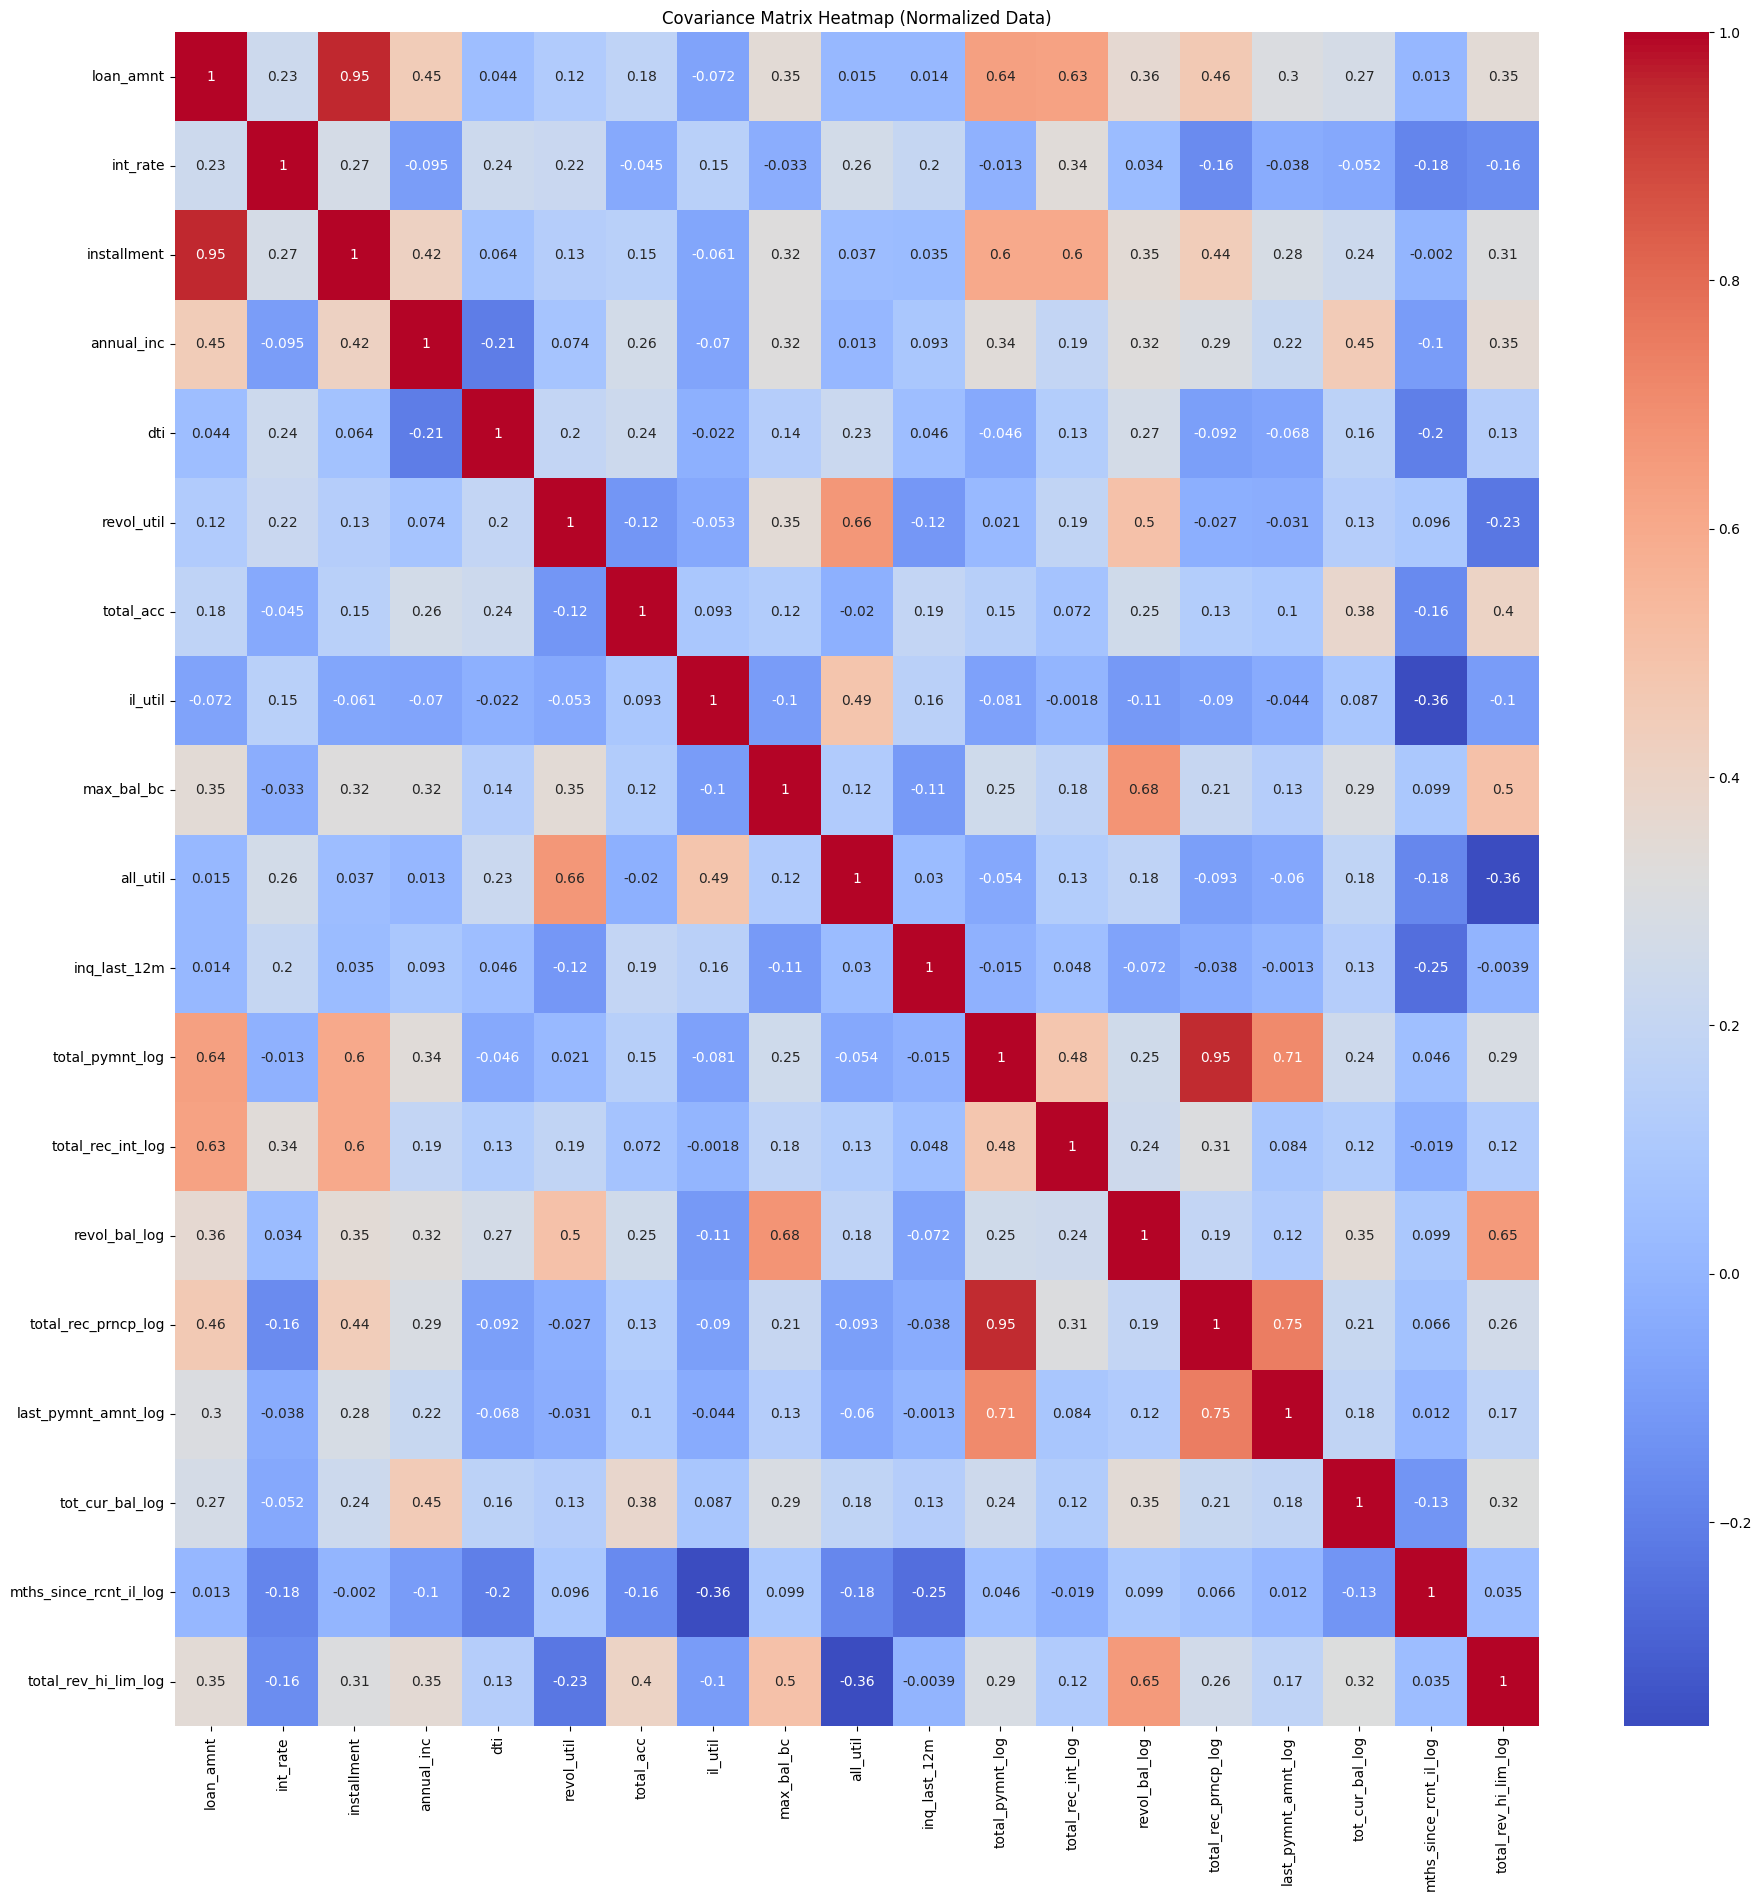

In [176]:
cov_matrix = numerical_scaled_df.cov()
print("Covariance Matrix:")

# Visualize the covariance matrix
plt.figure(figsize=(22, 22))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm')
plt.title('Covariance Matrix Heatmap (Normalized Data)')
plt.show()

In [177]:
threshold = 0.9

# Identify pairs of features with high absolute covariance
high_cov_pairs = [(i, j) for i in cov_matrix.columns for j in cov_matrix.columns 
                  if i != j and abs(cov_matrix.loc[i, j]) > threshold]

print("Highly Related Feature Pairs (Covariance > 0.9 or < -0.9):")
print(high_cov_pairs)

Highly Related Feature Pairs (Covariance > 0.9 or < -0.9):
[('loan_amnt', 'installment'), ('installment', 'loan_amnt'), ('total_pymnt_log', 'total_rec_prncp_log'), ('total_rec_prncp_log', 'total_pymnt_log')]


In [178]:
overall_covariance = cov_matrix.abs().sum() - 1  # Subtract 1 to ignore the self-covariance

print("Overall Covariance for Each Feature:")
print(overall_covariance)

Overall Covariance for Each Feature:
loan_amnt                 5.455941
int_rate                  2.723591
installment               5.270022
annual_inc                4.268868
dti                       2.508723
revol_util                3.266540
total_acc                 3.063940
il_util                   2.148940
max_bal_bc                4.286491
all_util                  3.113131
inq_last_12m              1.554410
total_pymnt_log           5.171656
total_rec_int_log         3.883097
revol_bal_log             5.031602
total_rec_prncp_log       4.767149
last_pymnt_amnt_log       3.311189
tot_cur_bal_log           3.939092
mths_since_rcnt_il_log    2.057943
total_rev_hi_lim_log      4.740321
dtype: float64


In [179]:
columns_to_remove = set()

for i, j in high_cov_pairs:
    if overall_covariance[i] >= overall_covariance[j]:
        columns_to_remove.add(i)
    else:
        columns_to_remove.add(j)

# Remove the redundant columns from the DataFrame
print("Columns to remove : ")
print(columns_to_remove)

numerical_scaled_df_reduced = numerical_scaled_df.drop(columns=columns_to_remove)
df_modified = df_modified.drop(columns=columns_to_remove)

df_modified.describe()

Columns to remove : 
{'loan_amnt', 'total_pymnt_log'}


int_rate    installment     annual_inc            dti  \
count  153897.000000  153897.000000  153897.000000  153897.000000   
mean       13.850565     442.688110   71788.972220      19.142102   
std         5.461853     269.017621   31214.047966       8.429883   
min         5.320000      30.120000       0.000000      -1.000000   
25%         9.750000     247.110000   49000.000000      12.850000   
50%        12.990000     375.430000   66000.000000      18.650000   
75%        16.990000     587.340000   90000.000000      25.140000   
max        30.990000    1714.540000  169992.000000      46.990000   

         delinq_2yrs  inq_last_6mths     revol_util      total_acc  \
count  153897.000000    153897.00000  153897.000000  153897.000000   
mean        0.280174         0.61586      48.029355      25.184883   
std         0.665111         0.89196      23.841549      11.516982   
min         0.000000         0.00000       0.000000       2.000000   
25%         0.000000         0.00000      29.800000      17.000000   
50%         0.000000         0.00000      47.100000      24.000000   
75%         0.000000         1.00000      65.800000      32.000000   
max         4.000000         5.00000     109.600000      69.000000   

         open_acc_6m        il_util    open_rv_24m     max_bal_bc  \
count  153897.000000  153897.000000  153897.000000  153897.000000   
mean        1.103712      73.833405       3.118794    5106.547529   
std         1.183225      18.305133       2.512978    3865.612383   
min         0.000000      19.000000       0.000000       0.000000   
25%         0.000000      64.000000       1.000000    2323.000000   
50%         1.000000      74.000000       3.000000    4197.000000   
75%         2.000000      87.000000       4.000000    6887.000000   
max         6.000000     134.000000      14.000000   19999.000000   

            all_util   inq_last_12m  total_rec_int_log  revol_bal_log  \
count  153897.000000  153897.000000      153897.000000  153897.000000   
mean       59.827470       2.375277           6.711817       9.182964   
std        19.330022       2.386826           1.127801       0.925670   
min         0.000000       0.000000           3.000222       5.003946   
25%        47.000000       1.000000           6.048058       8.657303   
50%        61.000000       2.000000           6.820213       9.254644   
75%        74.000000       3.000000           7.514320       9.799459   
max       114.000000      14.000000           9.623337      12.466123   

       total_rec_prncp_log  last_pymnt_amnt_log  tot_cur_bal_log  \
count        153897.000000        153897.000000    153897.000000   
mean              8.818822             7.935588        11.271511   
std               1.109412             1.725890         1.157787   
min               4.028739             3.000720         7.803435   
25%               8.160804             6.323050        10.394977   
50%               9.036106             8.498540        11.344317   
75%               9.641941             9.381727        12.252923   
max              10.596660            10.648979        14.192514   

       mths_since_rcnt_il_log  total_rev_hi_lim_log  
count           153897.000000         153897.000000  
mean                 2.458363             10.093582  
std                  0.785342              0.740874  
min                  0.000000              8.006701  
25%                  1.945910              9.609184  
50%                  2.484907             10.110542  
75%                  2.944439             10.601647  
max                  4.499810             12.499492

ANOVA Results:
                   Feature        F-Value        P-Value
12     total_rec_prncp_log  172304.926971   0.000000e+00
13     last_pymnt_amnt_log  112609.057451   0.000000e+00
0                 int_rate   14211.191518   0.000000e+00
10       total_rec_int_log    5135.484886   0.000000e+00
3                      dti    3788.933037   0.000000e+00
8                 all_util    2485.718201   0.000000e+00
4               revol_util    2306.486672   0.000000e+00
1              installment    1647.623403   0.000000e+00
16    total_rev_hi_lim_log     922.915164  4.076089e-202
14         tot_cur_bal_log     907.355685  9.389255e-199
2               annual_inc     777.822404  9.559852e-171
15  mths_since_rcnt_il_log     651.652414  1.947204e-143
9             inq_last_12m     529.535297  5.625601e-117
6                  il_util     514.313889  1.123497e-113
5                total_acc     152.335123   5.561066e-35
11           revol_bal_log      98.236209   3.773221e-23
7               

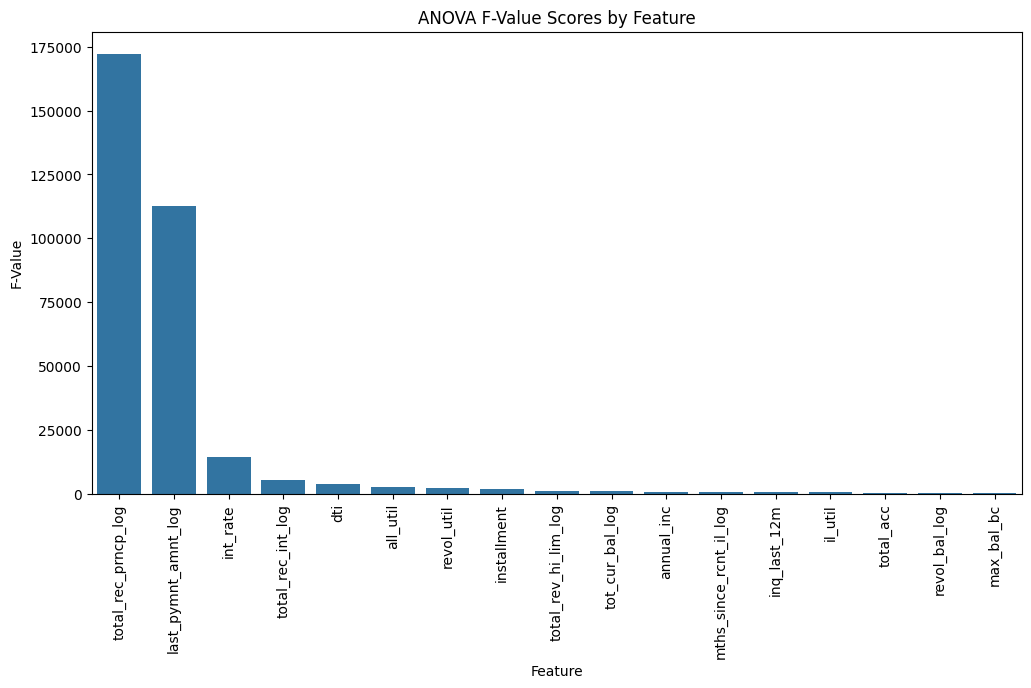


Top 5 numerical features based on F-Value:
['total_rec_prncp_log', 'last_pymnt_amnt_log', 'int_rate', 'total_rec_int_log', 'dti']


In [180]:
X = numerical_scaled_df_reduced
y = df_modified['loan_status']

selector = SelectKBest(score_func=f_classif, k='all')  # Select all features to get F-values
selector.fit(X, y)

# Get F-values and p-values
f_values = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame for the results
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Value': f_values,
    'P-Value': p_values
}).sort_values(by='F-Value', ascending=False)

print("ANOVA Results:")
print(anova_results)

# Plot the bar chart for F-values
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='F-Value', data=anova_results)
plt.title('ANOVA F-Value Scores by Feature')
plt.xticks(rotation=90)
plt.show()

# Select the best 5 numerical features based on F-Value
selected_num_variables = anova_results.head(5)['Feature'].tolist()
print("\nTop 5 numerical features based on F-Value:")
print(selected_num_variables)

#### Categorical variables

In [181]:
print(df_modified.describe(include='object'))
df_modified.head()

             term   grade sub_grade emp_title emp_length home_ownership  \
count      153897  153897    153897    144368     144458         153897   
unique          2       7        35     49156         11              5   
top     36 months       C        C1   Manager  10+ years       MORTGAGE   
freq       116355   45985     10440      2987      52575          76466   

       verification_status   issue_d loan_status pymnt_plan  \
count               153897    153897      153897     153897   
unique                   3        21           2          2   
top        Source Verified  Mar-2016  Fully Paid          n   
freq                 60870     20077      115356     153653   

                   purpose               title zip_code addr_state  \
count               153897              146527   153897     153897   
unique                  12                  12      891         50   
top     debt_consolidation  Debt consolidation    945xx         CA   
freq                 91028  

term  int_rate  installment grade sub_grade  \
8   36 months      7.35       359.26     A        A4   
24  36 months      7.35       232.79     A        A4   
42  60 months     16.02       243.29     C        C5   
91  36 months     16.02       492.34     C        C5   
92  36 months     30.79       759.08     G        G1   

                        emp_title emp_length home_ownership  annual_inc  \
8             Solutions Architect    6 years            OWN    153000.0   
24             Associate Director    7 years       MORTGAGE    110000.0   
42                         Biller    7 years           RENT     51979.0   
91                     cdl driver    7 years       MORTGAGE     75000.0   
92  Director Business Development  10+ years       MORTGAGE    160000.0   

   verification_status   issue_d loan_status pymnt_plan             purpose  \
8         Not Verified  Jun-2017  Fully Paid          n         credit_card   
24        Not Verified  Jun-2017  Fully Paid          n  debt_consolidation   
42     Source Verified  Jun-2017  Fully Paid          n  debt_consolidation   
91            Verified  Jun-2017  Fully Paid          n  debt_consolidation   
92     Source Verified  Jun-2017  Fully Paid          n    home_improvement   

                      title zip_code addr_state    dti  delinq_2yrs  \
8   Credit card refinancing    923xx         CA  16.99            0   
24       Debt consolidation    750xx         TX  13.12            0   
42       Debt consolidation    958xx         CA  10.11            0   
91       Debt consolidation    026xx         MA  10.86            1   
92         Home improvement    080xx         NJ   7.09            0   

   earliest_cr_line  inq_last_6mths  revol_util  total_acc  \
8          Jul-1994             0.0        22.7         46   
24         Mar-2013             2.0        27.2         27   
42         Aug-2006             0.0        20.0         21   
91         May-2008             0.0        90.0         10   
92         Oct-1989             3.0        24.3         36   

   initial_list_status last_pymnt_d last_credit_pull_d application_type  \
8                    w     Sep-2017           Sep-2017       Individual   
24                   w     Oct-2017           Oct-2017       Individual   
42                   w     Jul-2017           Oct-2017       Individual   
91                   w     Sep-2017           Sep-2017       Individual   
92                   f     Jul-2017           Dec-2017       Individual   

    open_acc_6m  il_util  open_rv_24m  max_bal_bc  all_util  inq_last_12m  \
8           1.0     63.0          8.0      1581.0      36.0           2.0   
24          1.0     70.0          6.0      5965.0      39.0           6.0   
42          1.0     95.0          5.0      3898.0      32.0           0.0   
91          1.0     82.0          3.0      2700.0      83.0           4.0   
92          1.0     95.0          2.0      9322.0      42.0           9.0   

    total_rec_int_log  revol_bal_log  total_rec_prncp_log  \
8            4.896496       9.053804             9.356689   
24           4.964871      10.058309             8.922792   
42           3.321432       8.654169             9.210440   
91           5.929961       7.901377             9.546884   
92           4.339771       9.376533             9.781376   

    last_pymnt_amnt_log  tot_cur_bal_log  mths_since_rcnt_il_log  \
8              9.337975        13.000720                3.332205   
24             8.879802        12.529829                2.079442   
42             9.215323         9.301734                2.302585   
91             9.540719        11.757016                2.079442   
92             9.789892        10.198952                1.945910   

    total_rev_hi_lim_log  
8              10.534786  
24             11.358620  
42             10.264687  
91              8.006701  
92             10.789340

##### Grade and SubGrade

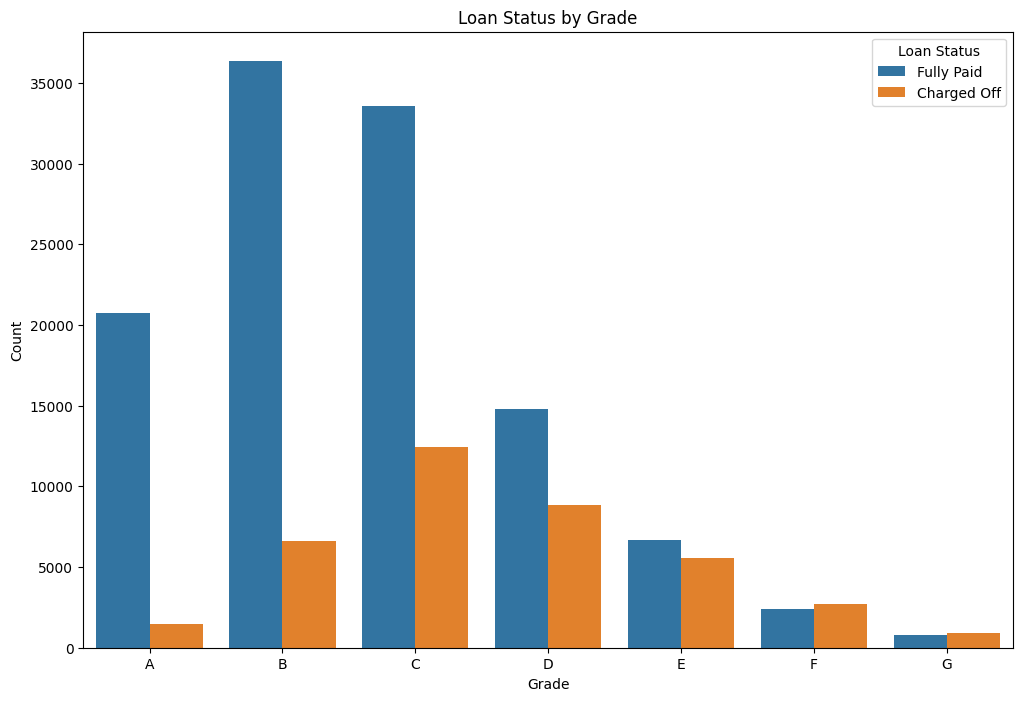

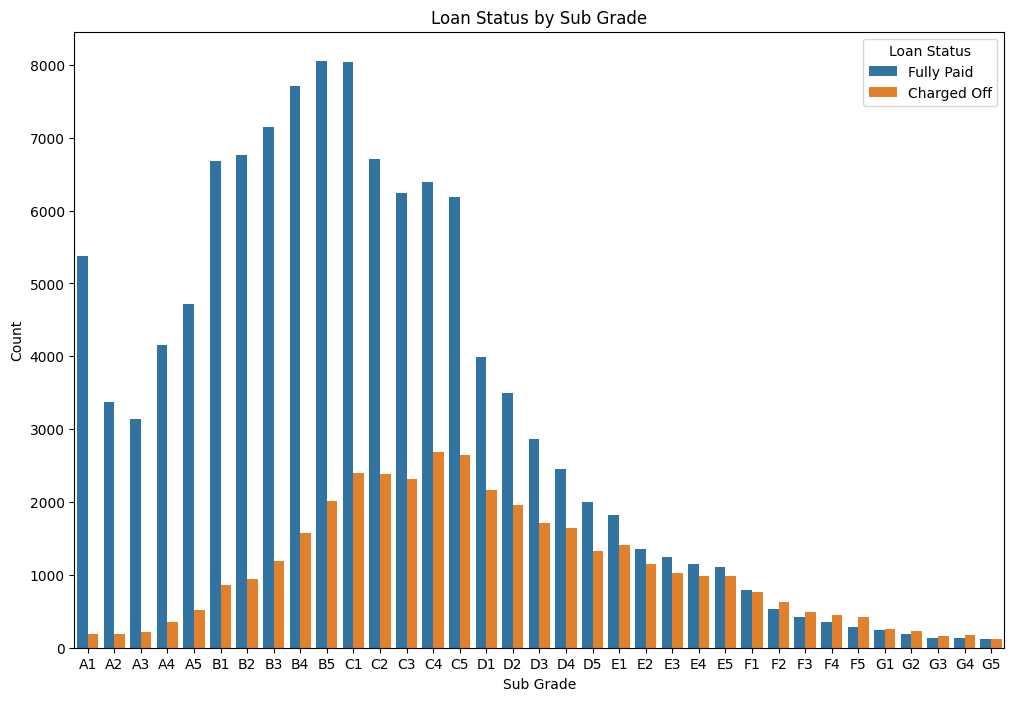

In [182]:
plt.figure(figsize=(12,8))
sns.countplot(x='grade', hue='loan_status', data=df_modified, order=sorted(df_modified['grade'].unique()))
plt.title('Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(x='sub_grade', hue='loan_status', data=df_modified, order=sorted(df_modified['sub_grade'].unique()))
plt.title('Loan Status by Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [183]:
df_modified = df_modified.drop(columns=['grade']);

##### Home Ownership

In [184]:
df_modified['home_ownership'].value_counts()

home_ownership
MORTGAGE    76466
RENT        58947
OWN         18397
ANY            86
NONE            1
Name: count, dtype: int64

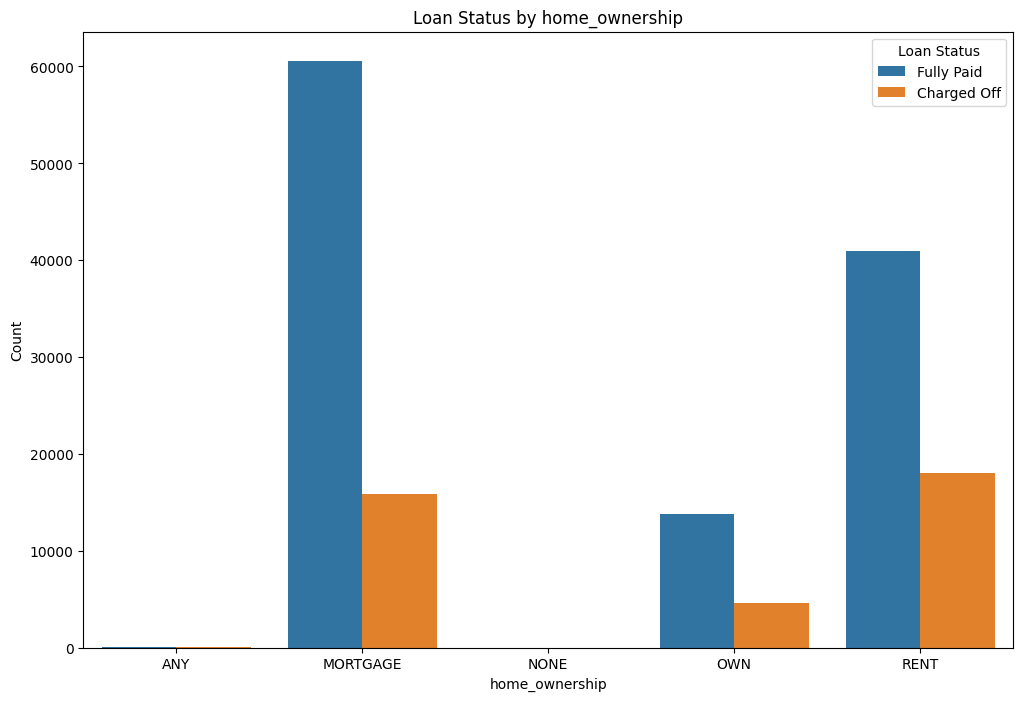

In [185]:
plt.figure(figsize=(12,8))
sns.countplot(x='home_ownership', hue='loan_status', data=df_modified, order=sorted(df_modified['home_ownership'].unique()))
plt.title('Loan Status by home_ownership')
plt.xlabel('home_ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

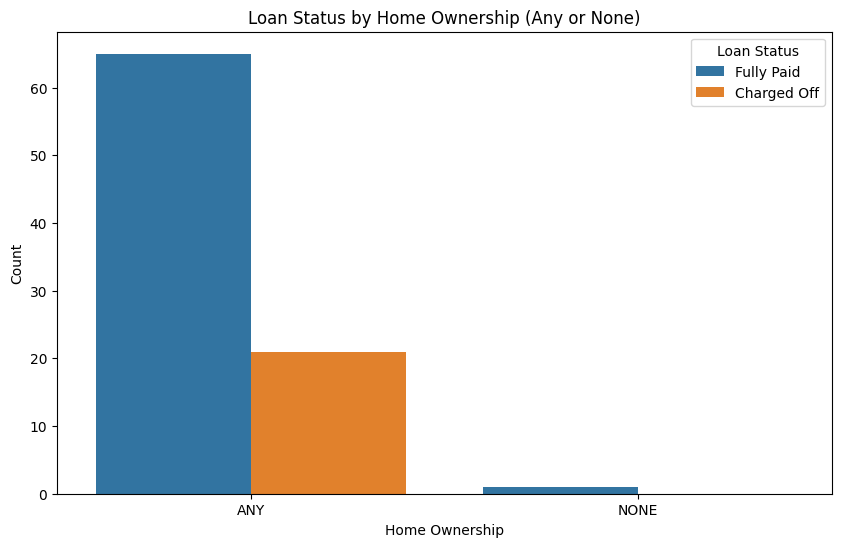

In [186]:
# Filter the DataFrame for rows where home_ownership is 'any' or 'none'
filtered_df = df_modified[df_modified['home_ownership'].isin(['ANY', 'NONE'])]

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=filtered_df)
plt.title('Loan Status by Home Ownership (Any or None)')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [187]:
df_modified.loc[df_modified['home_ownership'] == 'NONE', 'home_ownership'] = 'ANY'
df_modified['home_ownership'].value_counts()

home_ownership
MORTGAGE    76466
RENT        58947
OWN         18397
ANY            87
Name: count, dtype: int64

##### Purpose

In [188]:
df_modified['purpose'].value_counts()

purpose
debt_consolidation    91028
credit_card           30041
home_improvement      10966
other                  9685
major_purchase         3596
medical                1964
car                    1612
small_business         1551
moving                 1272
vacation               1205
house                   867
renewable_energy        110
Name: count, dtype: int64

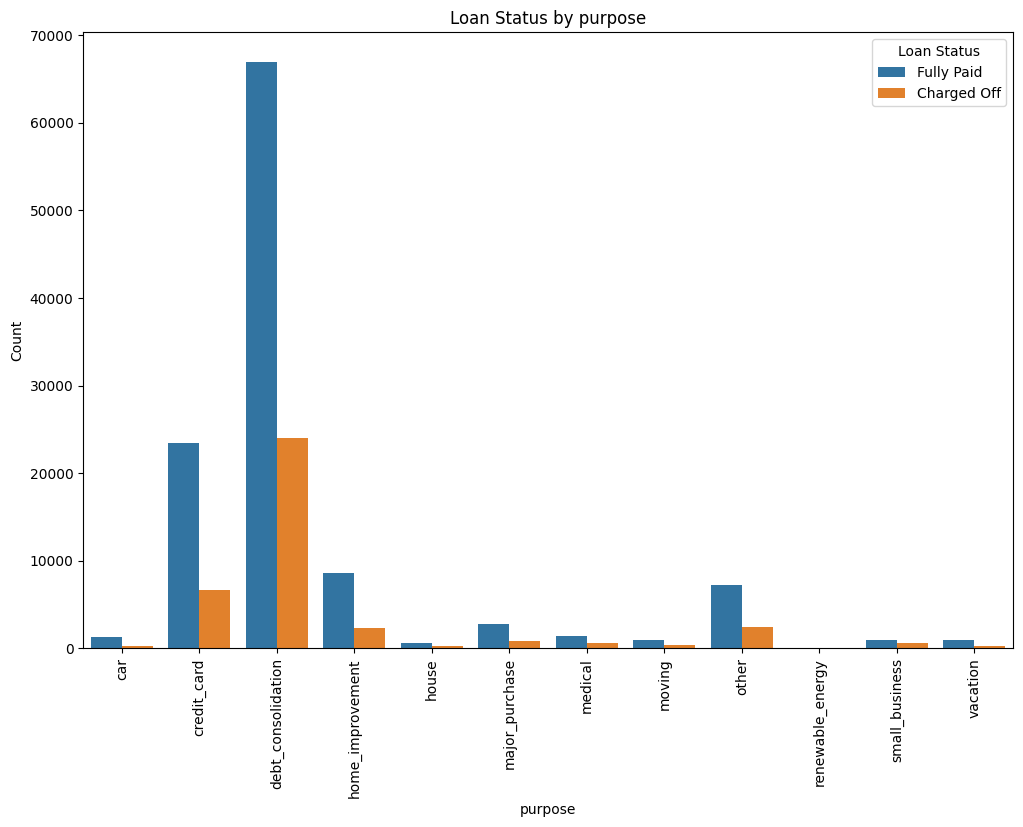

In [189]:
plt.figure(figsize=(12,8))
sns.countplot(x='purpose', hue='loan_status', data=df_modified, order=sorted(df_modified['purpose'].unique()))
plt.title('Loan Status by purpose')
plt.xlabel('purpose')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

##### Verification Status

In [190]:
df_modified['verification_status'].value_counts()

verification_status
Source Verified    60870
Not Verified       47591
Verified           45436
Name: count, dtype: int64

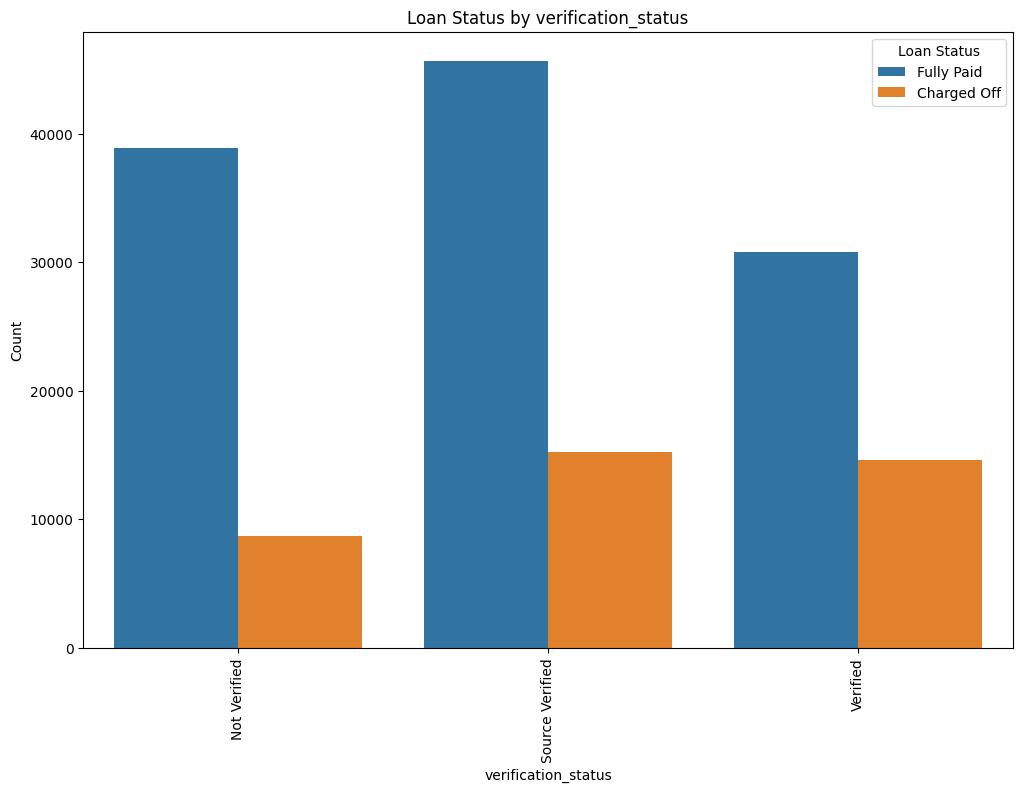

In [191]:
plt.figure(figsize=(12,8))
sns.countplot(x='verification_status', hue='loan_status', data=df_modified, order=sorted(df_modified['verification_status'].unique()))
plt.title('Loan Status by verification_status')
plt.xlabel('verification_status')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

##### Employment Length

emp_length
10+ years    52575
2 years      14137
3 years      12480
< 1 year     11794
1 year       10502
5 years       9525
4 years       9128
6 years       6595
8 years       6449
9 years       6226
7 years       5047
Name: count, dtype: int64
--------------------------------

loan_status
Fully Paid     6395
Charged Off    3044
Name: count, dtype: int64


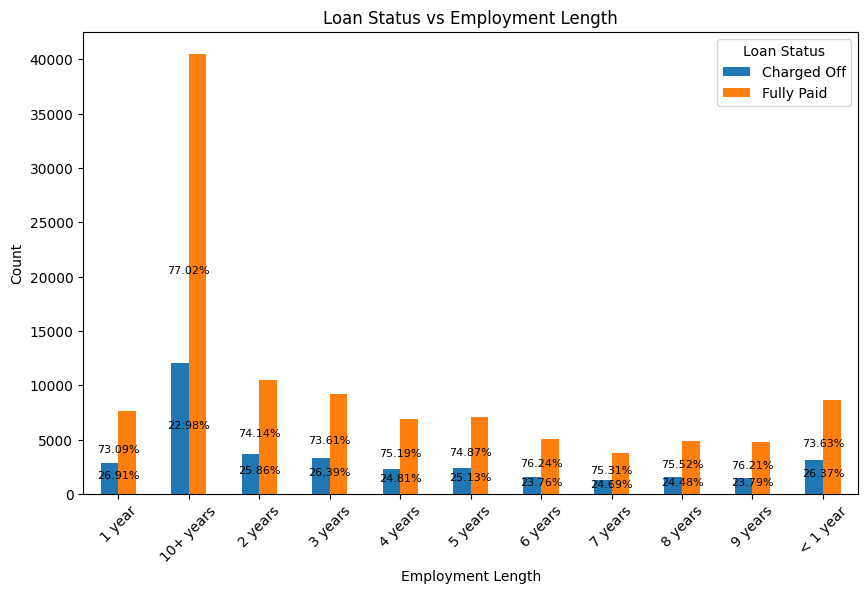

In [192]:
print(df_modified['emp_length'].value_counts())
print('--------------------------------\n')

null_emp_length_df = df_modified[df_modified['emp_length'].isnull()]
print(null_emp_length_df['loan_status'].value_counts())

grouped = df_modified.groupby(['emp_length', 'loan_status']).size().unstack();
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Loan Status vs Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')


for col in grouped.columns:
    for i, val in enumerate(grouped.index):
        total_counts = grouped.loc[val].sum()
        if total_counts != 0:
            percentage = (grouped.loc[val, col] / total_counts * 100).round(2)
            plt.text(i, grouped.loc[val, col] / 2, str(percentage) + '%', ha='center', color='black', fontsize=8)

plt.show()

In [193]:
df_modified = df_modified.drop(columns='emp_length');

##### Address State

In [194]:
df_modified['addr_state'].unique()


array(['CA', 'TX', 'MA', 'NJ', 'FL', 'MT', 'MN', 'AR', 'MI', 'VA', 'GA',
       'NY', 'DC', 'MD', 'MS', 'PA', 'CT', 'MO', 'SC', 'NV', 'OH', 'CO',
       'LA', 'HI', 'NM', 'AZ', 'TN', 'IL', 'IN', 'OR', 'OK', 'NC', 'KY',
       'ID', 'AL', 'WI', 'UT', 'NH', 'KS', 'NE', 'VT', 'WA', 'SD', 'RI',
       'ME', 'DE', 'AK', 'WY', 'ND', 'WV'], dtype=object)

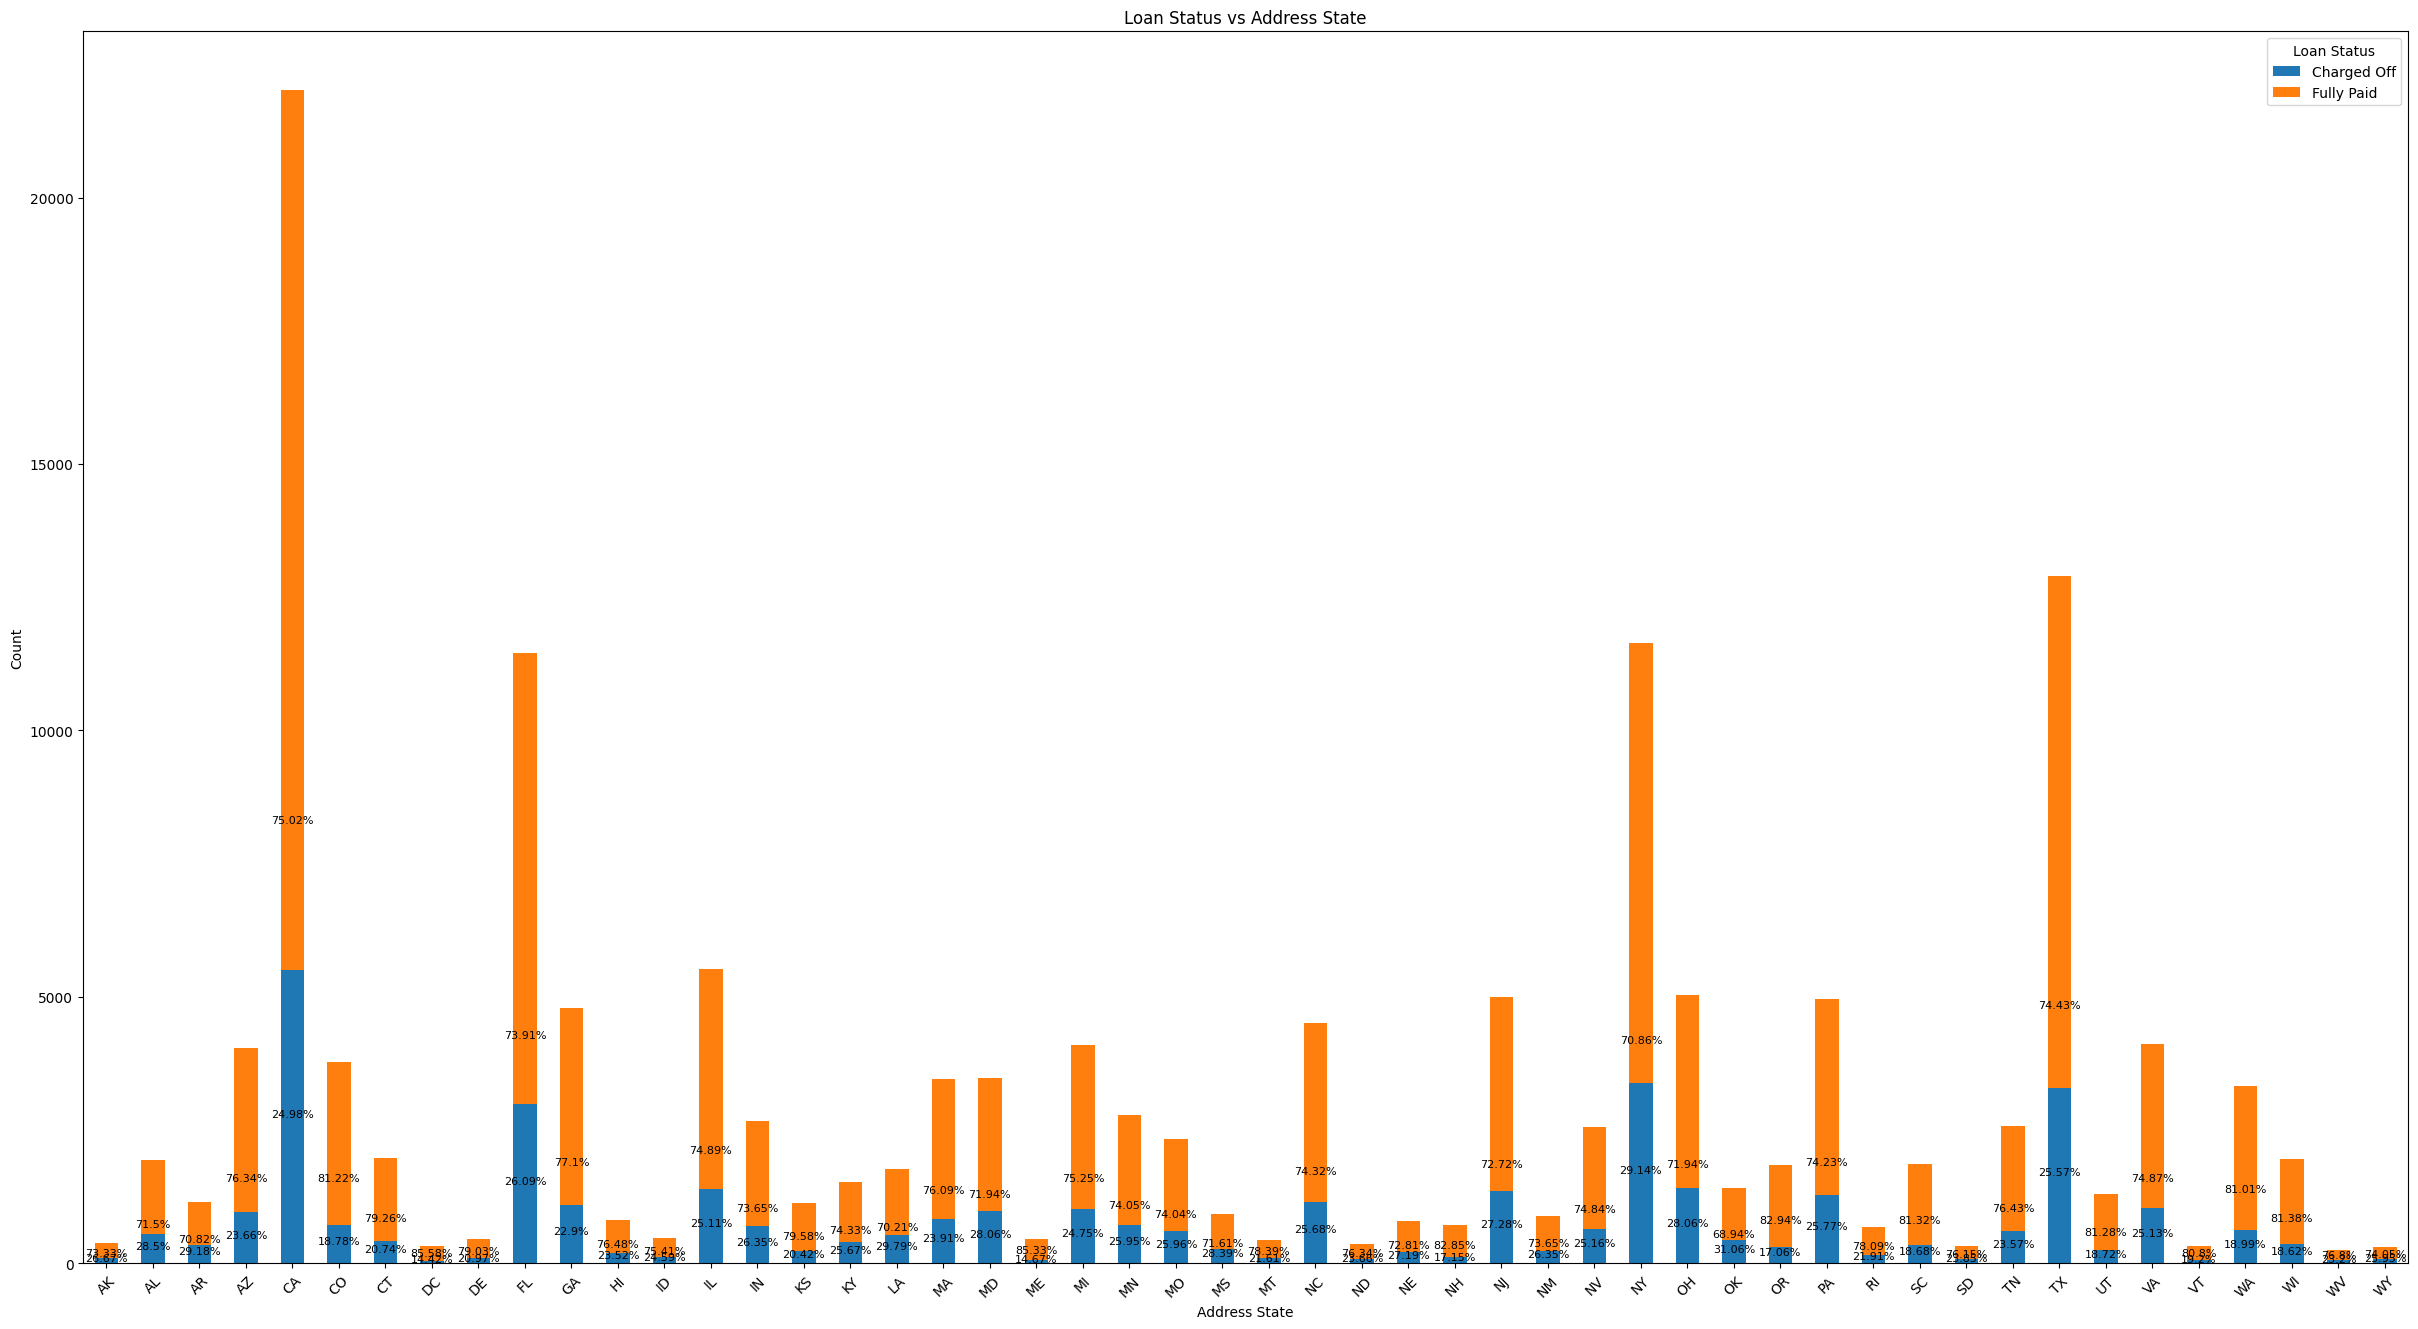

In [195]:
# Group by addr_state and loan_status
grouped_state = df_modified.groupby(['addr_state', 'loan_status']).size().unstack()

# Plot
plt.figure(figsize=(30, 16))
grouped_state.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Loan Status vs Address State')
plt.xlabel('Address State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')

# Calculate and display the percentage of loan status in every address state
for col in grouped_state.columns:
    for i, val in enumerate(grouped_state.index):
        total_counts = grouped_state.loc[val].sum()
        if total_counts != 0:
            percentage = (grouped_state.loc[val, col] / total_counts * 100).round(2)
            plt.text(i, grouped_state.loc[val, col] / 2, str(percentage) + '%', ha='center', color='black', fontsize=8)

plt.show()

##### Term

In [196]:
df_modified['term'].value_counts()

term
36 months    116355
60 months     37542
Name: count, dtype: int64

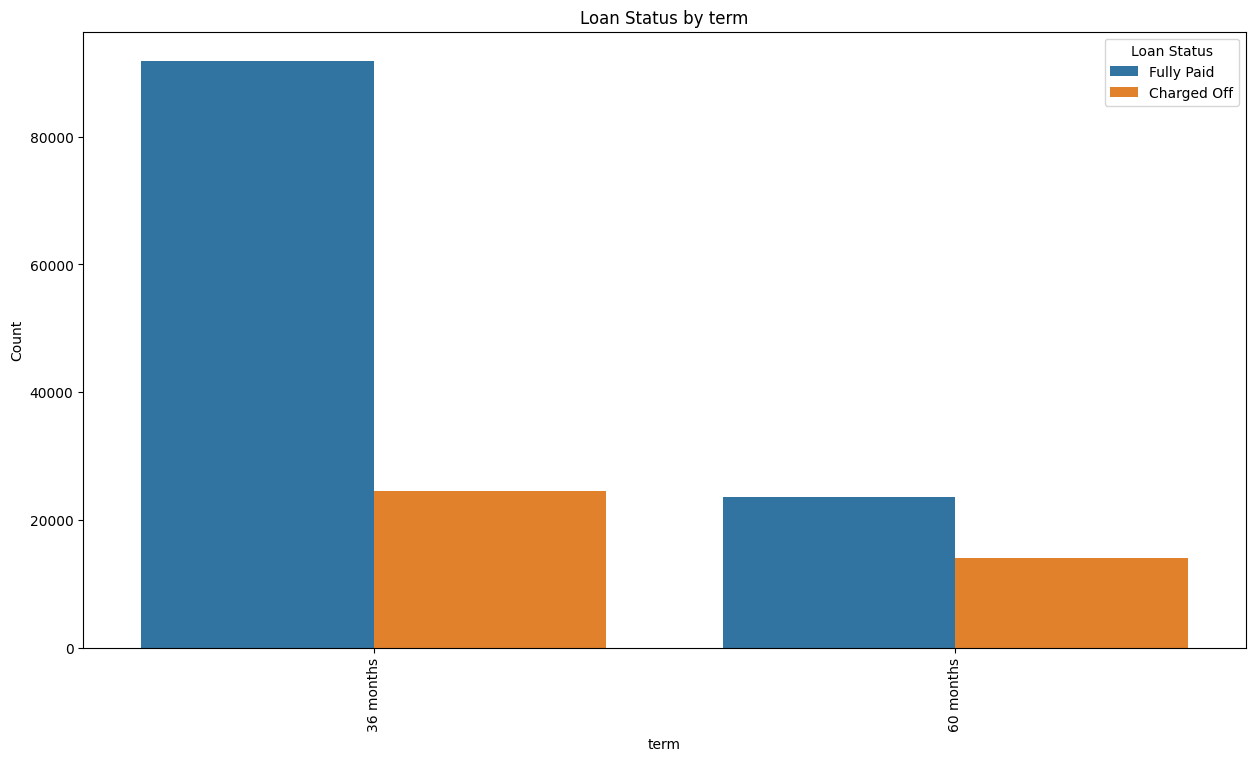

In [197]:
plt.figure(figsize=(15,8))
sns.countplot(x='term', hue='loan_status', data=df_modified, order=sorted(df_modified['term'].unique()))
plt.title('Loan Status by term')
plt.xlabel('term')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

#### Encoding Categorical variables

In [198]:
df_modified.describe(include='object')

term sub_grade emp_title home_ownership verification_status  \
count      153897    153897    144368         153897              153897   
unique          2        35     49156              4                   3   
top     36 months        C1   Manager       MORTGAGE     Source Verified   
freq       116355     10440      2987          76466               60870   

         issue_d loan_status pymnt_plan             purpose  \
count     153897      153897     153897              153897   
unique        21           2          2                  12   
top     Mar-2016  Fully Paid          n  debt_consolidation   
freq       20077      115356     153653               91028   

                     title zip_code addr_state earliest_cr_line  \
count               146527   153897     153897           153897   
unique                  12      891         50              650   
top     Debt consolidation    945xx         CA         Sep-2004   
freq                 86394     1723      22018             1252   

       initial_list_status last_pymnt_d last_credit_pull_d application_type  
count               153897       153897             153897           153897  
unique                   2           24                 25                2  
top                      w     Dec-2017           Dec-2017       Individual  
freq                115582        15370              70409           150709

##### Ranking Categorical variables

###### sub_grade

In [199]:
sub_grades = df_modified['sub_grade'].unique();
print(sub_grades)

encoder = OrdinalEncoder(categories=[sub_grades])

encoded_sub_grades = encoder.fit_transform(df_modified[['sub_grade']])

# Convert the encoded values to int32
encoded_sub_grades = encoded_sub_grades.astype('int32')
print(encoded_sub_grades)

df_modified['encoded_sub_grade'] = encoded_sub_grades
print(df_modified.shape)
df_modified.describe(include='all')

['A4' 'C5' 'G1' 'B5' 'D2' 'B4' 'B3' 'D5' 'B2' 'C2' 'D4' 'C4' 'E3' 'E1'
 'E4' 'C3' 'E5' 'D1' 'E2' 'G3' 'B1' 'A3' 'C1' 'A5' 'D3' 'F3' 'F5' 'A2'
 'A1' 'F2' 'G4' 'F4' 'G2' 'G5' 'F1']
[[ 0]
 [ 0]
 [ 1]
 ...
 [18]
 [ 1]
 [ 6]]
(153897, 39)


term       int_rate    installment sub_grade emp_title  \
count      153897  153897.000000  153897.000000    153897    144368   
unique          2            NaN            NaN        35     49156   
top     36 months            NaN            NaN        C1   Manager   
freq       116355            NaN            NaN     10440      2987   
mean          NaN      13.850565     442.688110       NaN       NaN   
std           NaN       5.461853     269.017621       NaN       NaN   
min           NaN       5.320000      30.120000       NaN       NaN   
25%           NaN       9.750000     247.110000       NaN       NaN   
50%           NaN      12.990000     375.430000       NaN       NaN   
75%           NaN      16.990000     587.340000       NaN       NaN   
max           NaN      30.990000    1714.540000       NaN       NaN   

       home_ownership     annual_inc verification_status   issue_d  \
count          153897  153897.000000              153897    153897   
unique              4            NaN                   3        21   
top          MORTGAGE            NaN     Source Verified  Mar-2016   
freq            76466            NaN               60870     20077   
mean              NaN   71788.972220                 NaN       NaN   
std               NaN   31214.047966                 NaN       NaN   
min               NaN       0.000000                 NaN       NaN   
25%               NaN   49000.000000                 NaN       NaN   
50%               NaN   66000.000000                 NaN       NaN   
75%               NaN   90000.000000                 NaN       NaN   
max               NaN  169992.000000                 NaN       NaN   

       loan_status pymnt_plan             purpose               title  \
count       153897     153897              153897              146527   
unique           2          2                  12                  12   
top     Fully Paid          n  debt_consolidation  Debt consolidation   
freq        115356     153653               91028               86394   
mean           NaN        NaN                 NaN                 NaN   
std            NaN        NaN                 NaN                 NaN   
min            NaN        NaN                 NaN                 NaN   
25%            NaN        NaN                 NaN                 NaN   
50%            NaN        NaN                 NaN                 NaN   
75%            NaN        NaN                 NaN                 NaN   
max            NaN        NaN                 NaN                 NaN   

       zip_code addr_state            dti    delinq_2yrs earliest_cr_line  \
count    153897     153897  153897.000000  153897.000000           153897   
unique      891         50            NaN            NaN              650   
top       945xx         CA            NaN            NaN         Sep-2004   
freq       1723      22018            NaN            NaN             1252   
mean        NaN        NaN      19.142102       0.280174              NaN   
std         NaN        NaN       8.429883       0.665111              NaN   
min         NaN        NaN      -1.000000       0.000000              NaN   
25%         NaN        NaN      12.850000       0.000000              NaN   
50%         NaN        NaN      18.650000       0.000000              NaN   
75%         NaN        NaN      25.140000       0.000000              NaN   
max         NaN        NaN      46.990000       4.000000              NaN   

        inq_last_6mths     revol_util      total_acc initial_list_status  \
count     153897.00000  153897.000000  153897.000000              153897   
unique             NaN            NaN            NaN                   2   
top                NaN            NaN            NaN                   w   
freq               NaN            NaN            NaN              115582   
mean           0.61586      48.029355      25.184883                 NaN   
std            0.89196      23.841549      11.516982         

##### Nominal categorical variables


###### home_ownership

In [200]:
ownership_types = df_modified['home_ownership'].unique()
print(ownership_types)
print('----------------\n')
print(df_modified['home_ownership'].value_counts())

one_hot_df = pd.get_dummies(df_modified['home_ownership'], prefix='home_ownership')

# Convert boolean True/False to 1/0
one_hot_df = one_hot_df.astype(int)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df_encoded_home_ownership = pd.concat([df_modified, one_hot_df], axis=1)

print(df_encoded_home_ownership.shape)
print(df_encoded_home_ownership.describe(include='all'))

['OWN' 'MORTGAGE' 'RENT' 'ANY']
----------------

home_ownership
MORTGAGE    76466
RENT        58947
OWN         18397
ANY            87
Name: count, dtype: int64
(153897, 43)
             term       int_rate    installment sub_grade emp_title  \
count      153897  153897.000000  153897.000000    153897    144368   
unique          2            NaN            NaN        35     49156   
top     36 months            NaN            NaN        C1   Manager   
freq       116355            NaN            NaN     10440      2987   
mean          NaN      13.850565     442.688110       NaN       NaN   
std           NaN       5.461853     269.017621       NaN       NaN   
min           NaN       5.320000      30.120000       NaN       NaN   
25%           NaN       9.750000     247.110000       NaN       NaN   
50%           NaN      12.990000     375.430000       NaN       NaN   
75%           NaN      16.990000     587.340000       NaN       NaN   
max           NaN      30.990000    1714.54

###### Purpose

In [201]:
purposes = df_modified['purpose'].unique()
print(purposes)
print('----------------\n')
print(df_modified['purpose'].value_counts())

one_hot_df = pd.get_dummies(df_encoded_home_ownership['purpose'], prefix='purpose')

# Convert boolean True/False to 1/0
one_hot_df = one_hot_df.astype(int)

df_encoded_purpose = pd.concat([df_encoded_home_ownership, one_hot_df], axis=1)

print(df_encoded_purpose.shape)
print(df_encoded_purpose.describe(include='all'))

['credit_card' 'debt_consolidation' 'home_improvement' 'medical'
 'major_purchase' 'moving' 'car' 'other' 'vacation' 'house'
 'renewable_energy' 'small_business']
----------------

purpose
debt_consolidation    91028
credit_card           30041
home_improvement      10966
other                  9685
major_purchase         3596
medical                1964
car                    1612
small_business         1551
moving                 1272
vacation               1205
house                   867
renewable_energy        110
Name: count, dtype: int64
(153897, 55)
             term       int_rate    installment sub_grade emp_title  \
count      153897  153897.000000  153897.000000    153897    144368   
unique          2            NaN            NaN        35     49156   
top     36 months            NaN            NaN        C1   Manager   
freq       116355            NaN            NaN     10440      2987   
mean          NaN      13.850565     442.688110       NaN       NaN   
std       

###### verification_status

In [202]:
verification_statuses = df_modified['verification_status'].unique()
print(verification_statuses)
print('----------------\n')
print(df_modified['verification_status'].value_counts())

one_hot_df = pd.get_dummies(df_encoded_purpose['verification_status'], prefix='verification_status')

# Convert boolean True/False to 1/0
one_hot_df = one_hot_df.astype(int)

df_encoded_verification_status = pd.concat([df_encoded_purpose, one_hot_df], axis=1)

print(df_encoded_verification_status.shape)
print(df_encoded_verification_status.describe(include='all'))

['Not Verified' 'Source Verified' 'Verified']
----------------

verification_status
Source Verified    60870
Not Verified       47591
Verified           45436
Name: count, dtype: int64
(153897, 58)
             term       int_rate    installment sub_grade emp_title  \
count      153897  153897.000000  153897.000000    153897    144368   
unique          2            NaN            NaN        35     49156   
top     36 months            NaN            NaN        C1   Manager   
freq       116355            NaN            NaN     10440      2987   
mean          NaN      13.850565     442.688110       NaN       NaN   
std           NaN       5.461853     269.017621       NaN       NaN   
min           NaN       5.320000      30.120000       NaN       NaN   
25%           NaN       9.750000     247.110000       NaN       NaN   
50%           NaN      12.990000     375.430000       NaN       NaN   
75%           NaN      16.990000     587.340000       NaN       NaN   
max           NaN    

###### addr_state

In [203]:
df_modified.addr_state.value_counts().sort_values(ascending=False)

addr_state
CA    22018
TX    12899
NY    11644
FL    11452
IL     5524
OH     5029
NJ     4992
PA     4959
GA     4790
NC     4517
VA     4115
MI     4093
AZ     4044
CO     3786
MD     3478
MA     3463
WA     3323
MN     2790
IN     2676
TN     2571
NV     2560
MO     2338
CT     1982
WI     1966
AL     1933
SC     1863
OR     1846
LA     1776
KY     1531
OK     1410
UT     1293
AR     1155
KS     1141
MS      930
NM      892
HI      812
NE      798
NH      717
RI      680
ID      484
DE      453
ME      450
MT      435
AK      375
ND      372
SD      327
DC      326
VT      323
WY      316
WV      250
Name: count, dtype: int64

In [204]:
states_to_encode = [state for state in df_modified.addr_state.value_counts().sort_values(ascending=False).head(17).index]
print(states_to_encode)

for state in states_to_encode:
    df_modified[state] = np.where(df_modified['addr_state'] == state,  1, 0)

df_encoded_addr_state = pd.concat([df_encoded_verification_status, df_modified[states_to_encode]], axis=1)

print(df_encoded_addr_state.describe())
print(df_encoded_addr_state.shape)

states_to_encode = [state for state in df_modified.addr_state.value_counts().sort_values(ascending=False).head(17).index]
print("States to encode:", states_to_encode)

# Step 2: Create one-hot encoded columns for the top 17 states
one_hot_df = pd.get_dummies(df_modified['addr_state'][df_modified['addr_state'].isin(states_to_encode)], prefix='addr_state')


# Step 3: Ensure the one-hot encoded columns are of type Int32
one_hot_df = one_hot_df.astype('Int32')
one_hot_df = one_hot_df.fillna(0)

# Step 3: Concatenate the original DataFrame with the one-hot encoded DataFrame
df_encoded_addr_state = pd.concat([df_encoded_verification_status, one_hot_df], axis=1)

# Step 4: Display the shape and description of the encoded DataFrame
print("Shape of df_encoded_addr_state:", df_encoded_addr_state.shape)
print("\nDescription of df_encoded_addr_state:")
print(df_encoded_addr_state.describe(include='all'))

# Optional: Display summary statistics for the encoded columns
print("\nSummary statistics for encoded columns:")
print(df_encoded_addr_state[one_hot_df.columns].describe())

# Example usage of the encoded DataFrame
print("\nExample rows from encoded DataFrame:")
print(df_encoded_addr_state.head())



['CA', 'TX', 'NY', 'FL', 'IL', 'OH', 'NJ', 'PA', 'GA', 'NC', 'VA', 'MI', 'AZ', 'CO', 'MD', 'MA', 'WA']
            int_rate    installment     annual_inc            dti  \
count  153897.000000  153897.000000  153897.000000  153897.000000   
mean       13.850565     442.688110   71788.972220      19.142102   
std         5.461853     269.017621   31214.047966       8.429883   
min         5.320000      30.120000       0.000000      -1.000000   
25%         9.750000     247.110000   49000.000000      12.850000   
50%        12.990000     375.430000   66000.000000      18.650000   
75%        16.990000     587.340000   90000.000000      25.140000   
max        30.990000    1714.540000  169992.000000      46.990000   

         delinq_2yrs  inq_last_6mths     revol_util      total_acc  \
count  153897.000000    153897.00000  153897.000000  153897.000000   
mean        0.280174         0.61586      48.029355      25.184883   
std         0.665111         0.89196      23.841549      11.51698

###### term

In [205]:
term_types = df_modified['term'].unique()
print(term_types)
print('----------------\n')
print(df_modified['term'].value_counts())
 
label_encoder = LabelEncoder()
 
df_encoded_term = df_encoded_addr_state
df_encoded_term['term'] = label_encoder.fit_transform(df_encoded_addr_state['term'])
 
print(df_encoded_term.shape)
df_encoded_term.describe(include='all')

['36 months' '60 months']
----------------

term
36 months    116355
60 months     37542
Name: count, dtype: int64
(153897, 75)


term       int_rate    installment sub_grade emp_title  \
count   153897.000000  153897.000000  153897.000000    153897    144368   
unique            NaN            NaN            NaN        35     49156   
top               NaN            NaN            NaN        C1   Manager   
freq              NaN            NaN            NaN     10440      2987   
mean         0.243942      13.850565     442.688110       NaN       NaN   
std          0.429460       5.461853     269.017621       NaN       NaN   
min          0.000000       5.320000      30.120000       NaN       NaN   
25%          0.000000       9.750000     247.110000       NaN       NaN   
50%          0.000000      12.990000     375.430000       NaN       NaN   
75%          0.000000      16.990000     587.340000       NaN       NaN   
max          1.000000      30.990000    1714.540000       NaN       NaN   

       home_ownership     annual_inc verification_status   issue_d  \
count          153897  153897.000000              153897    153897   
unique              4            NaN                   3        21   
top          MORTGAGE            NaN     Source Verified  Mar-2016   
freq            76466            NaN               60870     20077   
mean              NaN   71788.972220                 NaN       NaN   
std               NaN   31214.047966                 NaN       NaN   
min               NaN       0.000000                 NaN       NaN   
25%               NaN   49000.000000                 NaN       NaN   
50%               NaN   66000.000000                 NaN       NaN   
75%               NaN   90000.000000                 NaN       NaN   
max               NaN  169992.000000                 NaN       NaN   

       loan_status pymnt_plan             purpose               title  \
count       153897     153897              153897              146527   
unique           2          2                  12                  12   
top     Fully Paid          n  debt_consolidation  Debt consolidation   
freq        115356     153653               91028               86394   
mean           NaN        NaN                 NaN                 NaN   
std            NaN        NaN                 NaN                 NaN   
min            NaN        NaN                 NaN                 NaN   
25%            NaN        NaN                 NaN                 NaN   
50%            NaN        NaN                 NaN                 NaN   
75%            NaN        NaN                 NaN                 NaN   
max            NaN        NaN                 NaN                 NaN   

       zip_code addr_state            dti    delinq_2yrs earliest_cr_line  \
count    153897     153897  153897.000000  153897.000000           153897   
unique      891         50            NaN            NaN              650   
top       945xx         CA            NaN            NaN         Sep-2004   
freq       1723      22018            NaN            NaN             1252   
mean        NaN        NaN      19.142102       0.280174              NaN   
std         NaN        NaN       8.429883       0.665111              NaN   
min         NaN        NaN      -1.000000       0.000000              NaN   
25%         NaN        NaN      12.850000       0.000000              NaN   
50%         NaN        NaN      18.650000       0.000000              NaN   
75%         NaN        NaN      25.140000       0.000000              NaN   
max         NaN        NaN      46.990000       4.000000              NaN   

        inq_last_6mths     revol_util      total_acc initial_list_status  \
count     153897.00000  153897.000000  153897.000000              153897   
unique             NaN            NaN            NaN                   2   
top                NaN            NaN            NaN                   w   
freq               NaN            NaN            NaN              115582   
mean           0.61586      48.029355      25.184883                 NaN   
std            0.

###### emp_title

In [206]:
emp_titles = df_modified['emp_title'].unique()
print(emp_titles)
df_modified['emp_title'].value_counts()

['Solutions Architect' 'Associate Director' 'Biller' ...
 'Senior Development Operations Engineer' 'Hospice Clinical Supervisor'
 'Manager-Owner']


emp_title
Manager                         2987
Teacher                         2971
Supervisor                      1544
Owner                           1468
Driver                          1391
                                ... 
Single Event Project Manager       1
Out side sales                     1
Health Care Sergeant               1
Vibration Analyst                  1
Manager-Owner                      1
Name: count, Length: 49156, dtype: int64

In [207]:
df_modified = df_modified.drop(columns=['emp_title'])

###### title

In [208]:
#Removed. Since, same as the purpose
df_modified = df_modified.drop(columns=['title'])

##### Remove additional Columns

In [209]:
# Remove encoded columns
df_all_encoded = df_encoded_term.drop(columns=['home_ownership', 'purpose', 'verification_status',
                                                'addr_state', 'sub_grade'])

print(df_all_encoded.describe(include='all'))

                 term       int_rate    installment emp_title     annual_inc  \
count   153897.000000  153897.000000  153897.000000    144368  153897.000000   
unique            NaN            NaN            NaN     49156            NaN   
top               NaN            NaN            NaN   Manager            NaN   
freq              NaN            NaN            NaN      2987            NaN   
mean         0.243942      13.850565     442.688110       NaN   71788.972220   
std          0.429460       5.461853     269.017621       NaN   31214.047966   
min          0.000000       5.320000      30.120000       NaN       0.000000   
25%          0.000000       9.750000     247.110000       NaN   49000.000000   
50%          0.000000      12.990000     375.430000       NaN   66000.000000   
75%          0.000000      16.990000     587.340000       NaN   90000.000000   
max          1.000000      30.990000    1714.540000       NaN  169992.000000   

         issue_d loan_status pymnt_plan

In [210]:
# Remove dummy variable trap
df_all_encoded = df_all_encoded.drop(columns=['verification_status_Verified', 'purpose_renewable_energy', 'home_ownership_ANY'])

In [211]:
print(df_all_encoded.describe())
print(df_all_encoded.shape)

df_all_encoded.head(20)

                term       int_rate    installment     annual_inc  \
count  153897.000000  153897.000000  153897.000000  153897.000000   
mean        0.243942      13.850565     442.688110   71788.972220   
std         0.429460       5.461853     269.017621   31214.047966   
min         0.000000       5.320000      30.120000       0.000000   
25%         0.000000       9.750000     247.110000   49000.000000   
50%         0.000000      12.990000     375.430000   66000.000000   
75%         0.000000      16.990000     587.340000   90000.000000   
max         1.000000      30.990000    1714.540000  169992.000000   

                 dti    delinq_2yrs  inq_last_6mths     revol_util  \
count  153897.000000  153897.000000    153897.00000  153897.000000   
mean       19.142102       0.280174         0.61586      48.029355   
std         8.429883       0.665111         0.89196      23.841549   
min        -1.000000       0.000000         0.00000       0.000000   
25%        12.850000       0

term  int_rate  installment                      emp_title  annual_inc  \
8       0      7.35       359.26            Solutions Architect    153000.0   
24      0      7.35       232.79             Associate Director    110000.0   
42      1     16.02       243.29                         Biller     51979.0   
91      0     16.02       492.34                     cdl driver     75000.0   
92      0     30.79       759.08  Director Business Development    160000.0   
176     0     11.99       498.15              Senior Accountant     63000.0   
181     0     18.06       723.66         Transportation manager     85000.0   
207     0     10.91       163.49                          BUYER     38000.0   
231     0     11.99       212.55               Training Officer     97500.0   
249     0     10.42       324.65                     Care giver     45000.0   
266     0     11.99       318.82        Distribution Specialist     60000.0   
272     0     16.02       527.51       customer service manager     62000.0   
286     0     16.02       281.34               Managing Partner     60000.0   
295     1     21.45       355.00            Executive Secretary     35000.0   
302     0      9.93       122.50                 police officer     85000.0   
316     0     11.99       149.45                         Driver     58000.0   
343     0     13.59       101.94               Maintenance lead     85000.0   
347     0     20.00       743.28                Site Supervisor     52000.0   
356     0     15.05       208.14            District AP Manager     79992.0   
382     0     21.45       189.54                        Teacher     72500.0   

      issue_d  loan_status pymnt_plan                    title zip_code  \
8    Jun-2017   Fully Paid          n  Credit card refinancing    923xx   
24   Jun-2017   Fully Paid          n       Debt consolidation    750xx   
42   Jun-2017   Fully Paid          n       Debt consolidation    958xx   
91   Jun-2017   Fully Paid          n       Debt consolidation    026xx   
92   Jun-2017   Fully Paid          n         Home improvement    080xx   
176  Jun-2017   Fully Paid          n  Credit card refinancing    917xx   
181  Jun-2017  Charged Off          n       Debt consolidation    945xx   
207  Jun-2017   Fully Paid          n       Debt consolidation    346xx   
231  Jun-2017   Fully Paid          n         Medical expenses    945xx   
249  Jun-2017   Fully Paid          n  Credit card refinancing    935xx   
266  Jun-2017   Fully Paid          n       Debt consolidation    952xx   
272  Jun-2017   Fully Paid          n       Debt consolidation    330xx   
286  Jun-2017   Fully Paid          n       Debt consolidation    597xx   
295  Jun-2017   Fully Paid          n  Credit card refinancing    958xx   
302  Jun-2017   Fully Paid          n           Major purchase    751xx   
316  Jun-2017   Fully Paid          n       Debt consolidation    565xx   
343  Jun-2017   Fully Paid          n         Home improvement    760xx   
347  Jun-2017  Charged Off          n       Debt consolidation    559xx   
356  Jun-2017   Fully Paid          n       Debt consolidation    917xx   
382  Jun-2017  Charged Off          n    Moving and relocation    722xx   

       dti  delinq_2yrs earliest_cr_line  inq_last_6mths  revol_util  \
8    16.99            0         Jul-1994             0.0        22.7   
24   13.12            0         Mar-2013             2.0        27.2   
42   10.11            0         Aug-2006             0.0        20.0   
91   10.86            1         May-2008             0.0        90.0   
92    7.09            0         Oct-1989             3.0        24.3   
176  16.59            0         Apr-2008             0.0        56.5   
181  14.63            1         Jan-1992             1.0       100.0   
207  18.60            1         Sep-1996             2.0        23.6   
231  11.88            0         Nov-2005             0.0        66.6   
249  23.12            0         Oct-2003         

In [212]:
print(df_all_encoded['loan_status'].value_counts())

loan_status
Fully Paid     115356
Charged Off     38541
Name: count, dtype: int64


#### Select the best categorical features

In [213]:
df_all_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153897 entries, 8 to 759290
Data columns (total 67 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   term                                 153897 non-null  int32  
 1   int_rate                             153897 non-null  float64
 2   installment                          153897 non-null  float64
 3   emp_title                            144368 non-null  object 
 4   annual_inc                           153897 non-null  float64
 5   issue_d                              153897 non-null  object 
 6   loan_status                          153897 non-null  object 
 7   pymnt_plan                           153897 non-null  object 
 8   title                                146527 non-null  object 
 9   zip_code                             153897 non-null  object 
 10  dti                                  153897 non-null  float64
 11  delinq_2yrs       

In [214]:
df_all_encoded = df_all_encoded.fillna(0)

In [215]:
# Separate the features and the target
X = df_all_encoded.drop('loan_status', axis=1)
y = df_all_encoded['loan_status']

# Select categorical columns
cat_cols = X.select_dtypes(include=['Int32']).columns

# Ensure the target is in numerical format
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Apply chi2 test
chi_scores, p_values = chi2(X[cat_cols], y_encoded)

# Create a DataFrame with the results
chi2_results = pd.DataFrame({'Feature': cat_cols, 'Chi2 Score': chi_scores, 'p-value': p_values})
chi2_results = chi2_results.sort_values(by='Chi2 Score', ascending=False)

# Display the results
print(chi2_results)

# Select the best 4 categorical features based on Chi2 Score
selected_cat_variables = chi2_results.head(4)['Feature'].tolist()
print("\nTop 4 categorical features based on Chi2 Score:")
print(selected_cat_variables)

                                Feature   Chi2 Score        p-value
0                                  term  3022.483633   0.000000e+00
16     verification_status_Not Verified  1159.444903  3.973558e-254
4                   home_ownership_RENT   960.253990  7.830532e-211
2               home_ownership_MORTGAGE   740.244007  5.305473e-163
14               purpose_small_business   146.571814   9.734996e-34
6                   purpose_credit_card   144.046253   3.471190e-33
1                     encoded_sub_grade   133.344092   7.602449e-31
29                        addr_state_NY   104.073455   1.949527e-24
7            purpose_debt_consolidation    89.045775   3.857819e-21
8              purpose_home_improvement    87.851749   7.054881e-21
20                        addr_state_CO    79.128673   5.819358e-19
34                        addr_state_WA    64.891102   7.915369e-16
5                           purpose_car    52.215202   4.973959e-13
30                        addr_state_OH    24.33

#### Spliting Training and Testing data sets

In [216]:
selected_features = selected_cat_variables + selected_num_variables

# Ensure there are no duplicates in the DataFrame
df_all_encoded_no_duplicates = df_all_encoded.drop_duplicates()

# Select only the required columns (selected features and target)
df_selected = df_all_encoded_no_duplicates[selected_features + ['loan_status']]

train_data, test_data = train_test_split(df_selected, test_size=0.25, random_state=42)

print(train_data.shape)
print(test_data.shape)

df_selected.info()

(115422, 10)
(38475, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 153897 entries, 8 to 759290
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   term                              153897 non-null  int32  
 1   verification_status_Not Verified  153897 non-null  int32  
 2   home_ownership_RENT               153897 non-null  int32  
 3   home_ownership_MORTGAGE           153897 non-null  int32  
 4   total_rec_prncp_log               153897 non-null  float64
 5   last_pymnt_amnt_log               153897 non-null  float64
 6   int_rate                          153897 non-null  float64
 7   total_rec_int_log                 153897 non-null  float64
 8   dti                               153897 non-null  float64
 9   loan_status                       153897 non-null  object 
dtypes: float64(5), int32(4), object(1)
memory usage: 14.6+ MB


#### Feature Scaling

In [217]:
# Function to remove outliers using IQR, separately for each group
def remove_outliers_by_group(df, columns, group_col):
    df_no_outliers = pd.DataFrame()
    for group in df[group_col].unique():
        df_group = df[df[group_col] == group]
        for column in columns:
            Q1 = df_group[column].quantile(0.25)
            Q3 = df_group[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_group = df_group[(df_group[column] >= lower_bound) & (df_group[column] <= upper_bound)]
        df_no_outliers = pd.concat([df_no_outliers, df_group], axis=0)
    return df_no_outliers

# Remove outliers from the continuous features in the training data by group
train_data_no_outliers = remove_outliers_by_group(train_data, continuous_features, 'loan_status')

# Scale only the identified continuous features
scaler = RobustScaler()
train_data_scaled = train_data_no_outliers.copy()
test_data_scaled = test_data.copy()

train_data_scaled[continuous_features] = scaler.fit_transform(train_data_no_outliers[continuous_features])
test_data_scaled[continuous_features] = scaler.transform(test_data[continuous_features])

# Create a DataFrame for scaled training data
train_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data_scaled.columns)

# Plot box plots for continuous features grouped by loan_status
for column in continuous_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='loan_status', y=column, data=train_scaled_df)
    plt.title(f'Box plot of {column} grouped by loan_status')
    plt.xlabel('Loan Status')
    plt.ylabel(column)
    plt.show()

NameError: name 'continuous_features' is not defined

#### Build a Model and Test

In [ ]:
train_X_scaled = train_data_scaled.drop('loan_status', axis=1)
train_y = train_data_scaled['loan_status']
print(train_y.value_counts())

test_X_scaled = test_data_scaled.drop('loan_status', axis=1)
test_y = test_data_scaled['loan_status']

# Ensure the target is in numerical format
le = LabelEncoder()
train_y_encoded = le.fit_transform(train_y)
test_y_encoded = le.fit_transform(test_y)

# Convert NumPy arrays to Pandas Series
train_y_encoded = pd.Series(train_y_encoded)
test_y_encoded = pd.Series(test_y_encoded)

# Print value counts
print("Train Y Encoded Value Counts:")
print(train_y_encoded.value_counts())

print("\nTest Y Encoded Value Counts:")
print(test_y_encoded.value_counts())

In [ ]:
class_weight = {1: 1, 0: 4}

# Fit the logistic regression model
logistic_model = LogisticRegression(class_weight=class_weight)
logistic_model.fit(train_X_scaled, train_y_encoded)

# Predicting on the test set
predictions = logistic_model.predict(test_X_scaled)

# Calculating accuracy
accuracy = accuracy_score(test_y_encoded, predictions)
print("Accuracy:", accuracy)
print(confusion_matrix(test_y_encoded, predictions))
print(classification_report(test_y_encoded, predictions))

In [ ]:
class_weight = {1: 1, 0: 4}

# Initialize and fit the RandomForestClassifier
classifier = RandomForestClassifier(class_weight=class_weight, random_state=42)
classifier.fit(train_X_scaled, train_y_encoded)

# Predicting on the test set
predictions = classifier.predict(test_X_scaled)

# Calculating accuracy
accuracy = accuracy_score(test_y_encoded, predictions)
print("Accuracy:", accuracy)
print(confusion_matrix(test_y_encoded, predictions))
print(classification_report(test_y_encoded, predictions))

In [ ]:
# Applying Neural Network
neural_network_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Fit the model to the scaled training data
neural_network_model.fit(train_X_scaled, train_y)

# Predicting on the test set
predictions = neural_network_model.predict(test_X_scaled)

# Calculating accuracy
accuracy = accuracy_score(test_y, predictions)     
print("Accuracy:", accuracy)
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, predictions))